Avocado is a fruit consumed by people heavily in the United States.

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import LabelEncoder, power_transform, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
import pickle

In [2]:
#reading the train datset
df = pd.read_csv("avocado.csv" )
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
df.shape

(18249, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Date and region columns are string type, the rest are either float or int type.

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Happy that there are no null values

<Axes: >

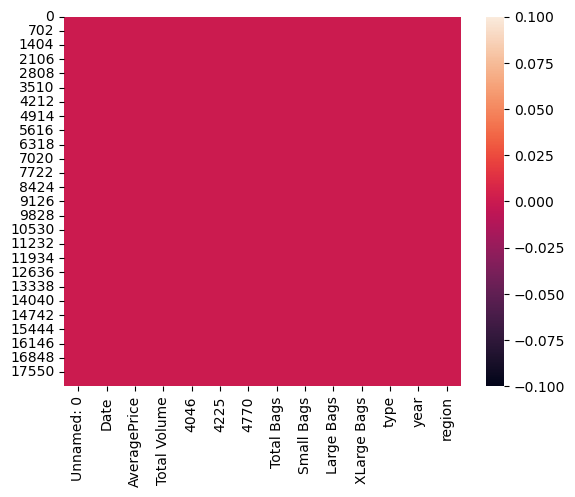

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [10]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

the columns of Unnamed: 0, and the bags related columns are irrelevant to our problem. So we will drop them 

In [11]:
#its the way to assign Data column to datetime data type
df['Date'] = pd.to_datetime(df['Date'], errors = 'raise')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [13]:
# extracting date month and year from Date column
df['Years'] = df['Date'].dt.year
df['Months'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [14]:
df

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  Years  Months  Day  
0      2015            Albany   2015      12   27  
1      2015            Albany   2015      12   20  
2      2015            Albany   2015      12   13  
3      2015            Albany   2015      12    6  
4      2015            Albany   2015      11   29  
...     ...               ...    ...     ...  ...  
18244  2018  WestTexNewMexico   2018       2    4  
18245  2018  WestTexNewMexico   2018       1   28  
18246  2018  WestTexNewMexico   2018       1   21  
18247  2018  WestTexNewMexico   2018       1   14  
18248  2018  WestTexNewMexico   2018       1    7  

[18249 rows x 17 columns]

here we can see 2 columns named Years. If they both have the same value we can drop one column.

In [15]:
df['year'].describe()

count    18249.000000
mean      2016.147899
std          0.939938
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2018.000000
Name: year, dtype: float64

In [16]:
df['Years'].describe()

count    18249.000000
mean      2016.147899
std          0.939938
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2018.000000
Name: Years, dtype: float64

as we see the values matches so i would like to drop 'year' column. And we have extracted Data from Date Column we can drop Date column aswell

In [17]:
df = df.drop(columns = ['Date', 'year'])
df

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0         8696.87     8603.62       93.25          0.0  conventional   
1         9505.56     9408.07       97.49          0.0  conventional   
2         8145.35     8042.21      103.14          0.0  conventional   
3         5811.16     5677.40      133.76          0.0  conventional   
4         6183.95     5986.26      197.69          0.0  conventional   
...           ...         ...         ...          ...           ...   
18244    13498.67    13066.82      431.85          0.0       organic   
18245     9264.84     8940.04      324.80          0.0       organic   
18246     9394.11     9351.80       42.31          0.0       organic   
18247    10969.54    10919.54       50.00          0.0       organic   
18248    12014.15    11988.14       26.01          0.0       organic   

                 region  Years  Months  Day  
0                Albany   2015      12   27  
1                Albany   2015      12   20  
2                Albany   2015      12   13  
3                Albany   2015      12    6  
4                Albany   2015      11   29  
...                 ...    ...     ...  ...  
18244  WestTexNewMexico   2018       2    4  
18245  WestTexNewMexico   2018       1   28  
18246  WestTexNewMexico   2018       1   21  
18247  WestTexNewMexico   2018       1   14  
18248  WestTexNewMexico   2018       1    7  

[18249 rows x 15 columns]

In [18]:
df['XLarge Bags'].describe()

count     18249.000000
mean       3106.426507
std       17692.894652
min           0.000000
25%           0.000000
50%           0.000000
75%         132.500000
max      551693.650000
Name: XLarge Bags, dtype: float64

In [19]:
df['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

Here we can see the majority of the value in XLarge Bags have 0 values so we can drop them. column Unnamed: 0 doesnt play any important role in this dataset so lets drop it

In [20]:
df.drop(['Unnamed: 0','XLarge Bags'], axis=1, inplace=True)
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags          type            region  Years  Months  \
0         8603.62       93.25  conventional            Albany   2015      12   
1         9408.07       97.49  conventional            Albany   2015      12   
2         8042.21      103.14  conventional            Albany   2015      12   
3         5677.40      133.76  conventional            Albany   2015      12   
4         5986.26      197.69  conventional            Albany   2015      11   
...           ...         ...           ...               ...    ...     ...   
18244    13066.82      431.85       organic  WestTexNewMexico   2018       2   
18245     8940.04      324.80       organic  WestTexNewMexico   2018       1   
18246     9351.80       42.31       organic  WestTexNewMexico   2018       1   
18247    10919.54       50.00       organic  WestTexNewMexico   2018       1   
18248    11988.14       26.01       organic  WestTexNewMexico   2018       1   

       Day  
0       27  
1       20  
2       13  
3        6  
4       29  
...    ...  
18244    4  
18245   28  
18246   21  
18247   14  
18248    7  

[18249 rows x 13 columns]

In [21]:
df.shape

(18249, 13)

In [22]:
df['type'].describe()

count            18249
unique               2
top       conventional
freq              9126
Name: type, dtype: object

so we can encode it means we can convert it to numeric

In [23]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

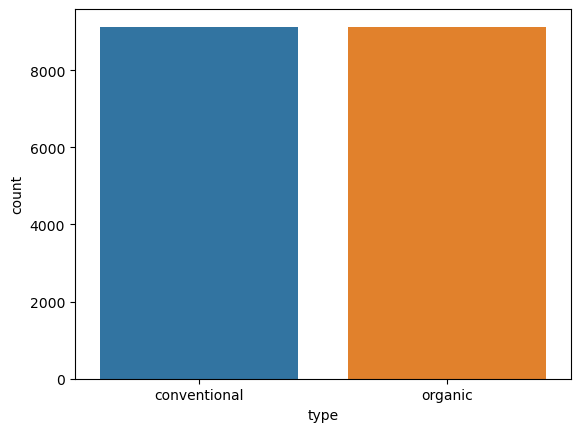

In [24]:
sns.countplot(data=df, x="type")

the values are almost similar

lets convert it to numeric

In [25]:
lEnc = LabelEncoder()
df['type'] = lEnc.fit_transform(df['type'])
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  type            region  Years  Months  Day  
0         8603.62       93.25     0            Albany   2015      12   27  
1         9408.07       97.49     0            Albany   2015      12   20  
2         8042.21      103.14     0            Albany   2015      12   13  
3         5677.40      133.76     0            Albany   2015      12    6  
4         5986.26      197.69     0            Albany   2015      11   29  
...           ...         ...   ...               ...    ...     ...  ...  
18244    13066.82      431.85     1  WestTexNewMexico   2018       2    4  
18245     8940.04      324.80     1  WestTexNewMexico   2018       1   28  
18246     9351.80       42.31     1  WestTexNewMexico   2018       1   21  
18247    10919.54       50.00     1  WestTexNewMexico   2018       1   14  
18248    11988.14       26.01     1  WestTexNewMexico   2018       1    7  

[18249 rows x 13 columns]

now lets convert region column to numeric

In [26]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [27]:
lEnc = LabelEncoder()
df['region'] = lEnc.fit_transform(df['region'])
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  type  region  Years  Months  Day  
0         8603.62       93.25     0       0   2015      12   27  
1         9408.07       97.49     0       0   2015      12   20  
2         8042.21      103.14     0       0   2015      12   13  
3         5677.40      133.76     0       0   2015      12    6  
4         5986.26      197.69     0       0   2015      11   29  
...           ...         ...   ...     ...    ...     ...  ...  
18244    13066.82      431.85     1      53   2018       2    4  
18245     8940.04      324.80     1      53   2018       1   28  
18246     9351.80       42.31     1      53   2018       1   21  
18247    10919.54       50.00     1      53   2018       1   14  
18248    11988.14       26.01     1      53   2018       1    7  

[18249 rows x 13 columns]

In [28]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags          type        region  \
count  1.824900e+04  1.824900e+04  1.824900e+04  18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04      0.499918     26.495644   
std    9.862424e+05  7.461785e+05  2.439660e+05      0.500014     15.583788   
min    0.000000e+00  0.000000e+00  0.000000e+00      0.000000      0.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02      0.000000     13.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03      0.000000     26.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04      1.000000     40.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06      1.000000     53.000000   

              Years        Months           Day  
count  18249.000000  18249.000000  18249.000000  
mean    2016.147899      6.177215     15.662612  
std        0.939938      3.534130      8.776281  
min     2015.000000      1.000000      1.000000  
25%     2015.000000      3.000000      8.000000  
50%     2016.000000      6.000000     16.000000  
75%     2017.000000      9.000000     23.000000  
max     2018.000000     12.000000     31.000000

Data Visualization

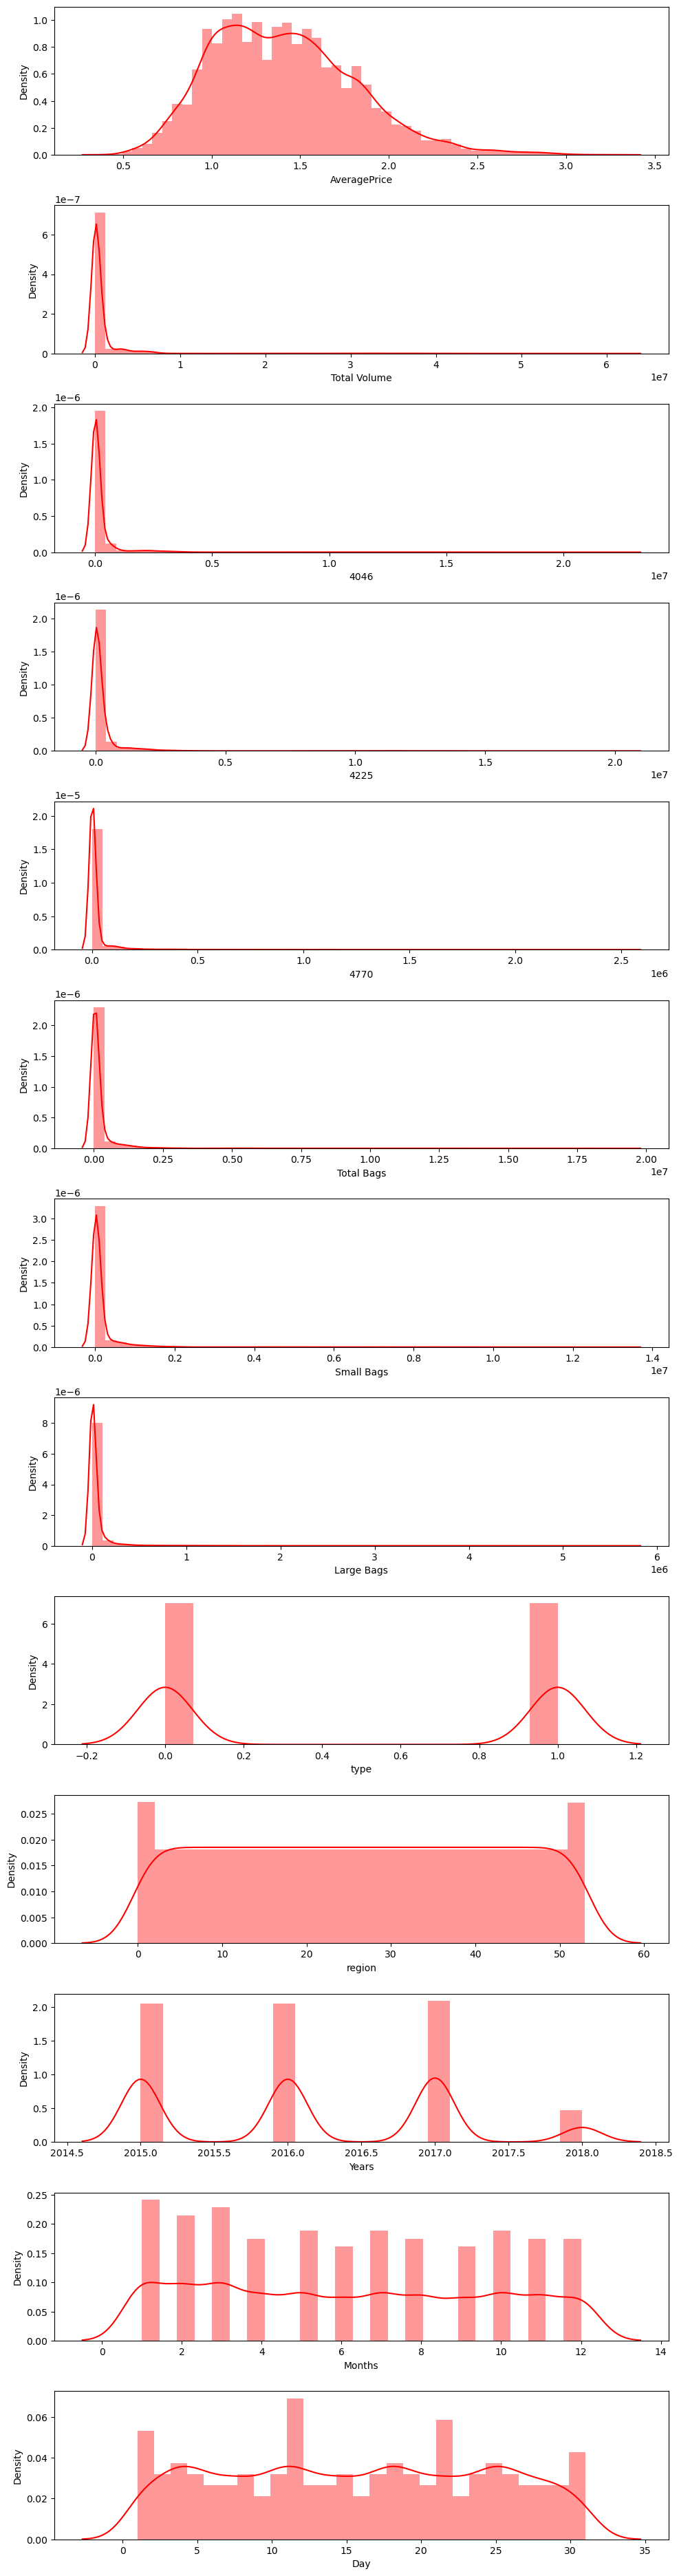

In [29]:
# for loop for distribution plot of all columns
plt.figure(figsize = (10,40))
plotnumber = 1
for columns in df:
    if plotnumber<=14:
        ax = plt.subplot(14,1,plotnumber)
        sns.set_style = 'whitegrid'
        sns.distplot(df[columns], color = 'red')
        plt.xlabel(columns, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

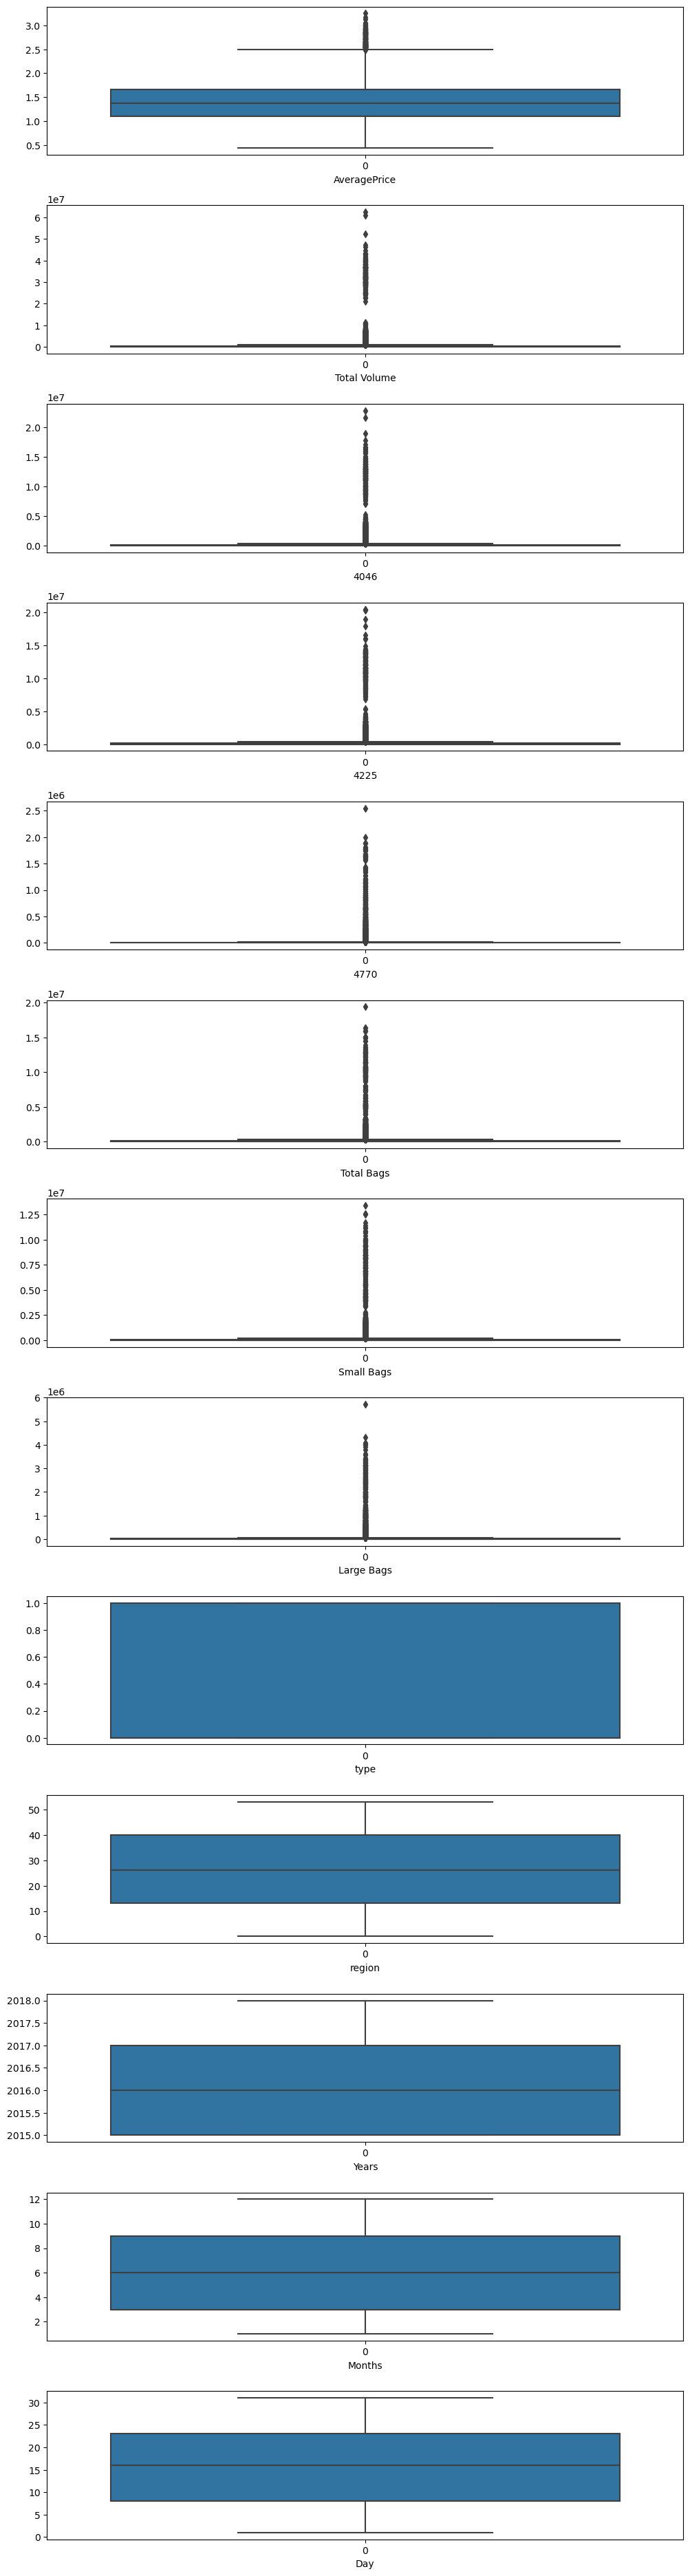

In [30]:
# for loop for boxplot of all columns
plt.figure(figsize = (10,40))
plotnumber = 1
for columns in df:
    if plotnumber<=14:
        ax = plt.subplot(14,1,plotnumber)
        sns.set_style = 'whitegrid'
        sns.boxplot(df[columns])
        plt.xlabel(columns, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

We can see that we have lots of outliers

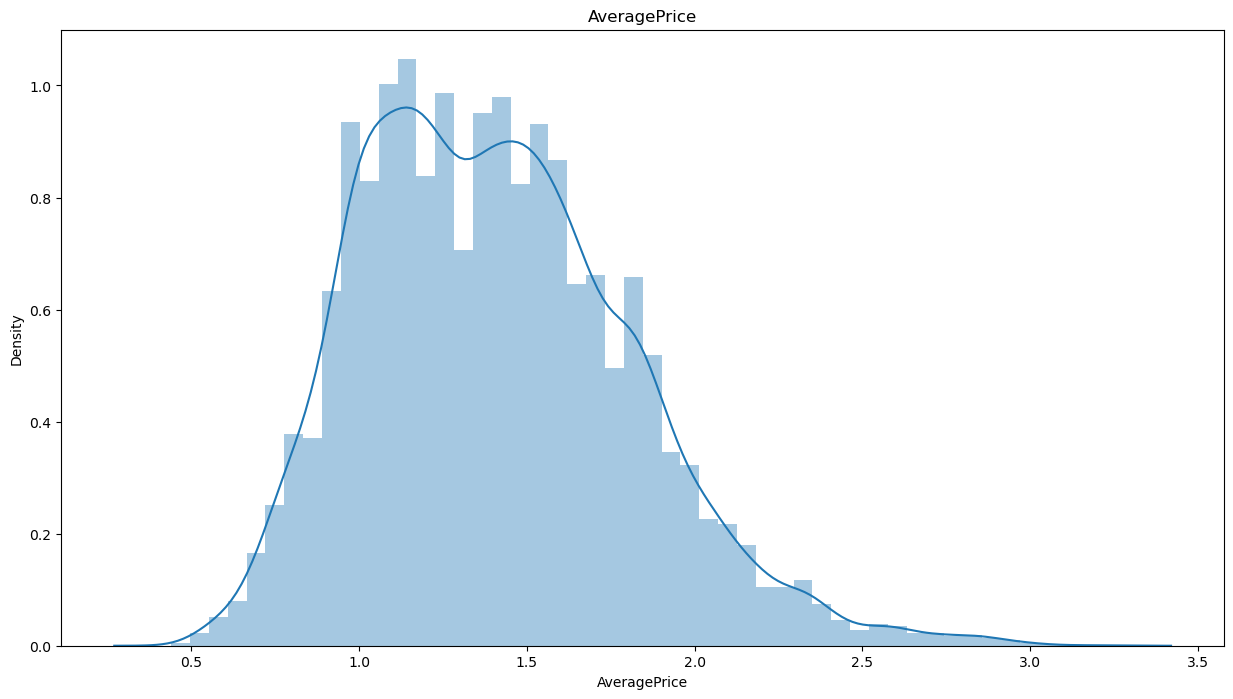

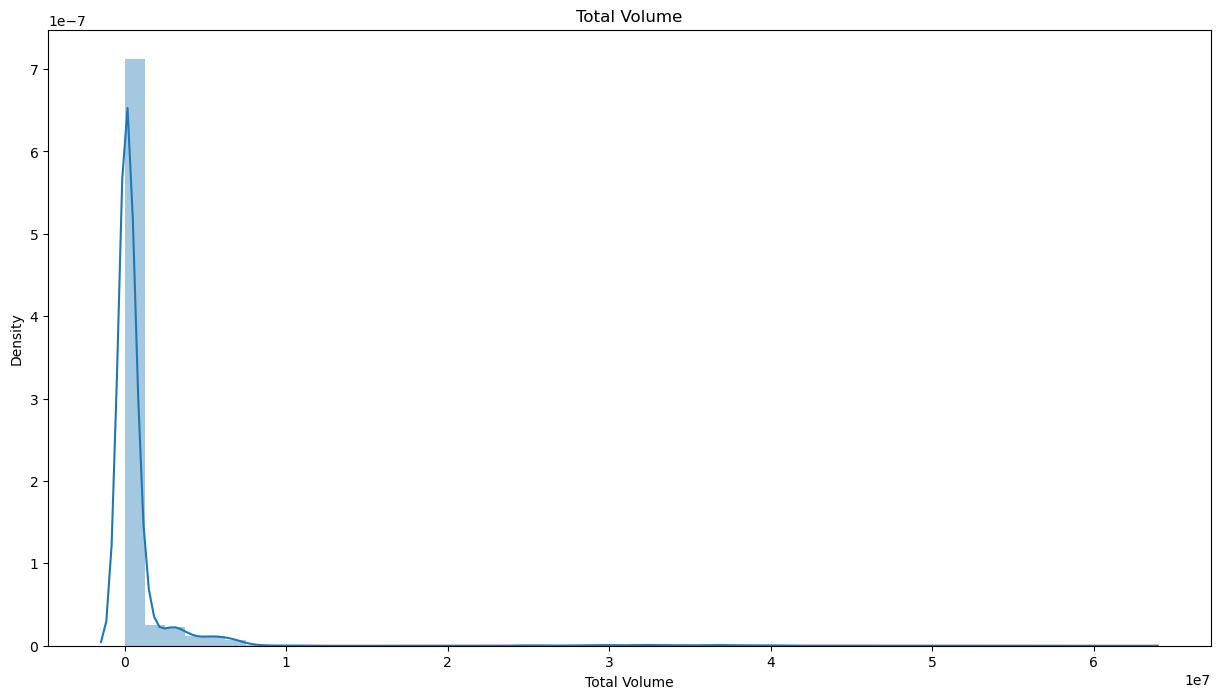

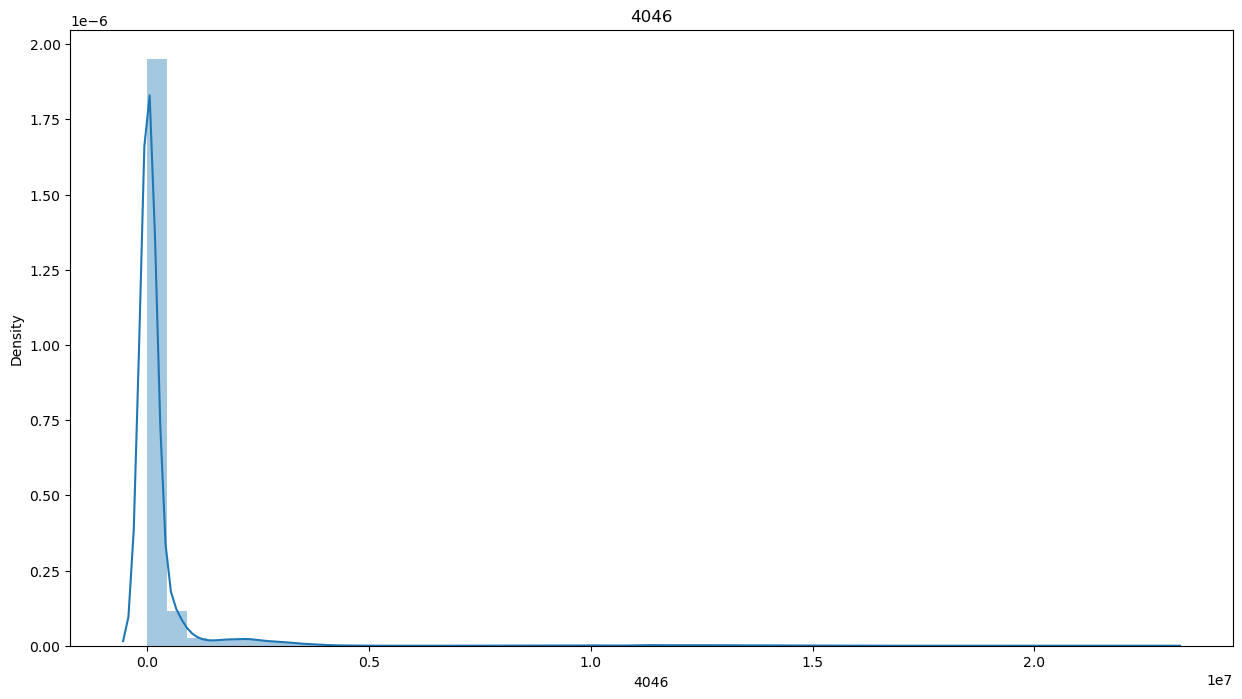

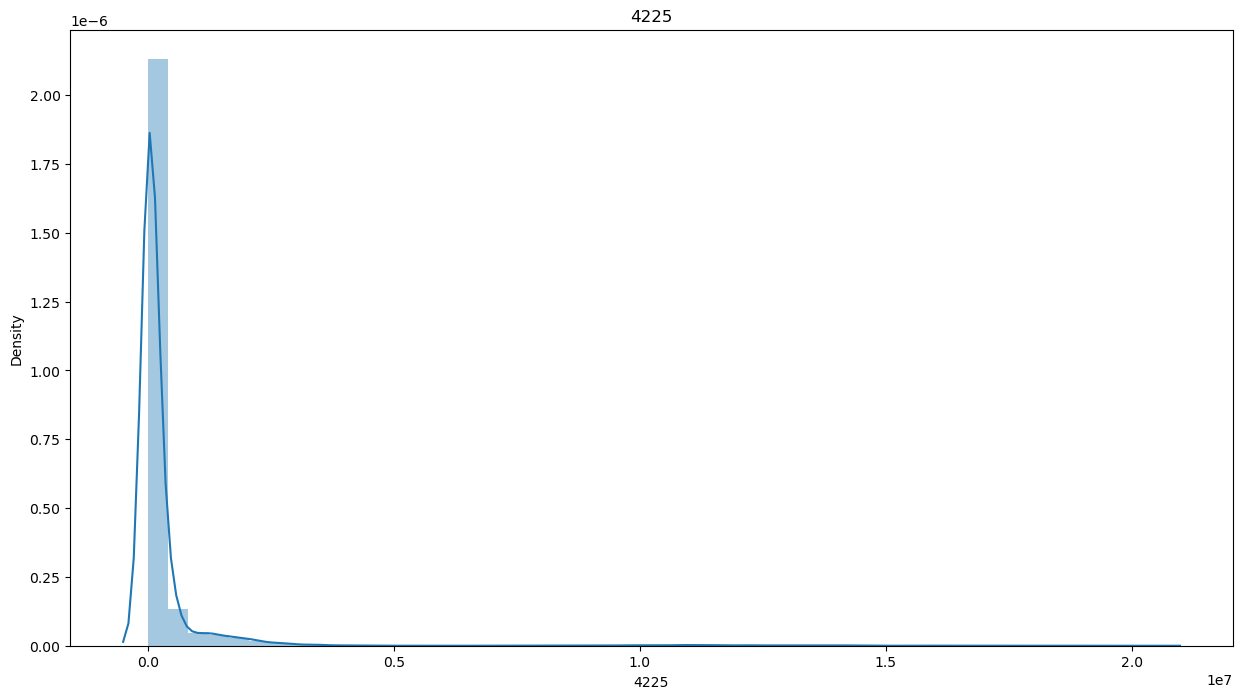

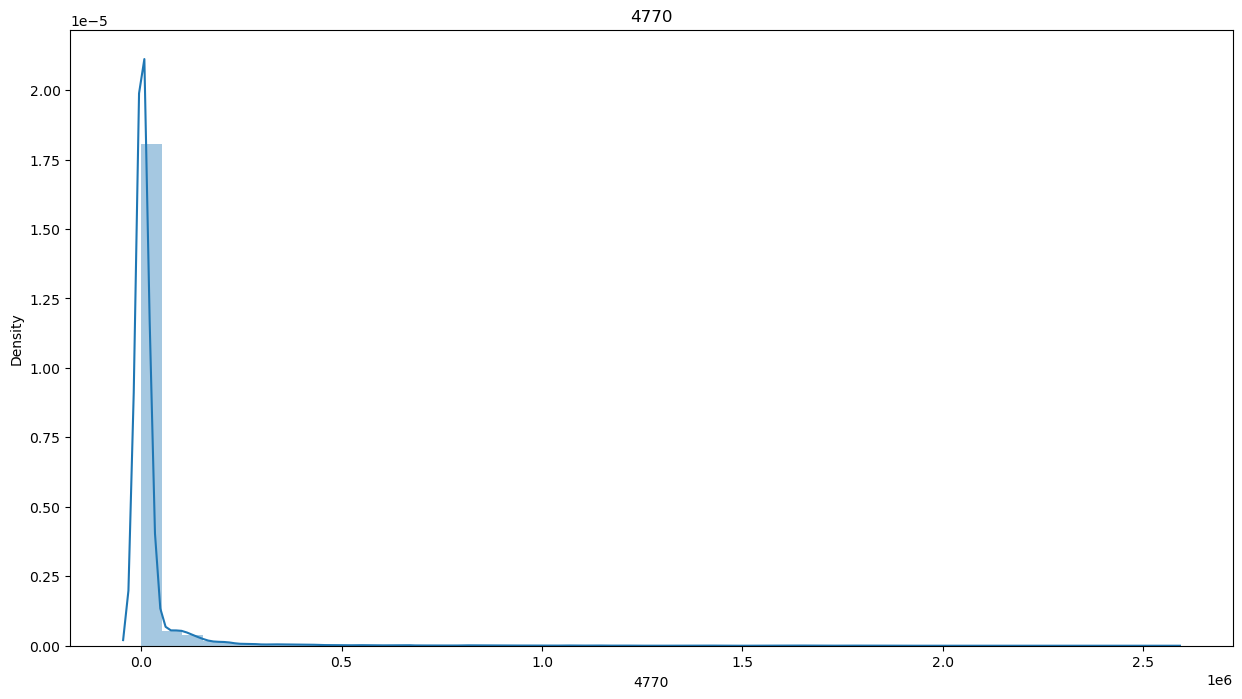

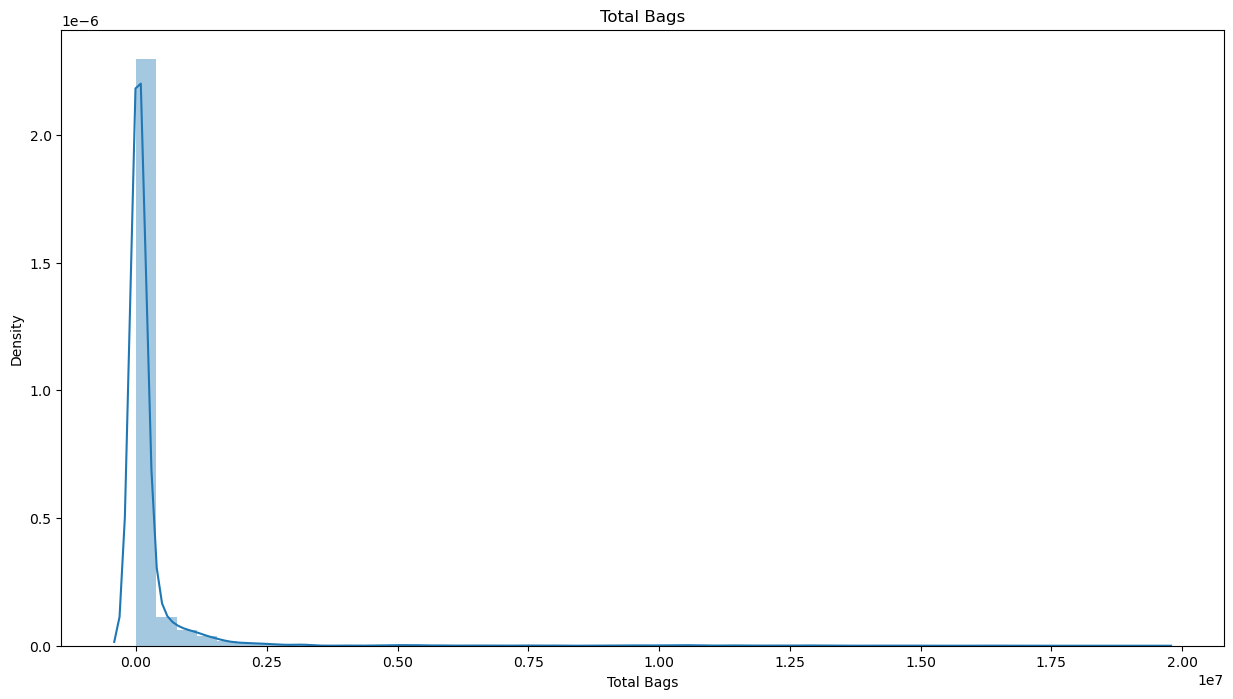

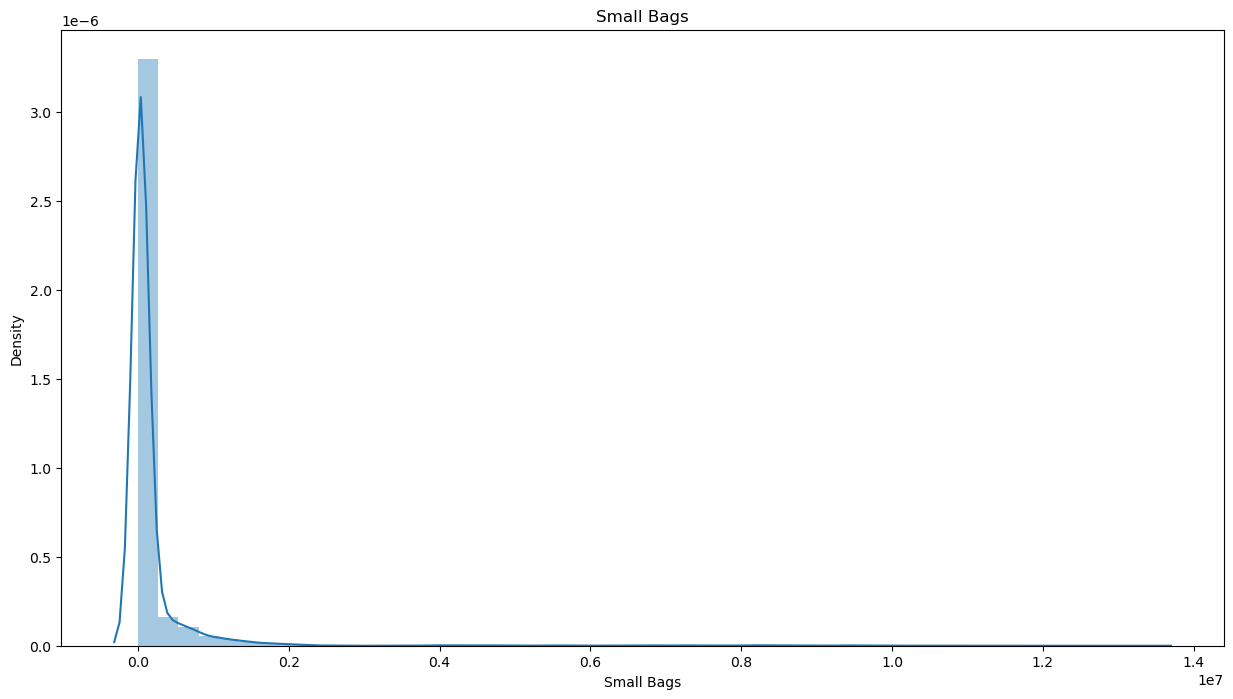

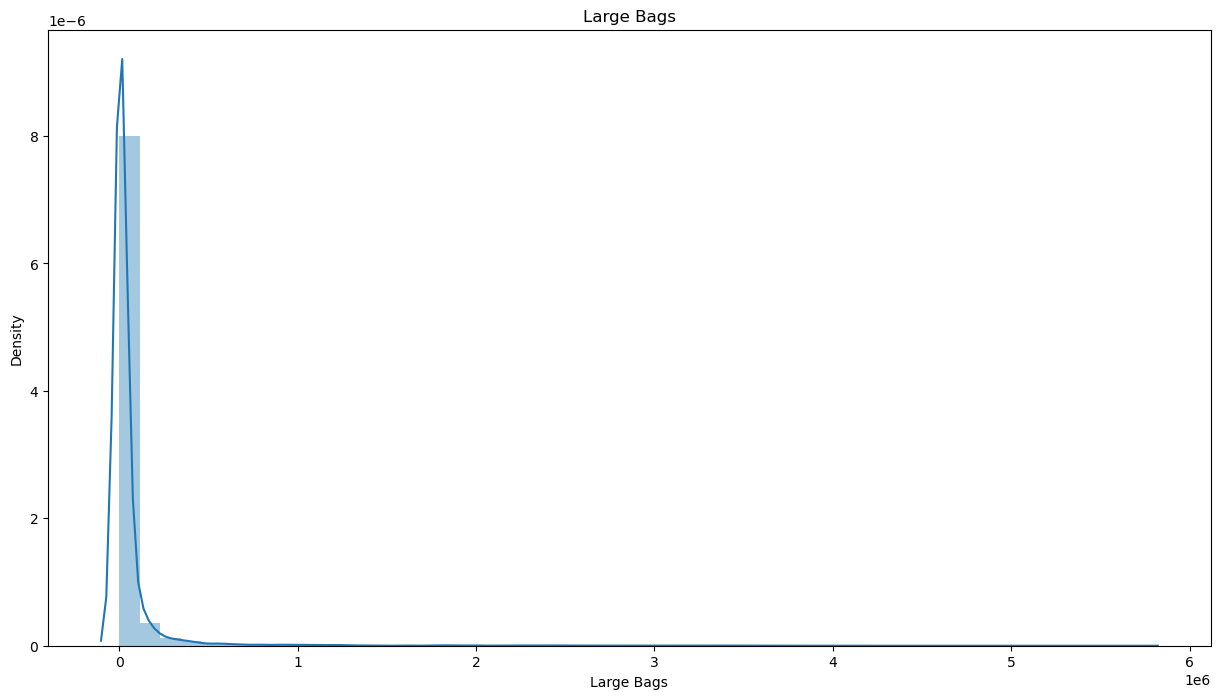

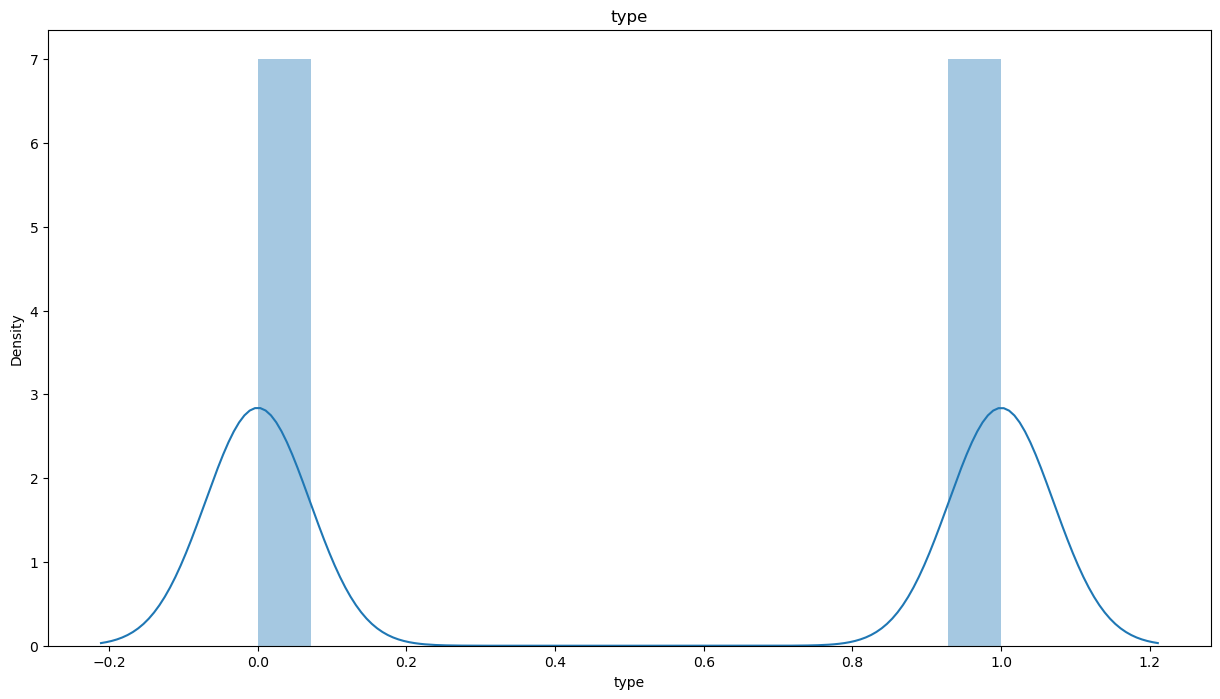

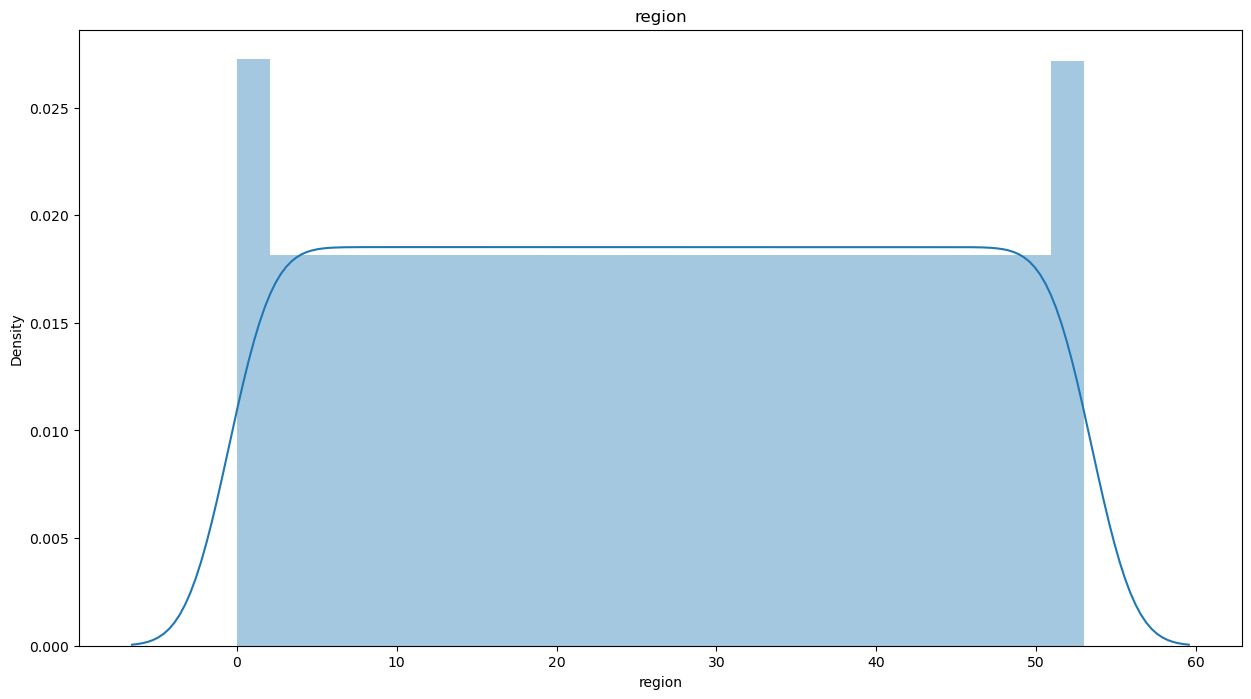

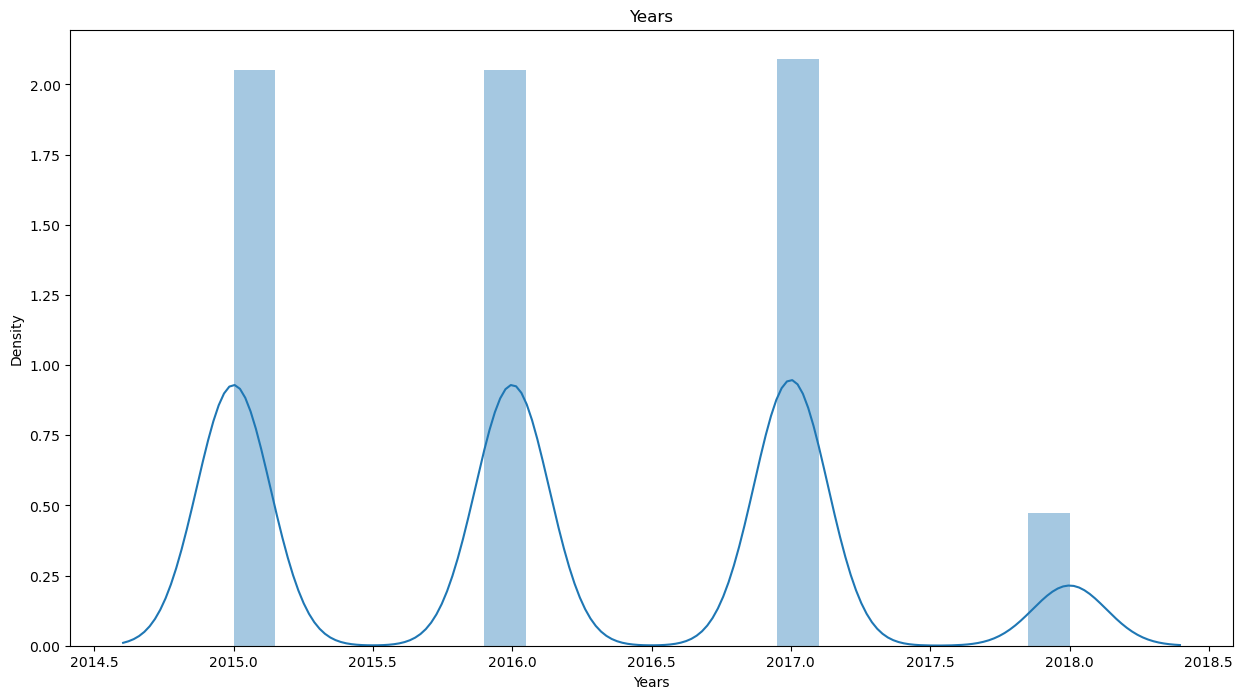

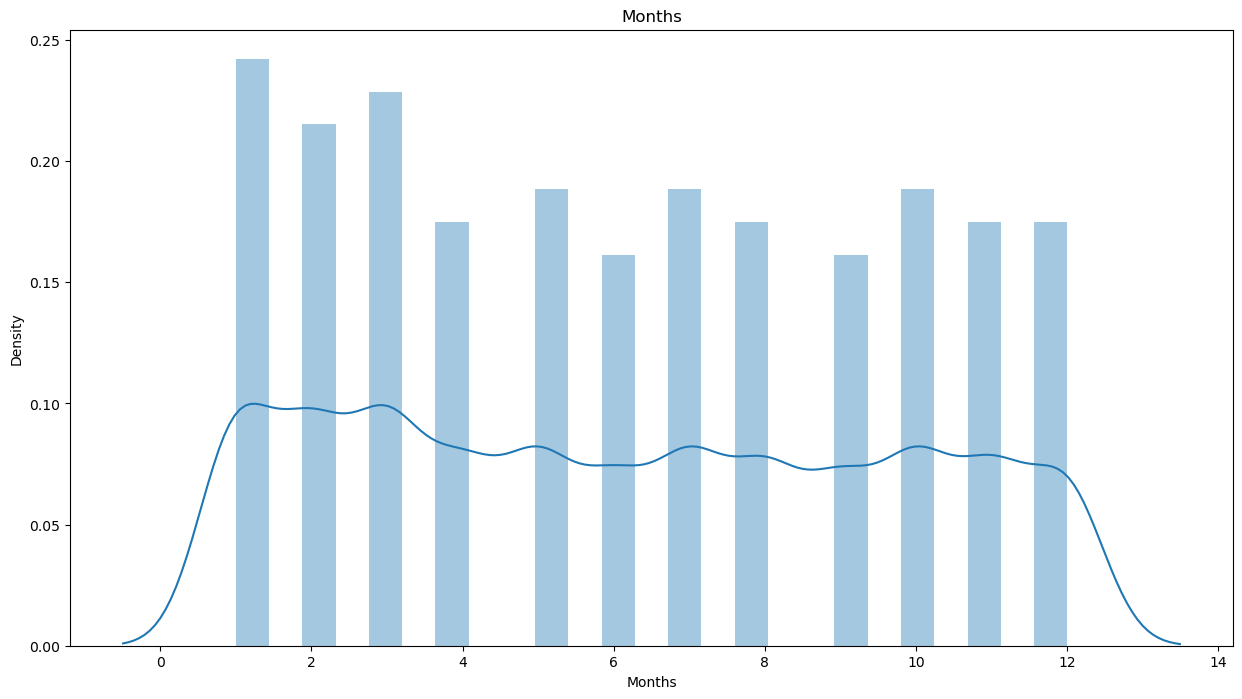

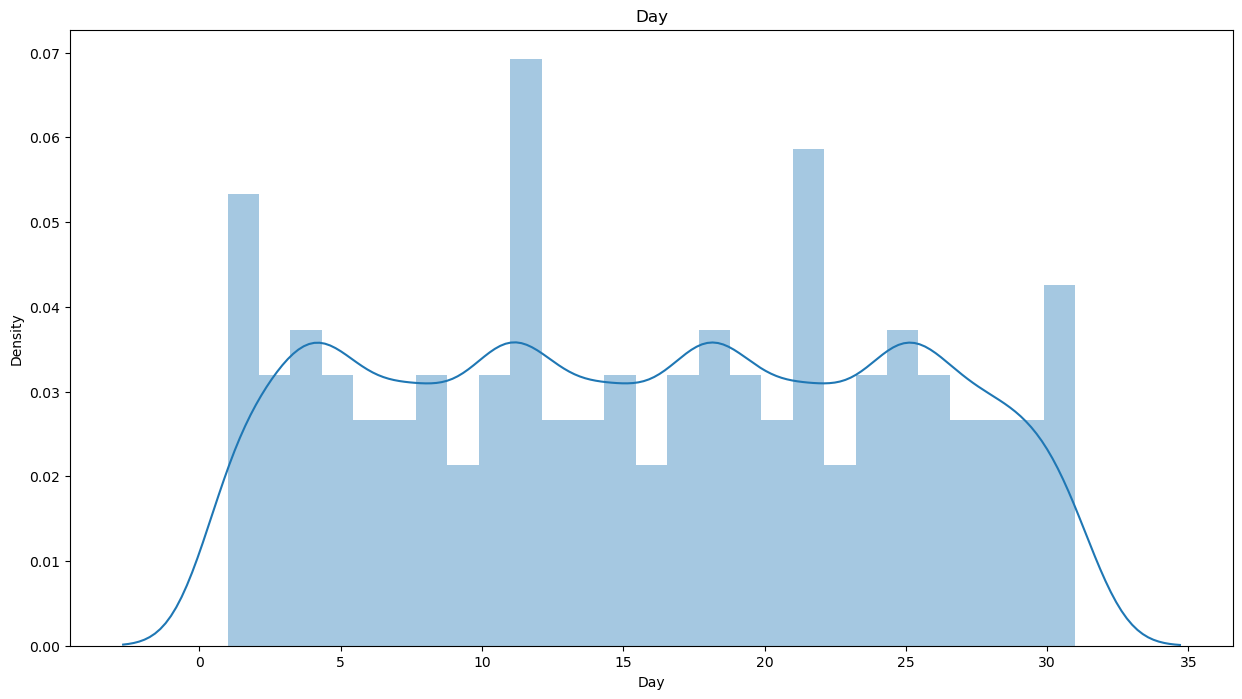

In [31]:
for i in df.columns:
    plt.figure(figsize = (15,8))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

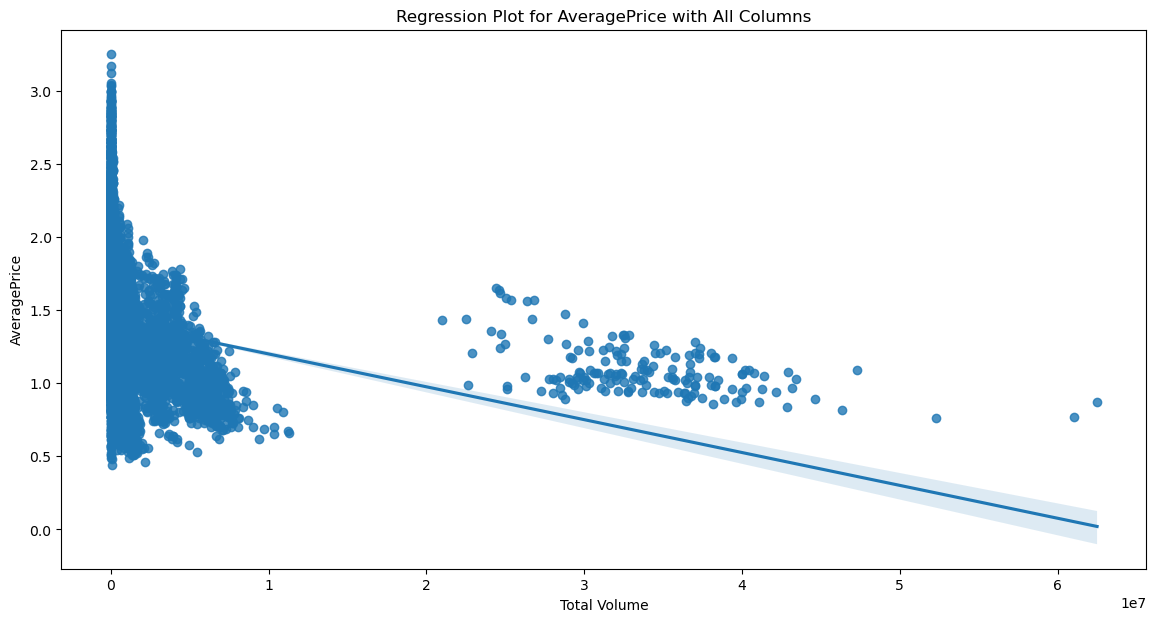

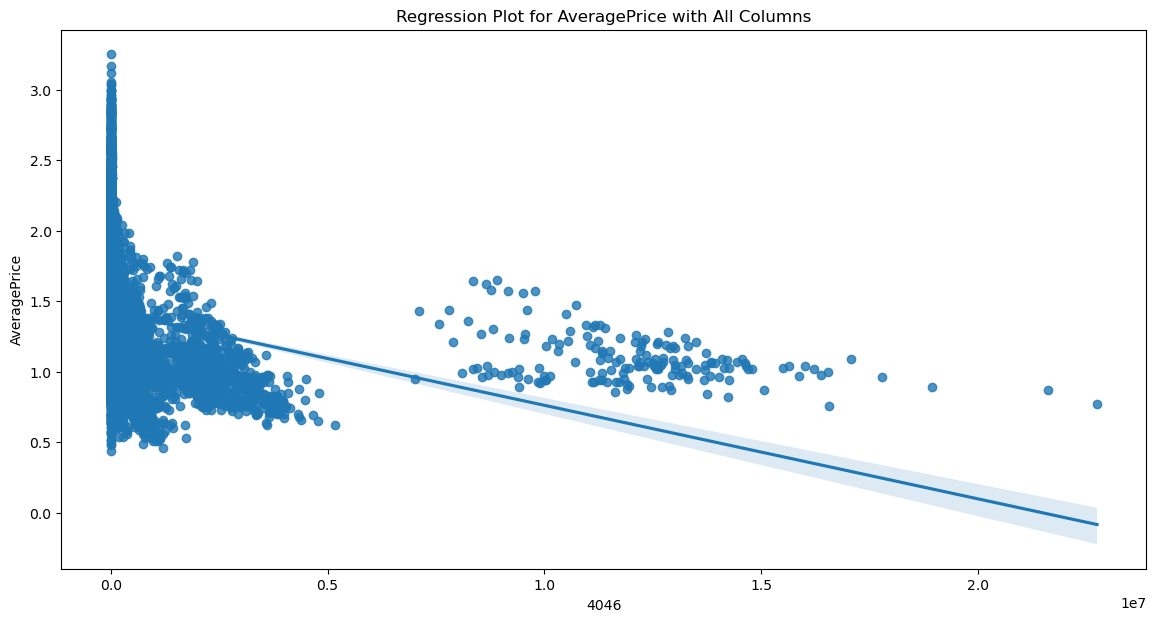

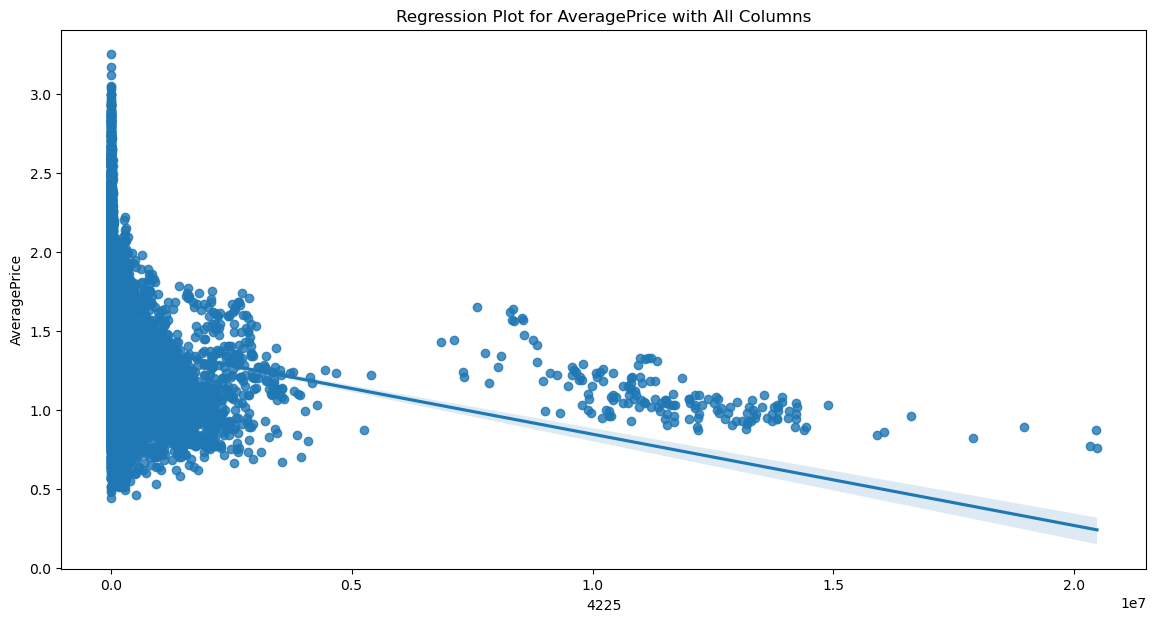

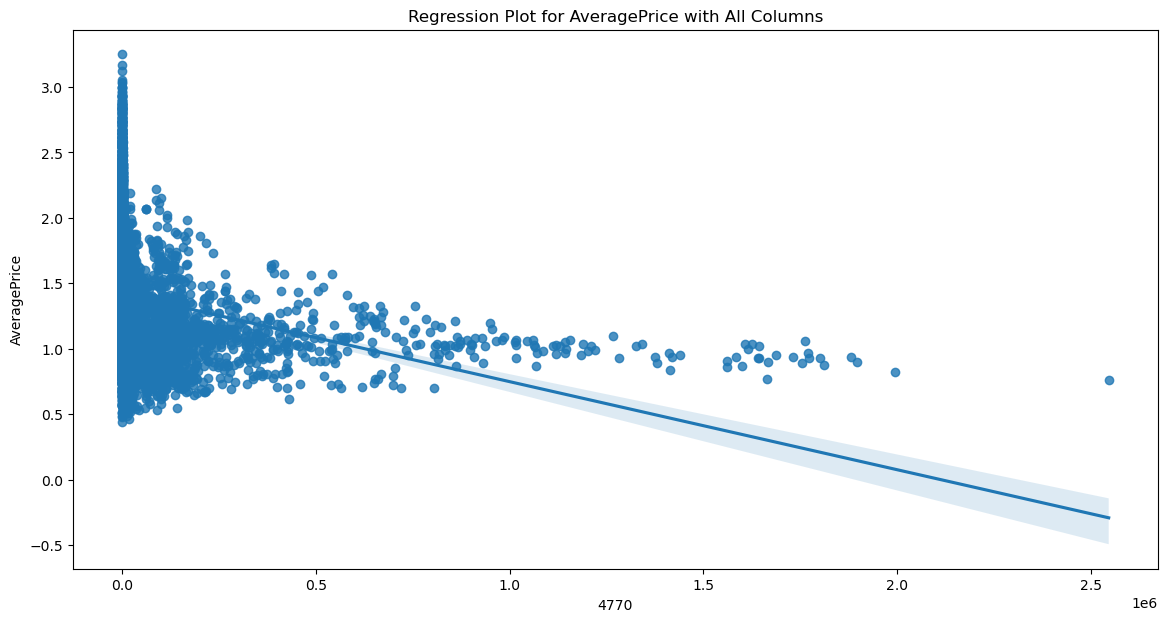

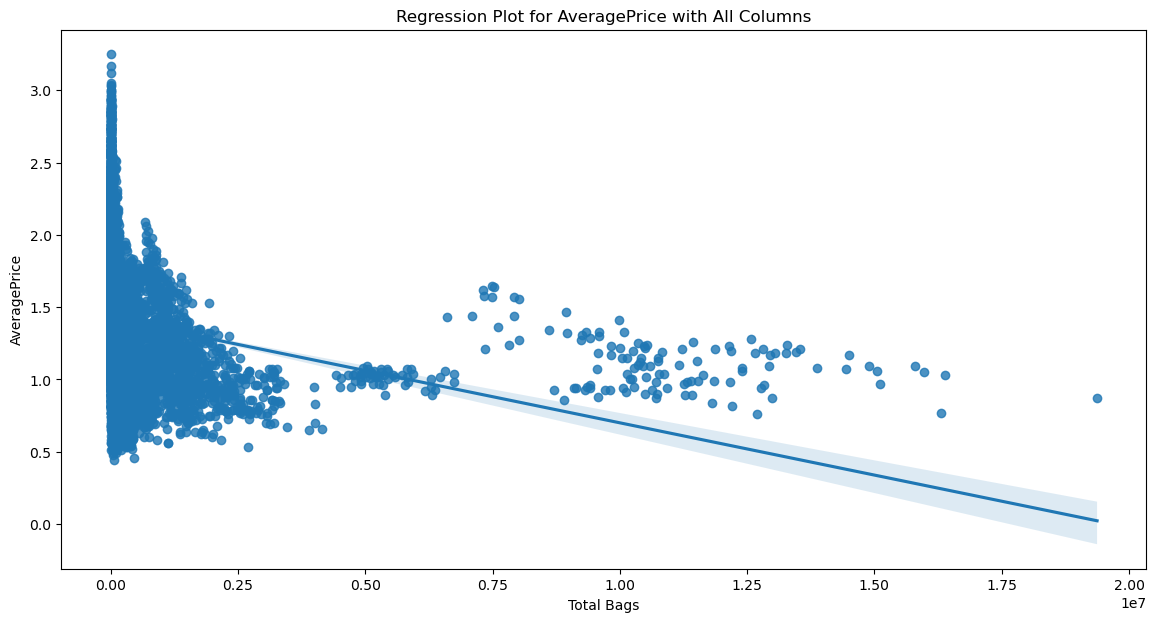

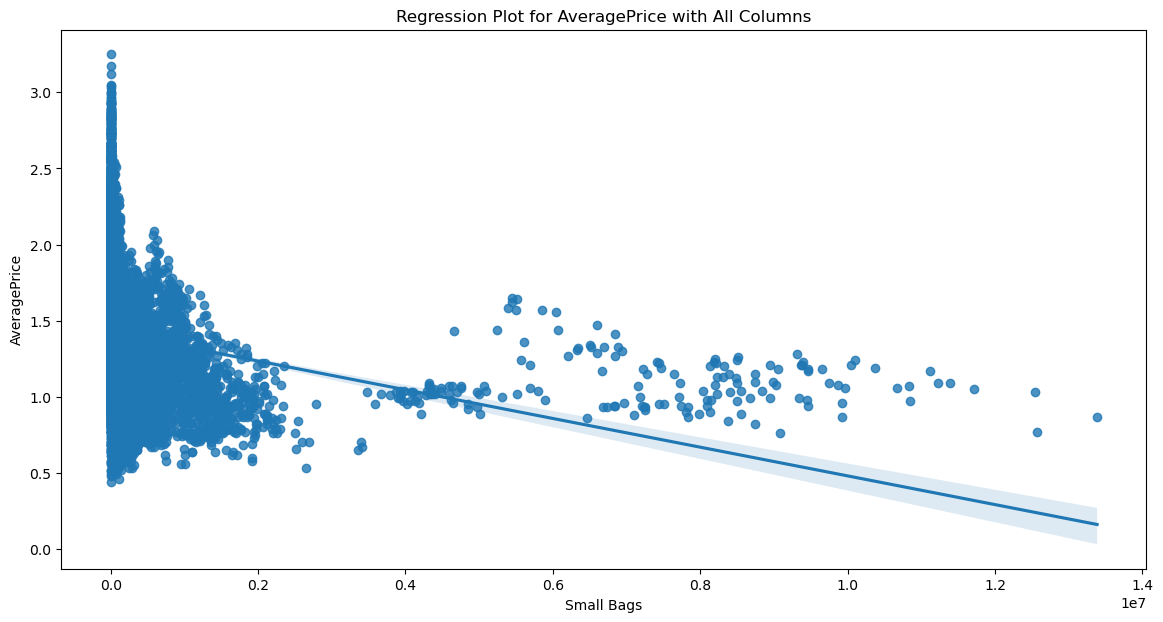

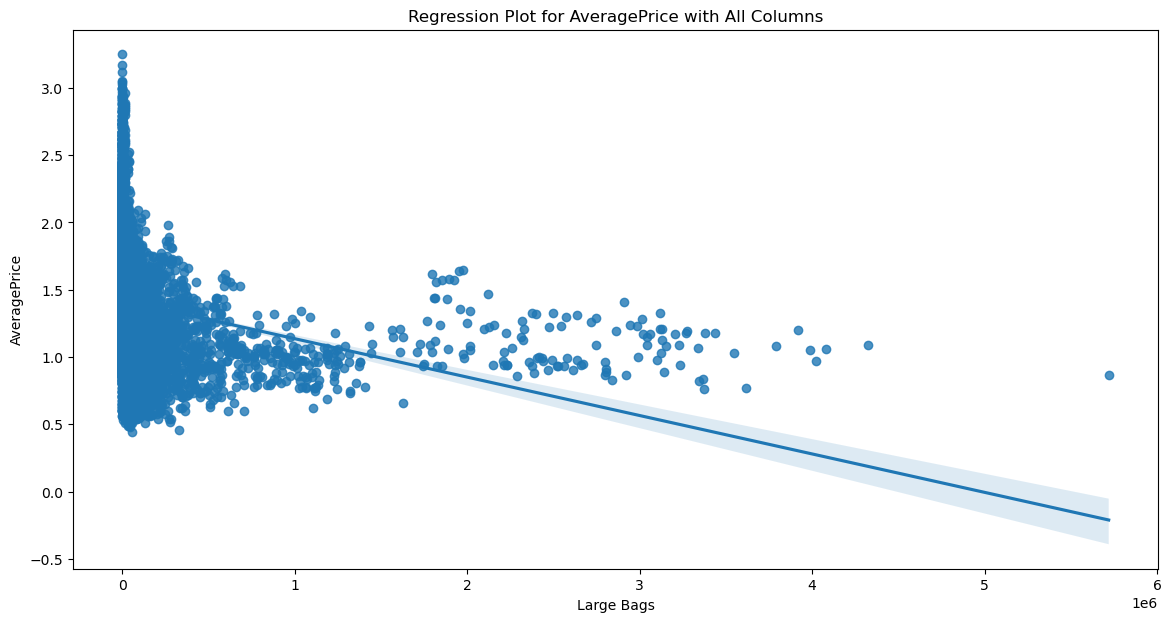

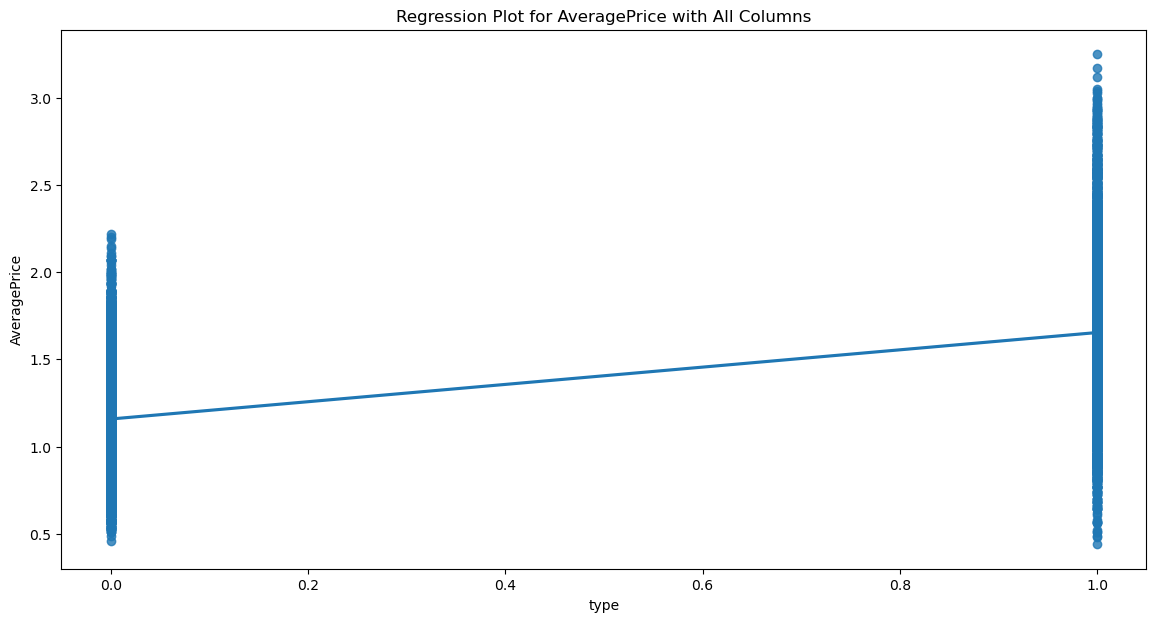

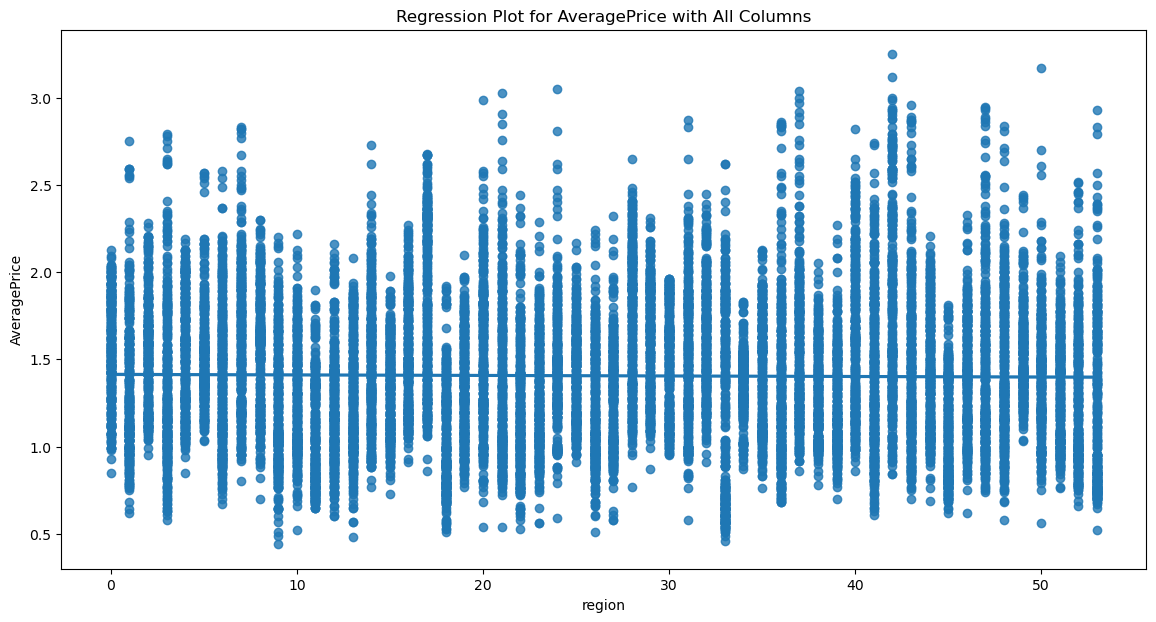

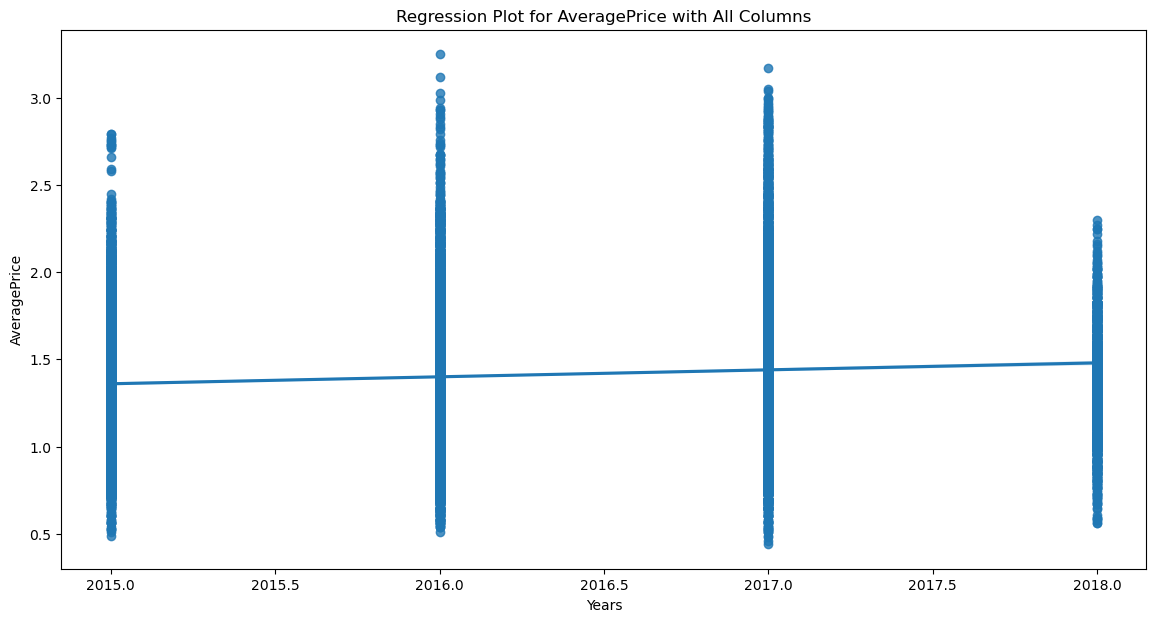

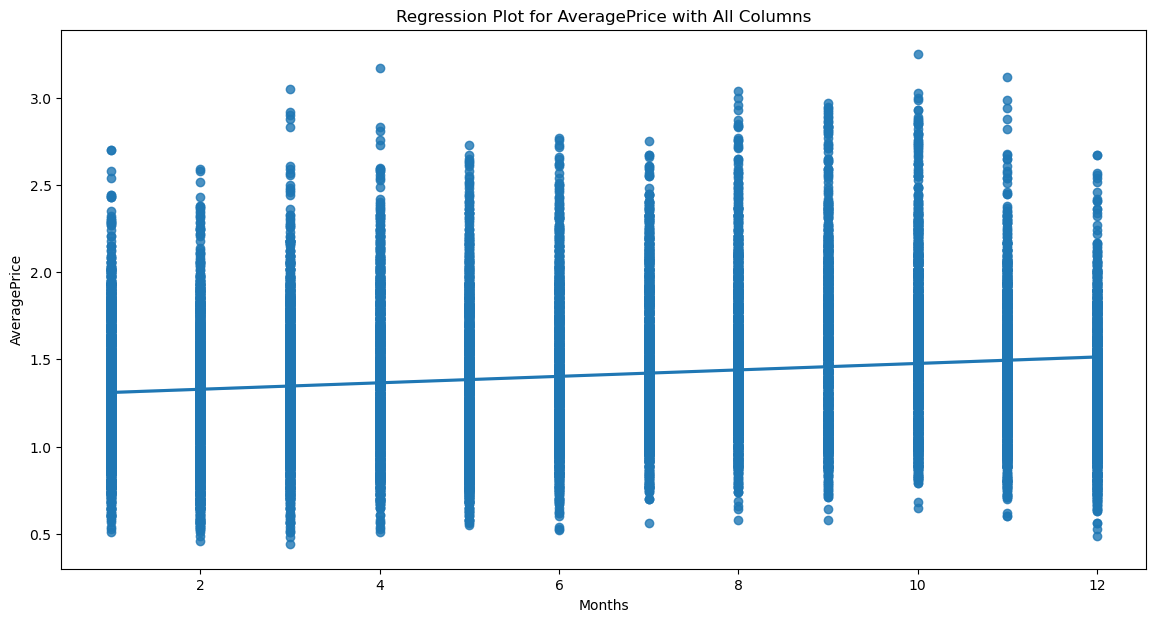

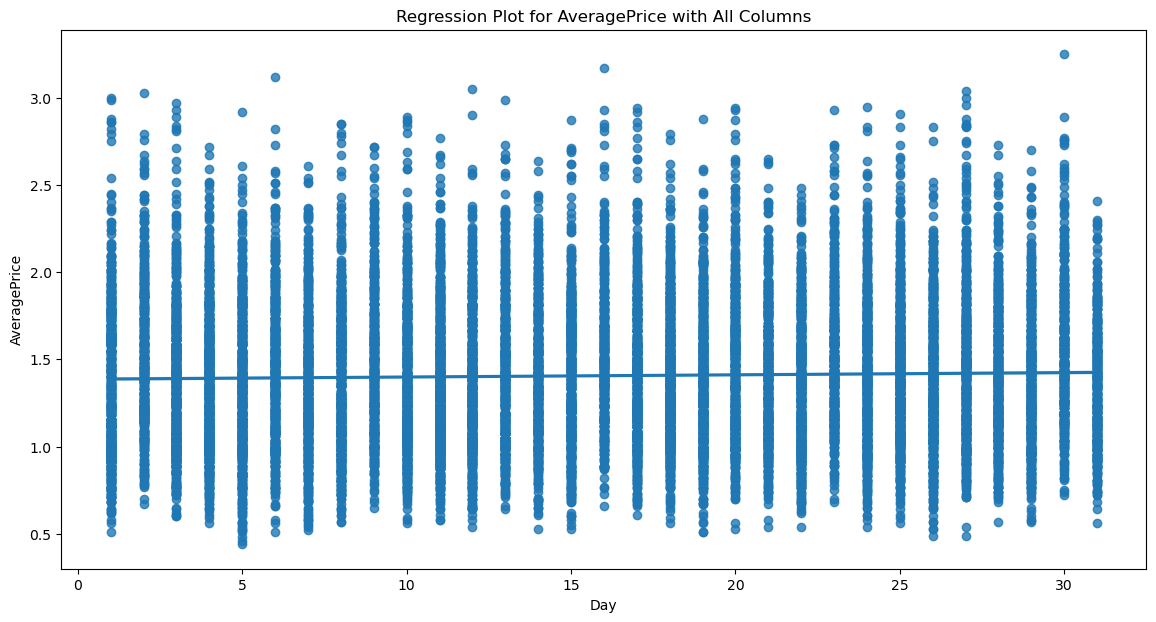

In [32]:
# for loop for reg plot of AveragePrice with all other columns
for i in df.columns[1:]:
    plt.figure(figsize = (14,7))
    sns.regplot(x=df[i], y=df['AveragePrice'])
    plt.title('Regression Plot for AveragePrice with All Columns')
    plt.xlabel(i, fontsize = 10)
    plt.ylabel('AveragePrice', fontsize = 10)
    plt.show()

let us first remove the skewness as all the points are away from linear line

Lets split the data and train them aswell

In [33]:
# spliting the data into features and label
x = df.drop(columns = ['AveragePrice'])
y = df['AveragePrice']

In [34]:
x_new = power_transform(x, method = 'yeo-johnson')
x_new = pd.DataFrame(x_new, columns = x.columns)
x = x_new

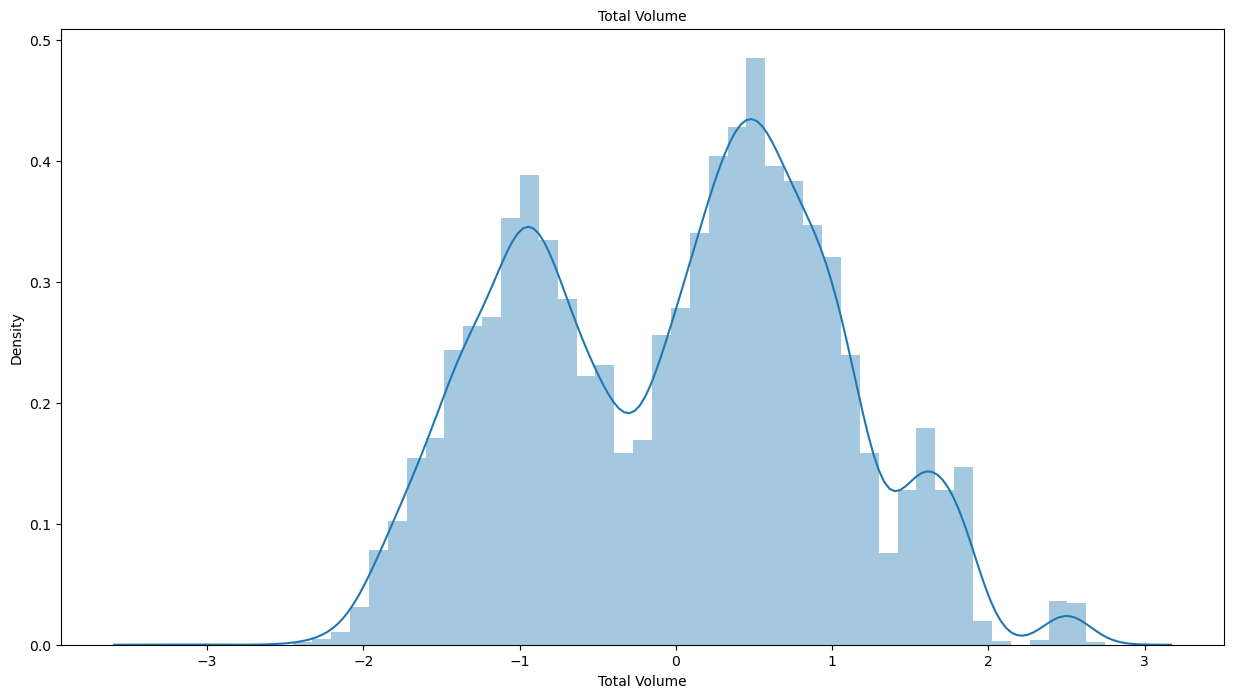

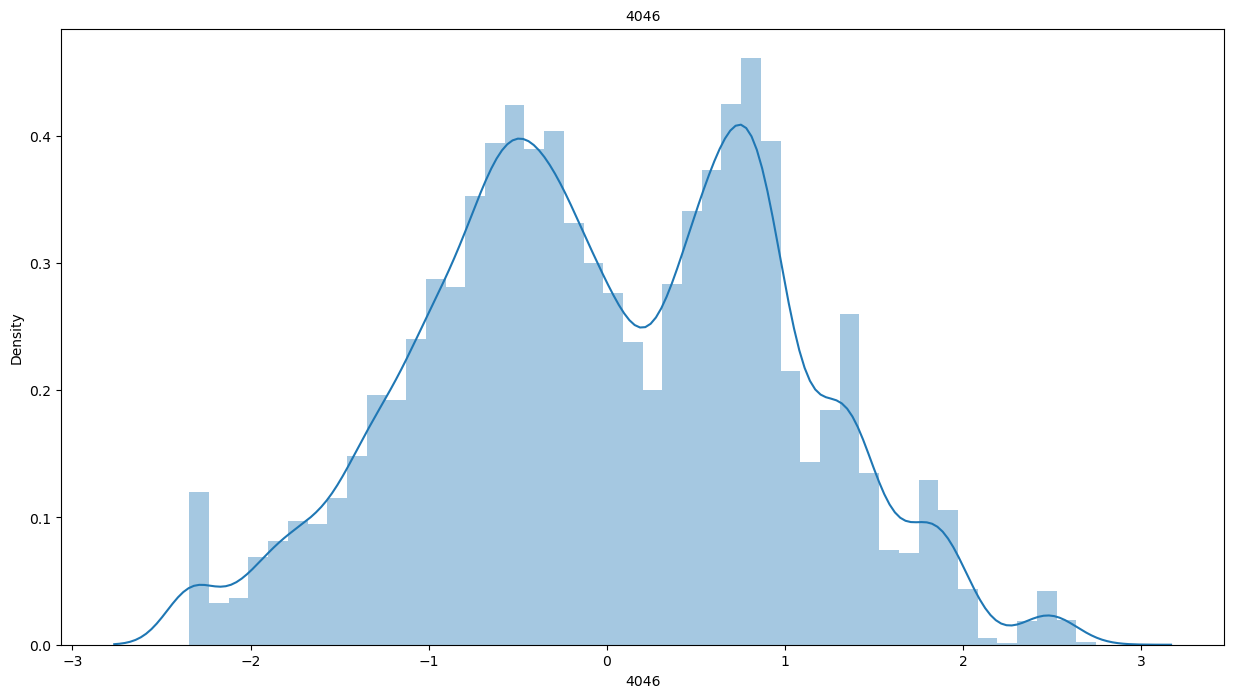

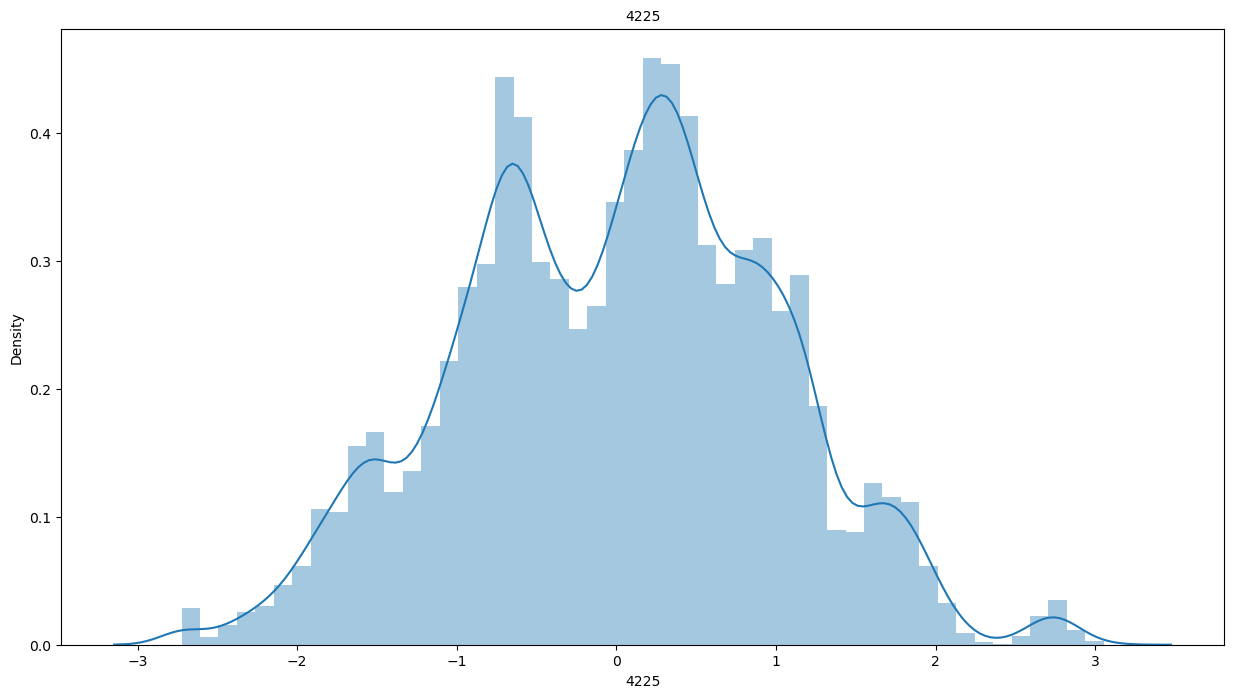

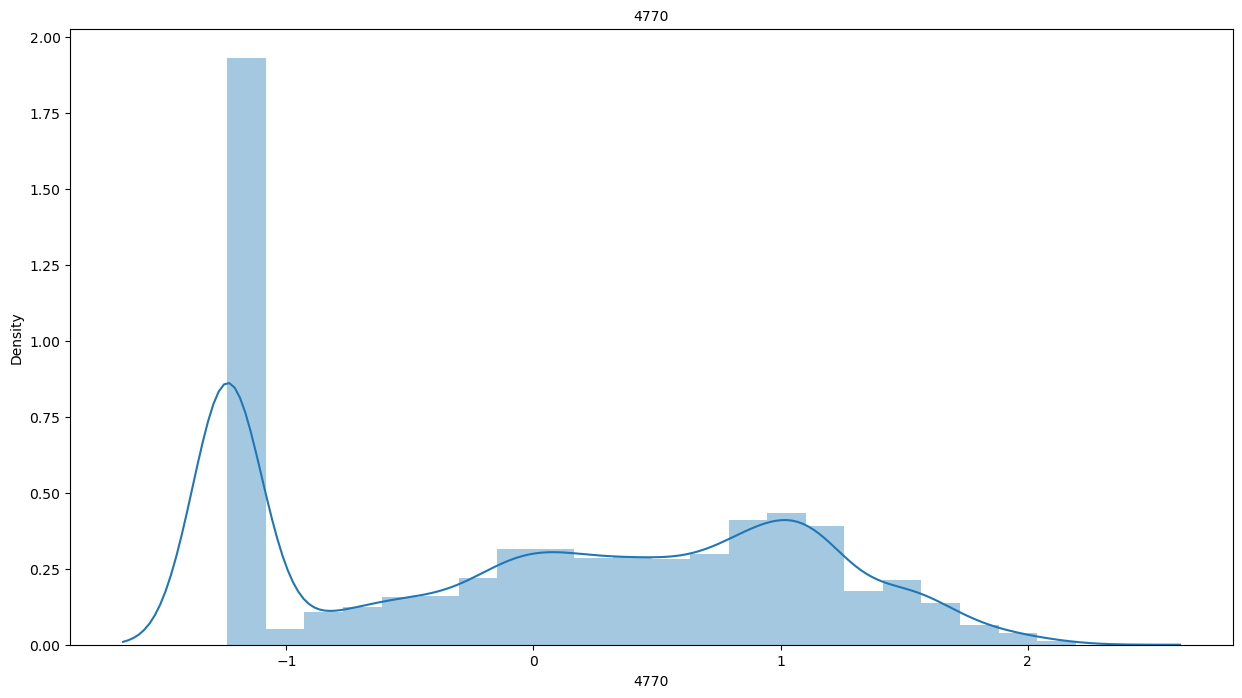

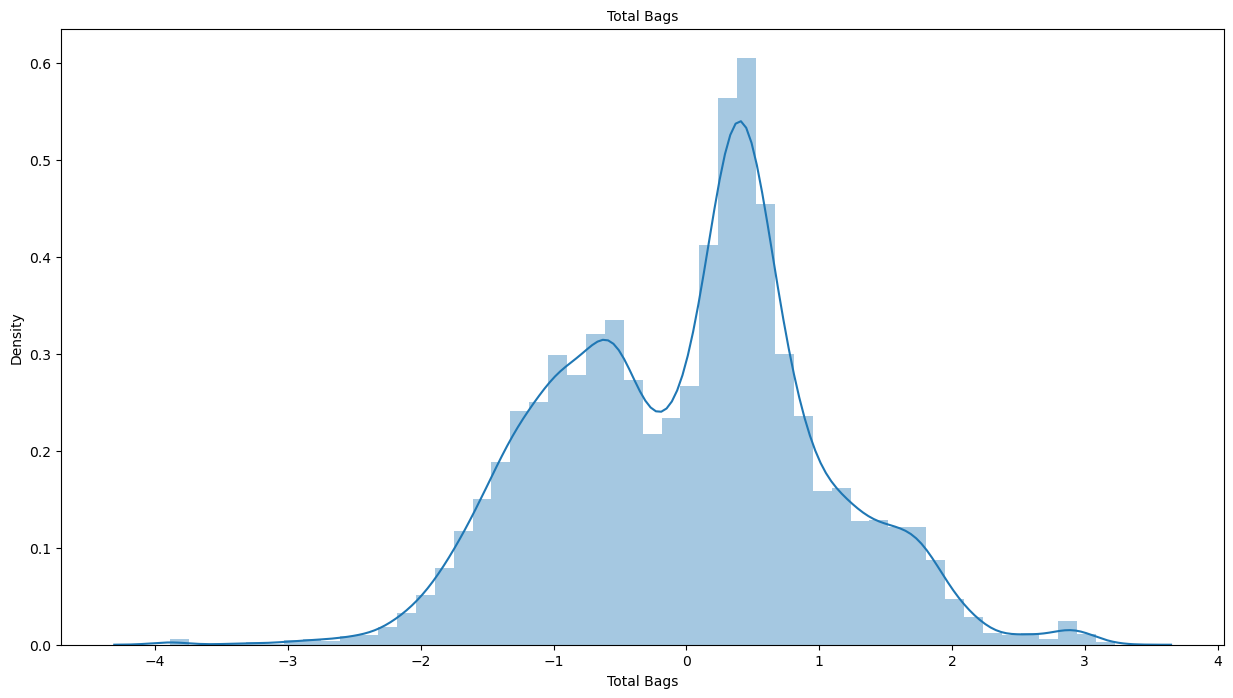

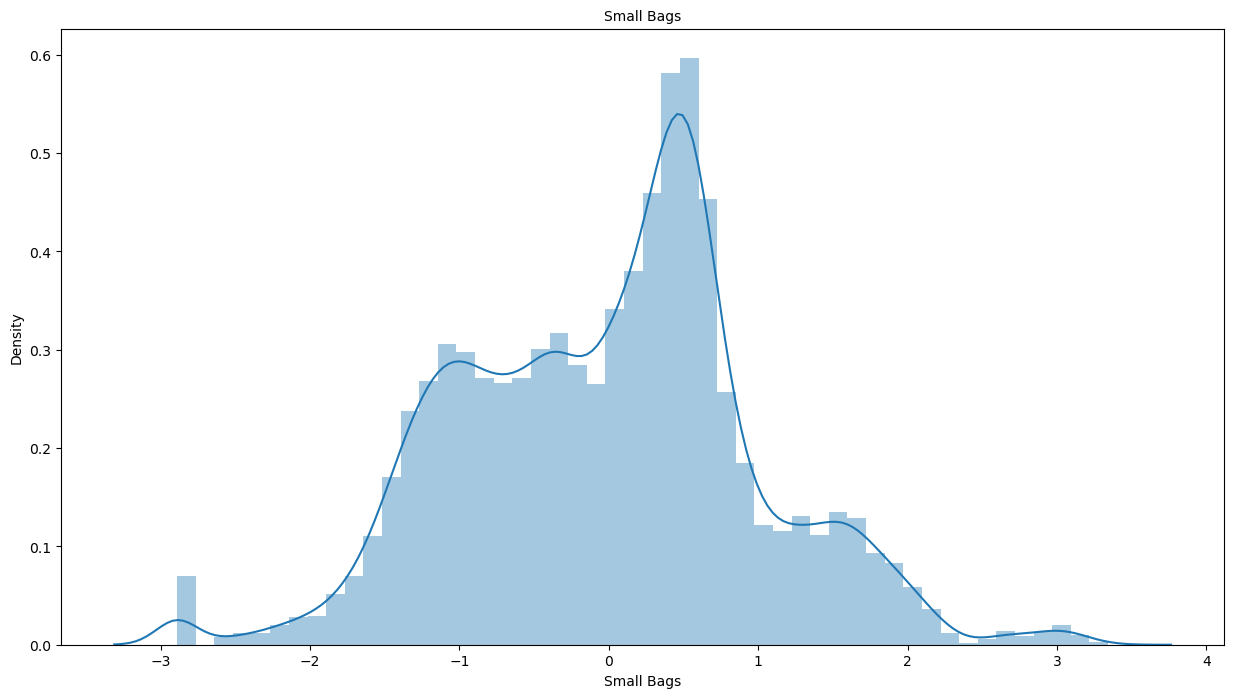

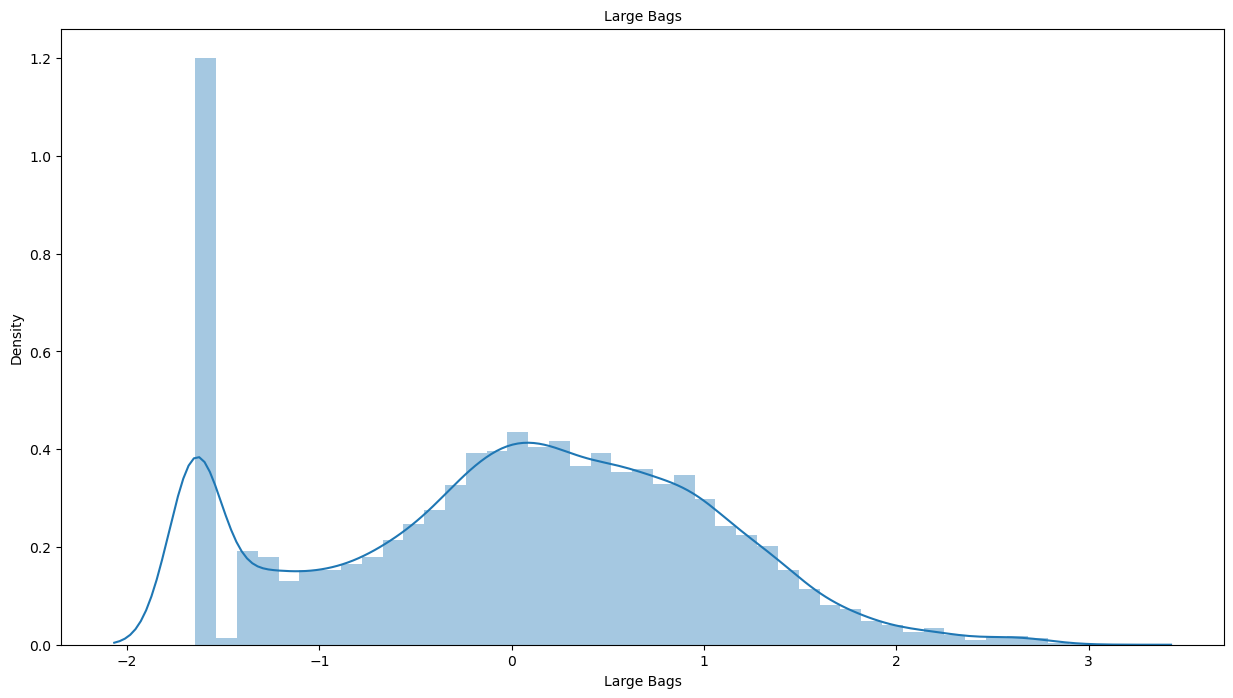

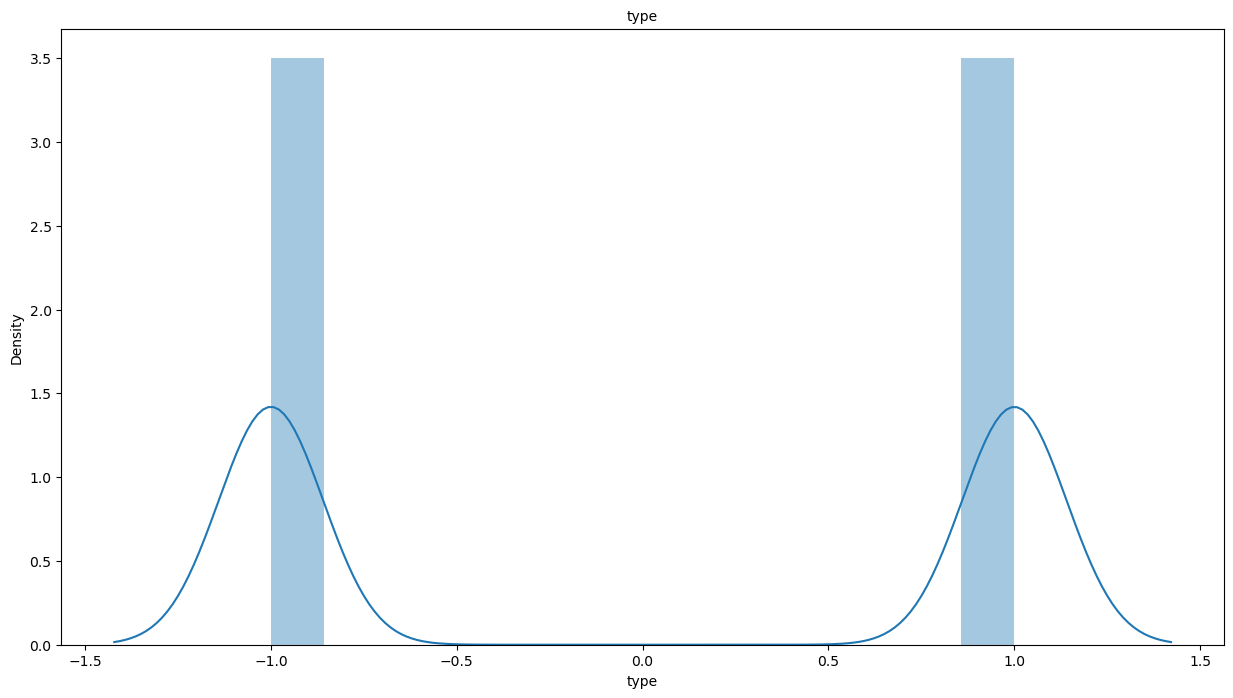

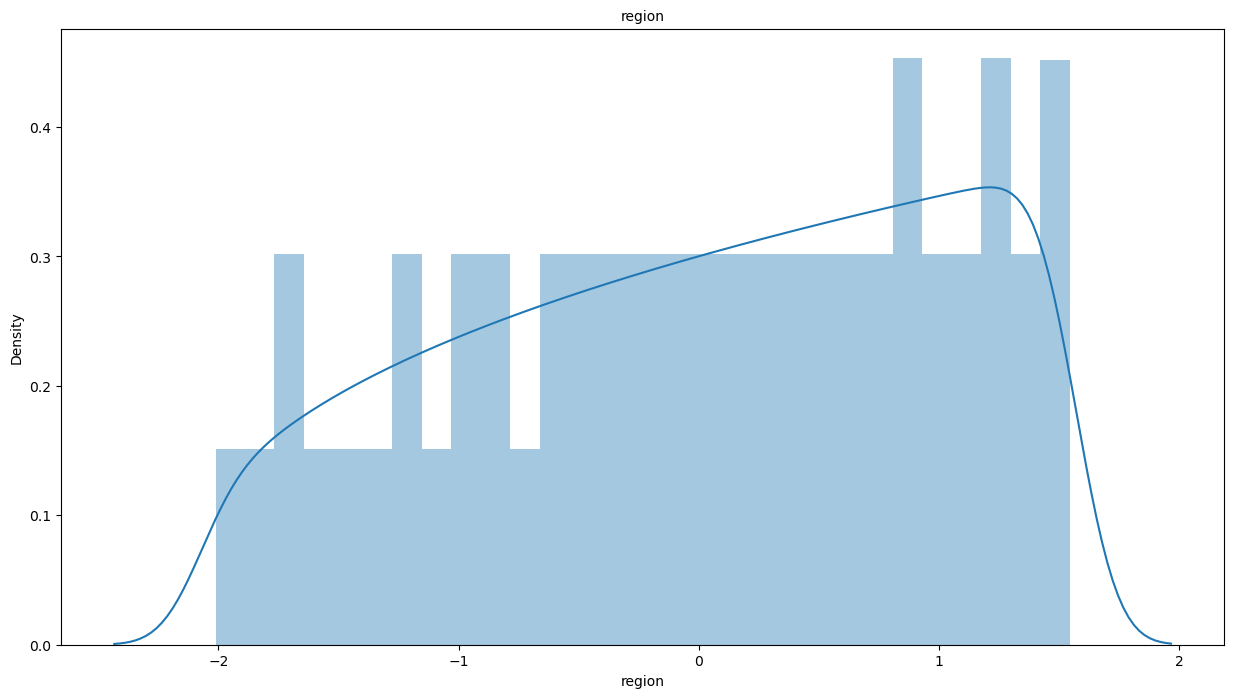

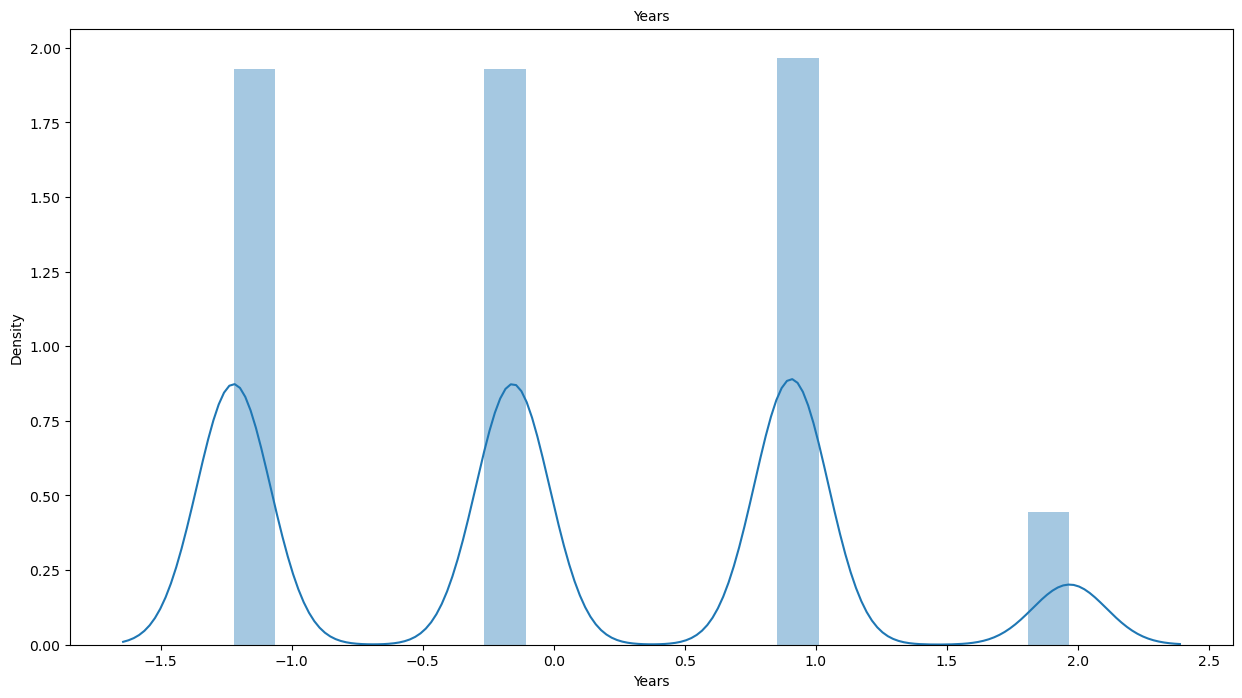

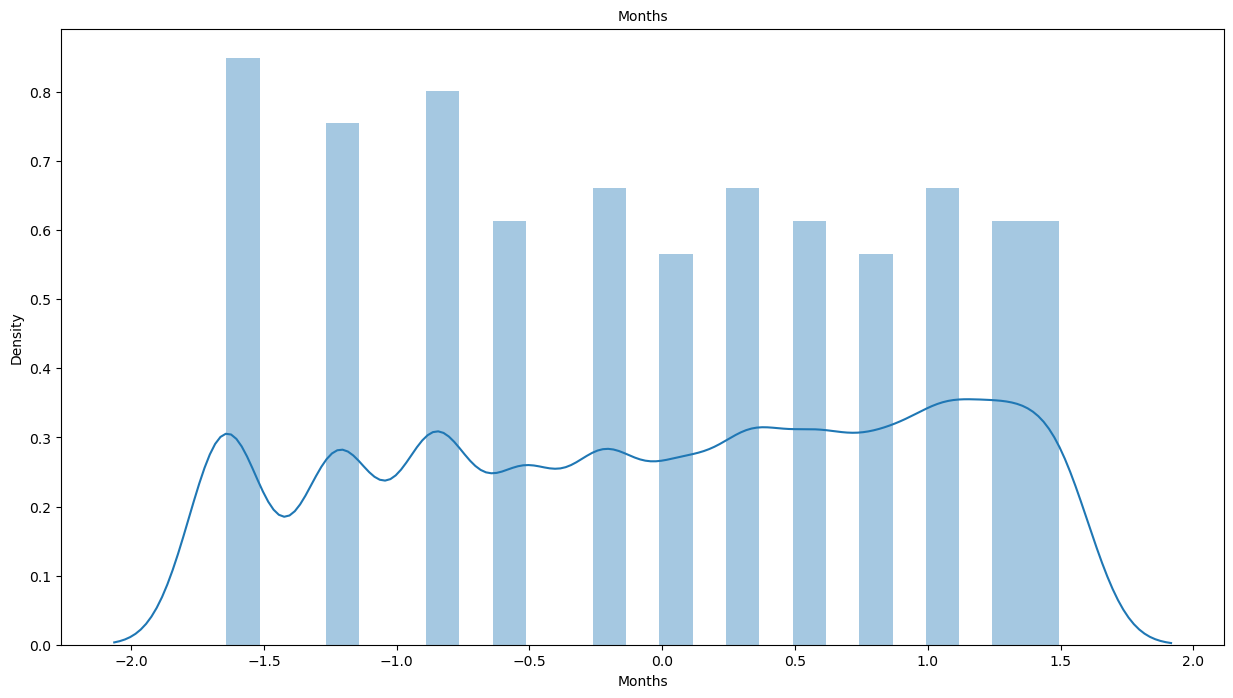

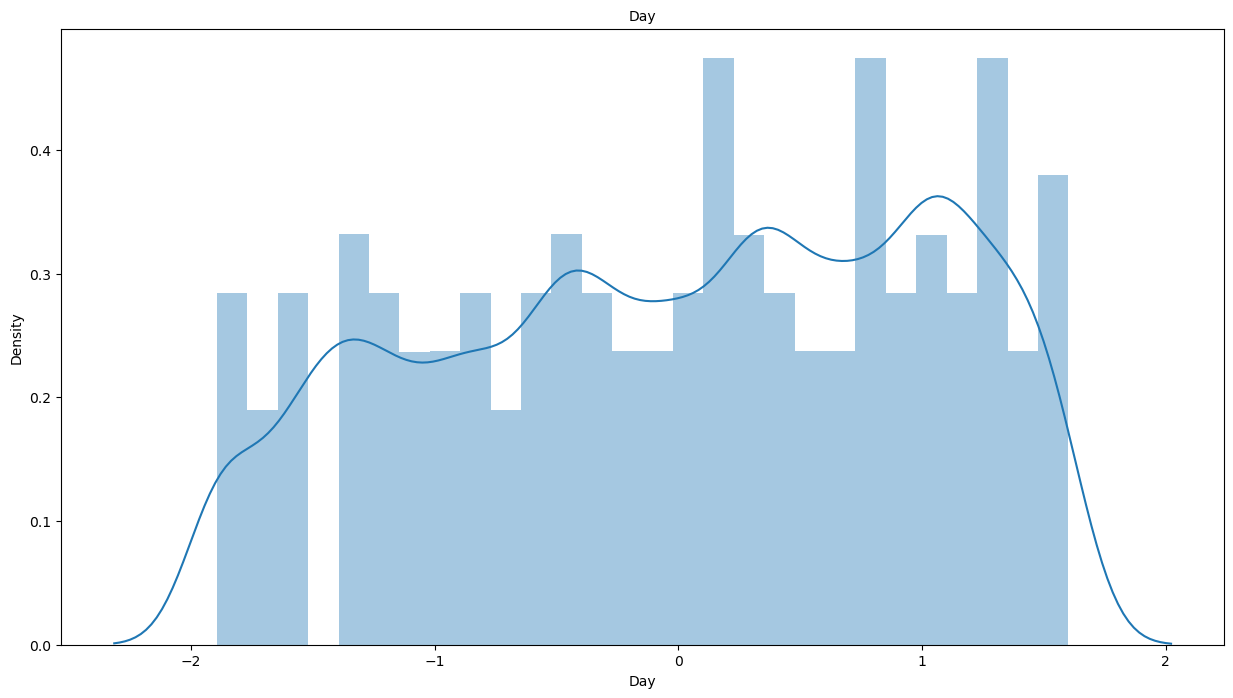

In [35]:
for i in x.columns:
    plt.figure(figsize = (15,8))
    sns.distplot(x[i])
    plt.title(i, fontsize = 10)
    plt.show()

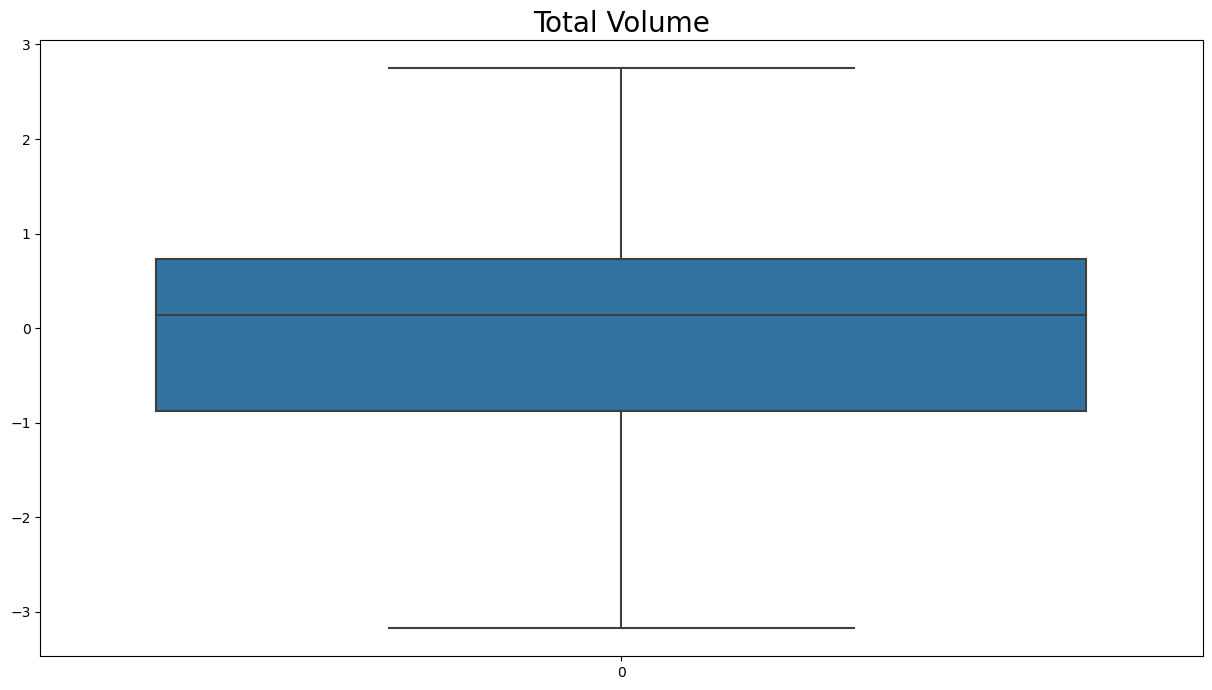

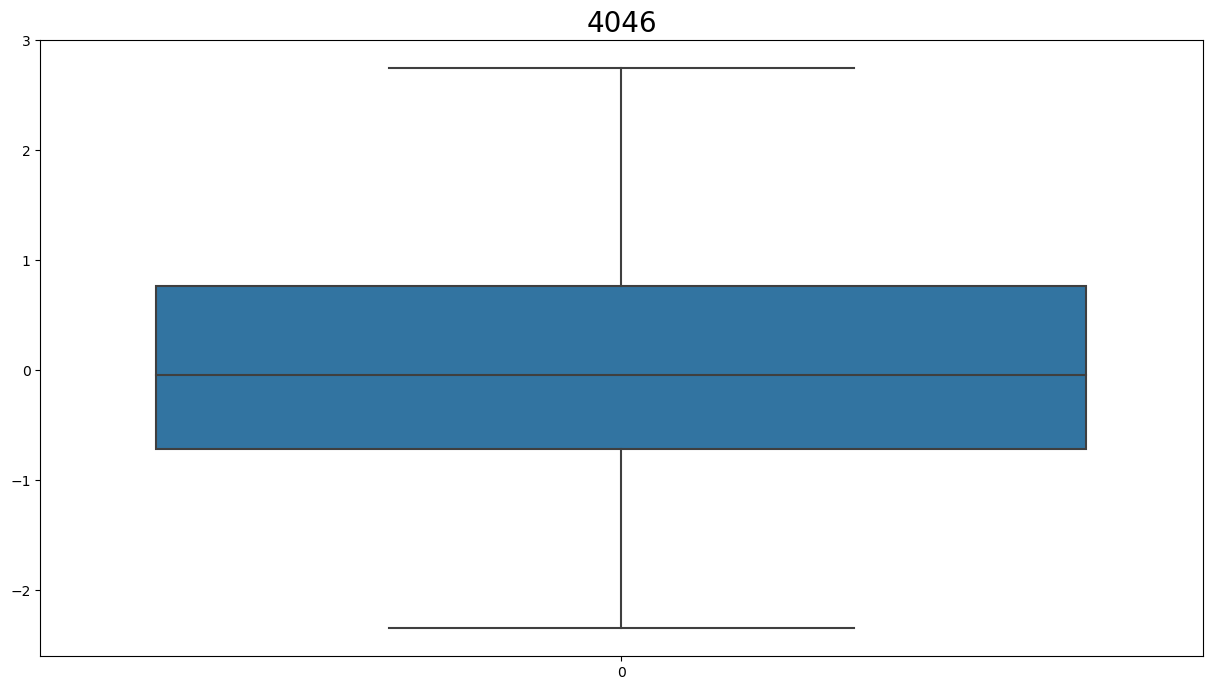

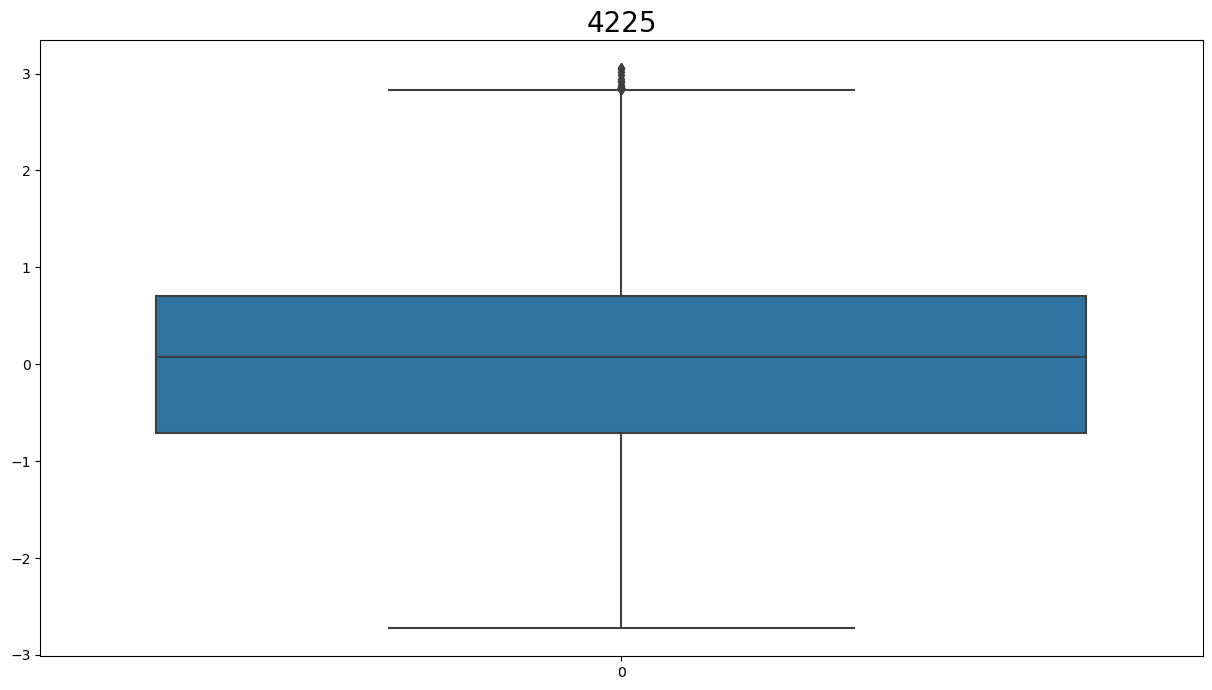

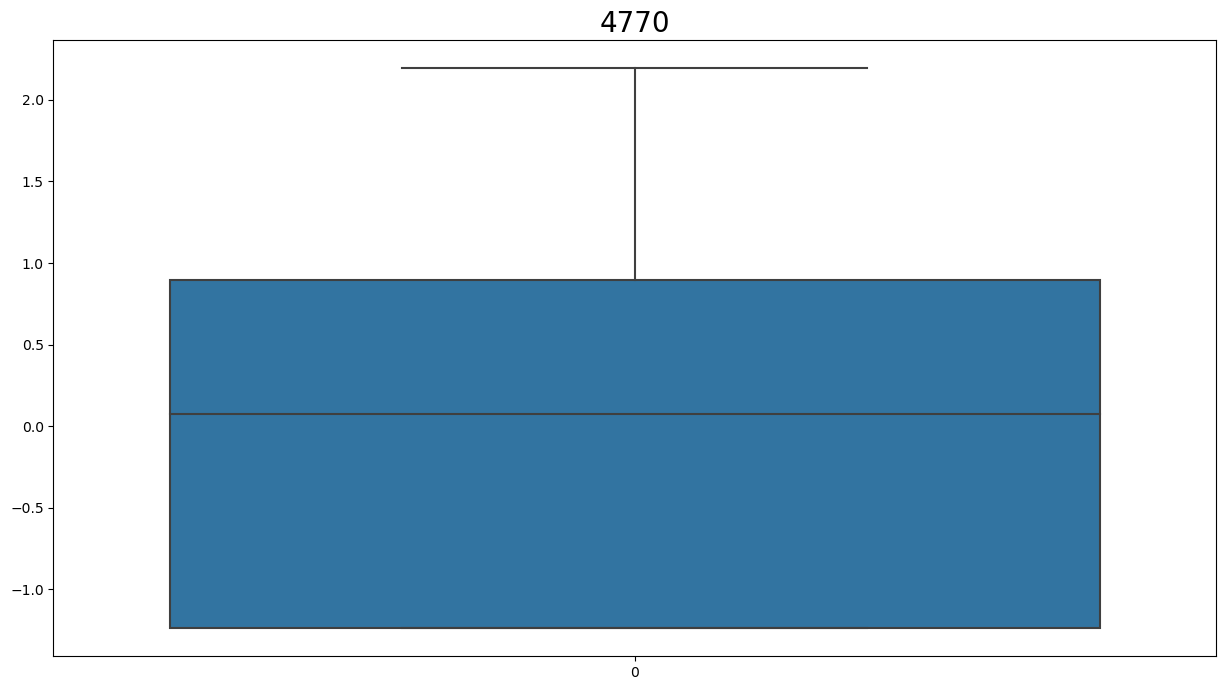

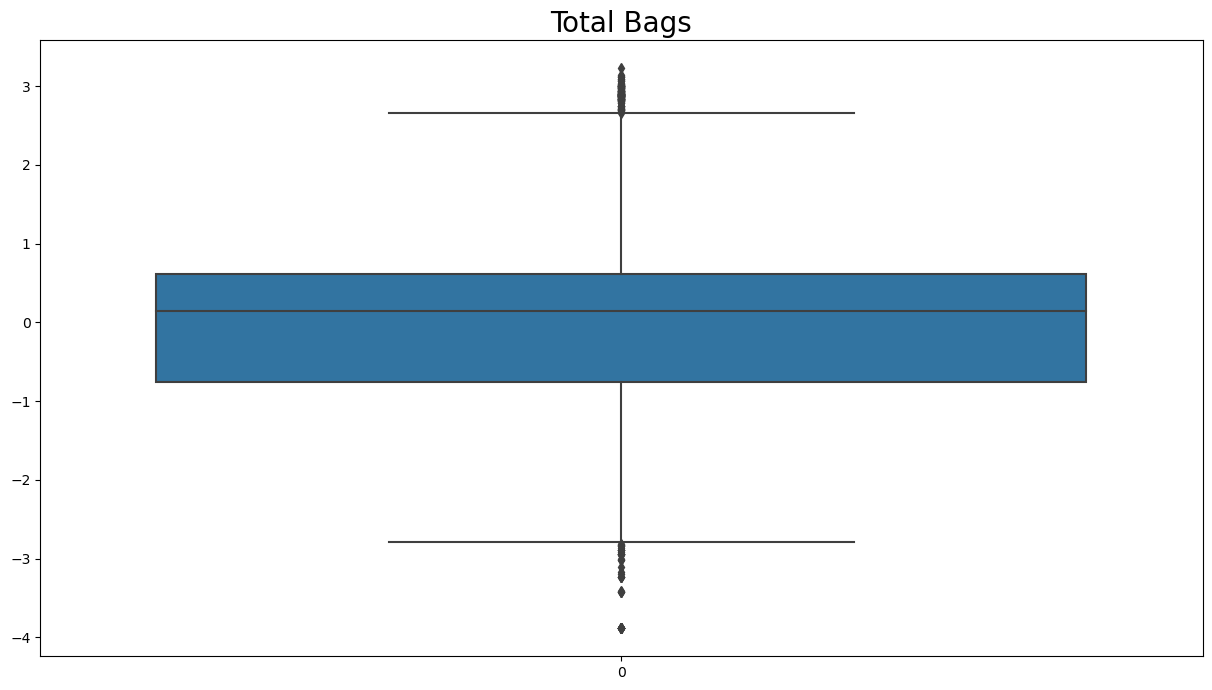

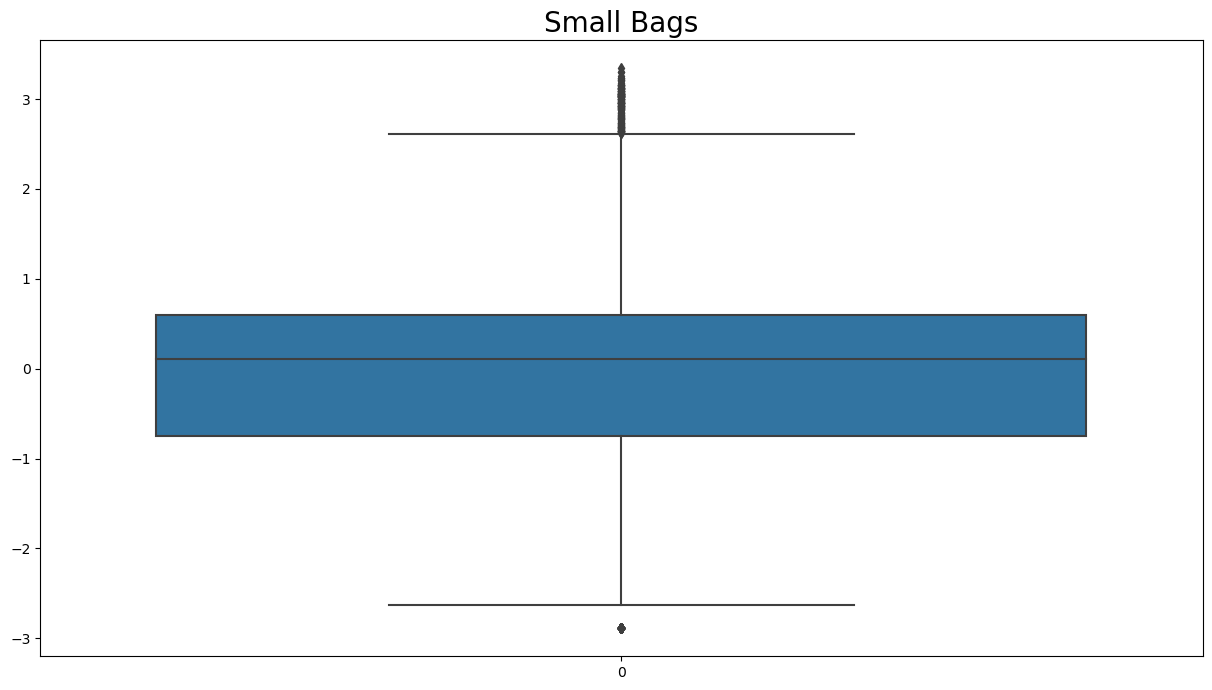

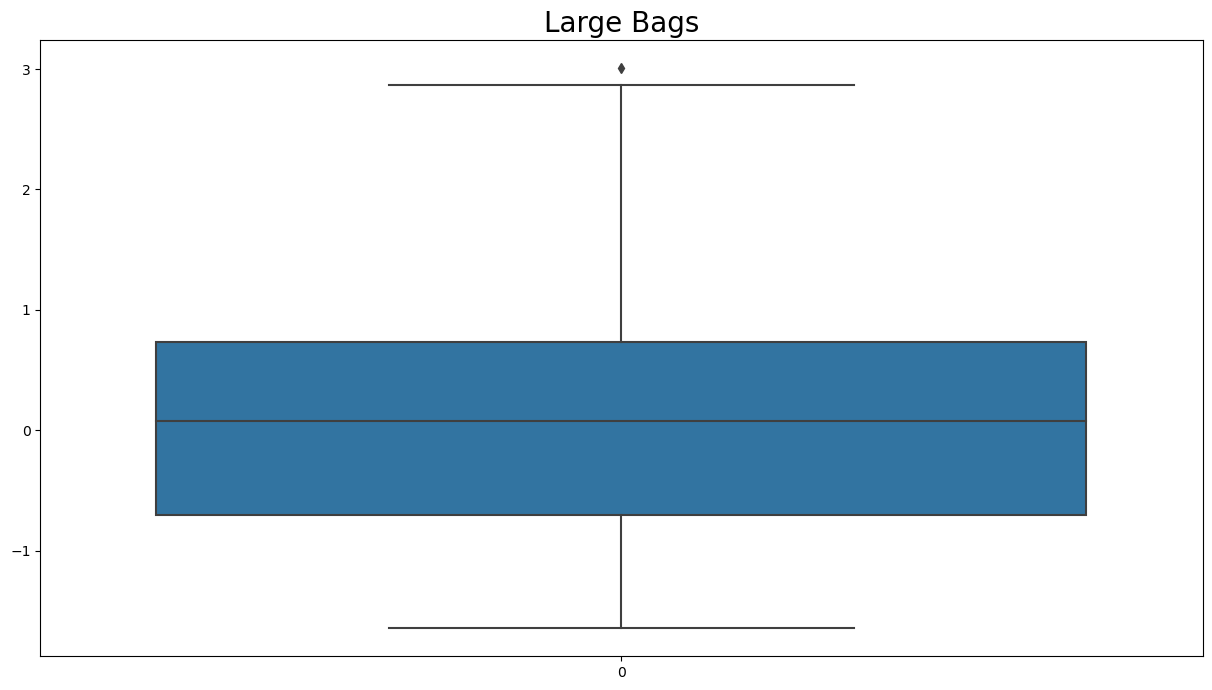

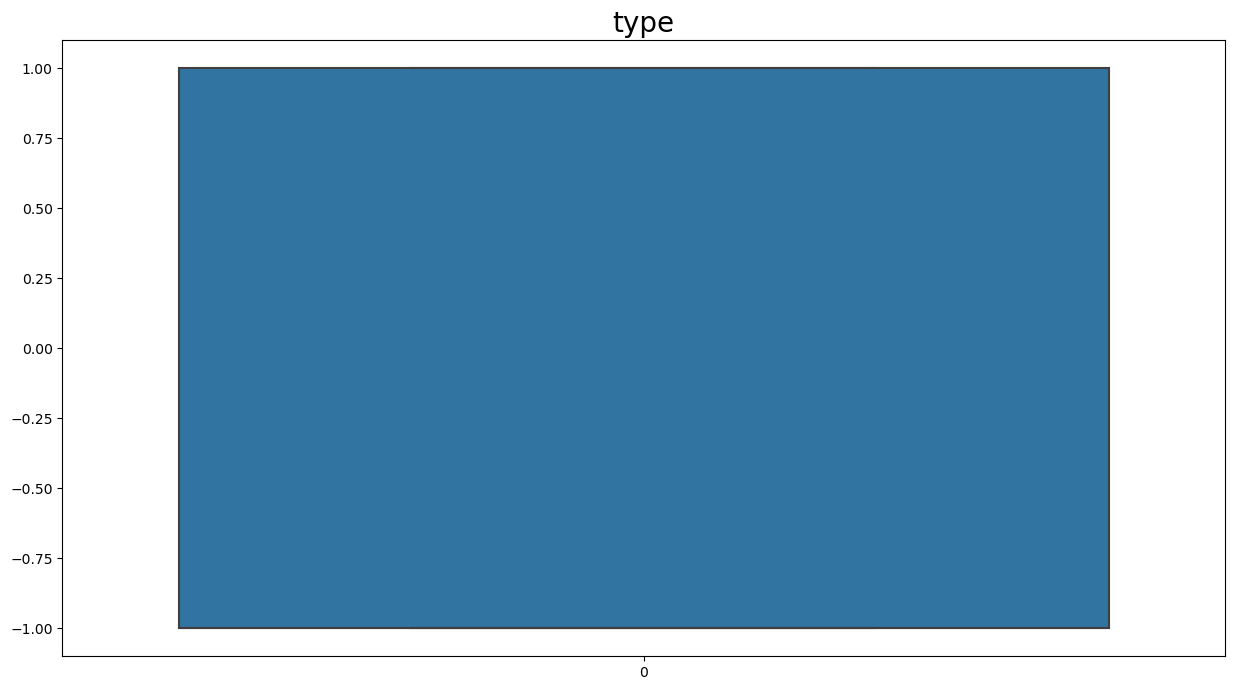

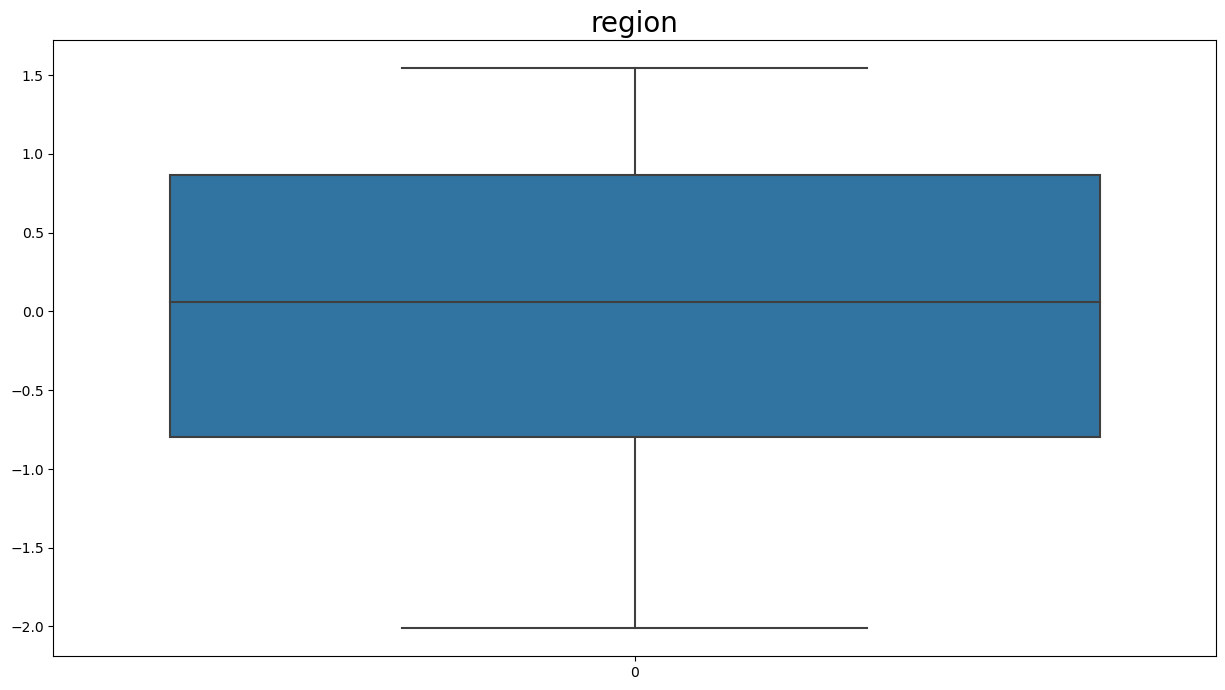

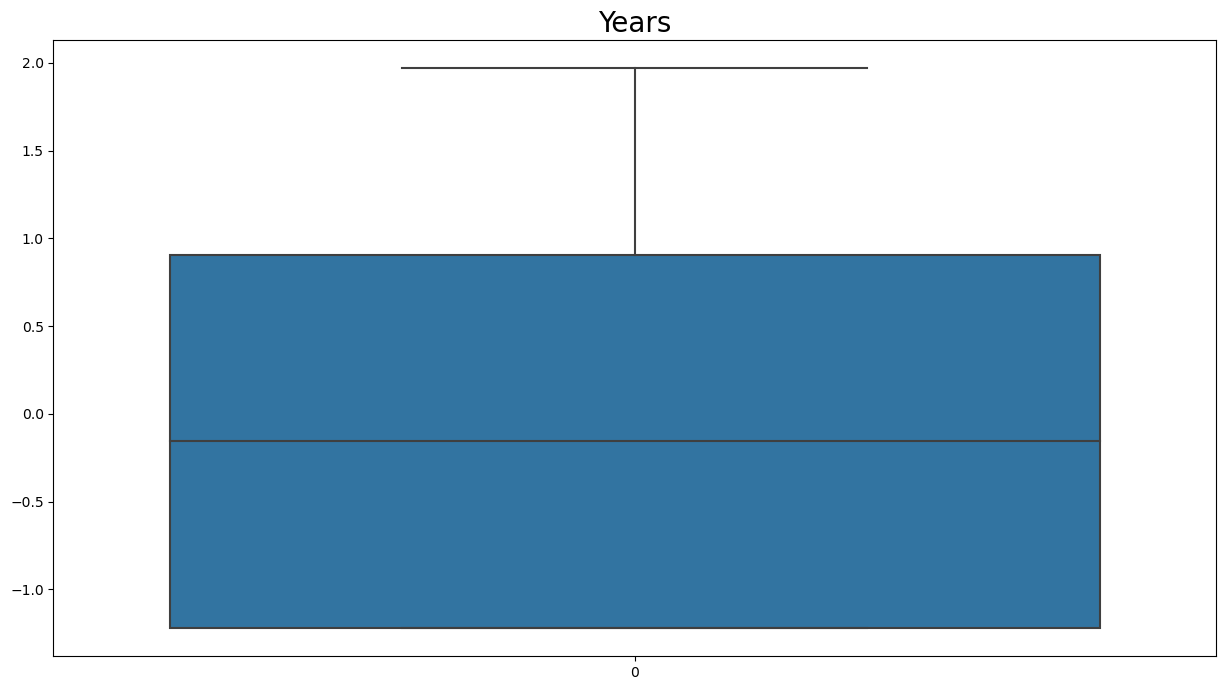

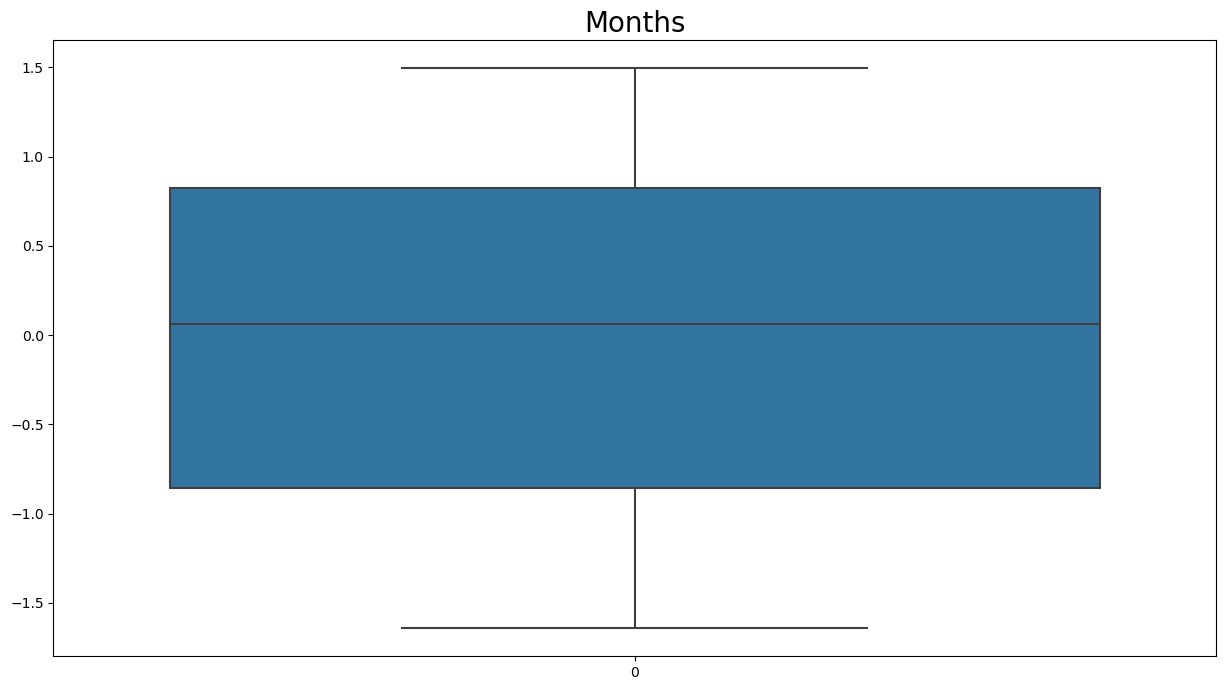

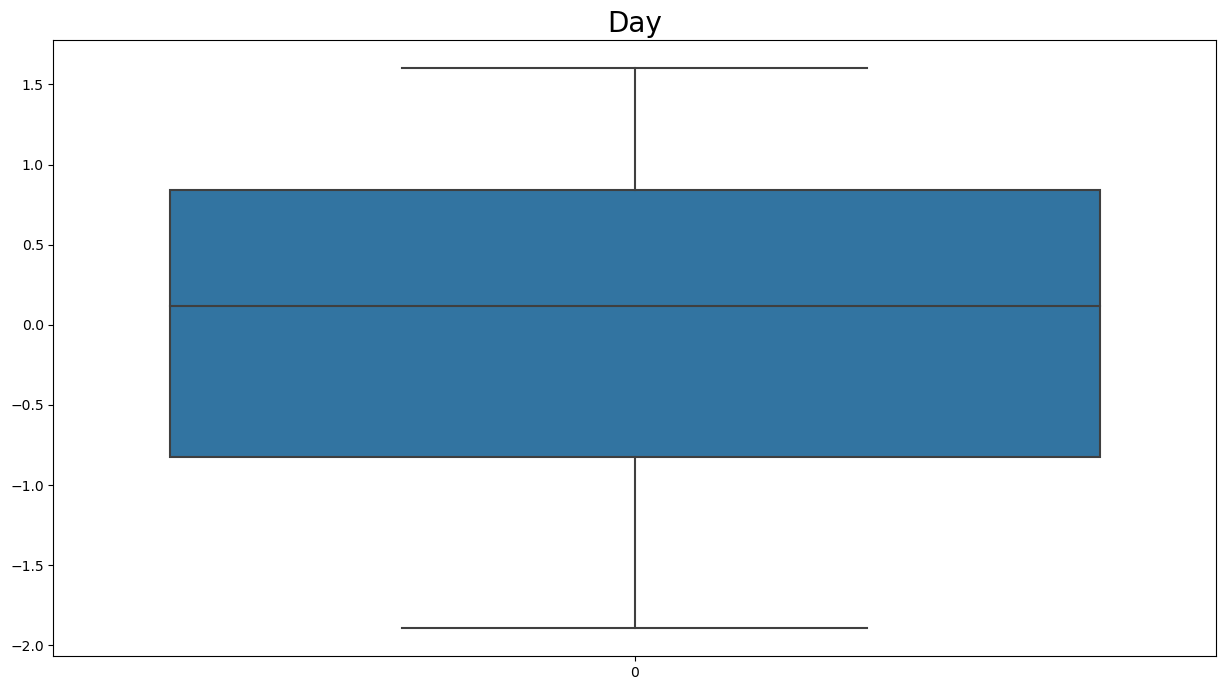

In [36]:
for i in x.columns:
    plt.figure(figsize = (15,8))
    sns.boxplot(x[i])
    plt.title(i, fontsize = 20)
    plt.show()

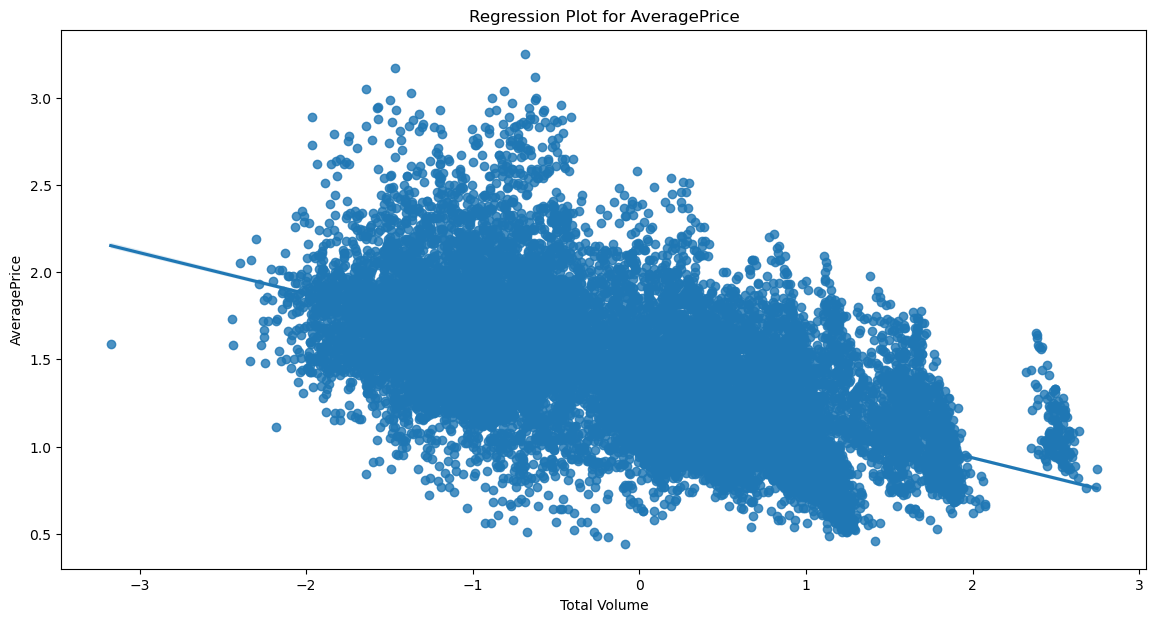

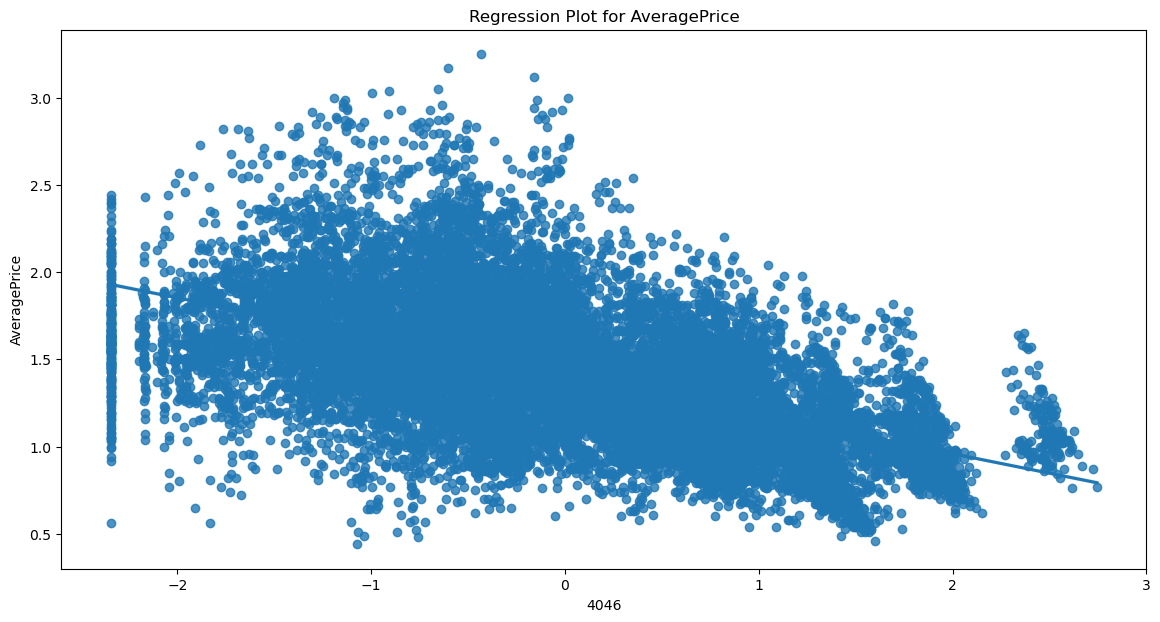

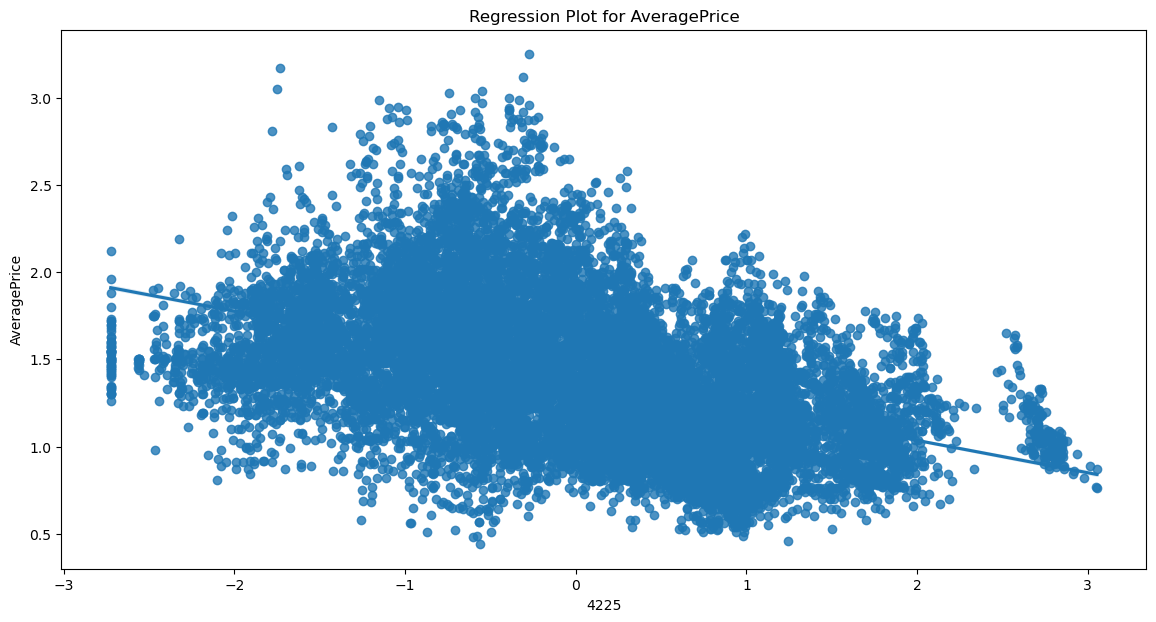

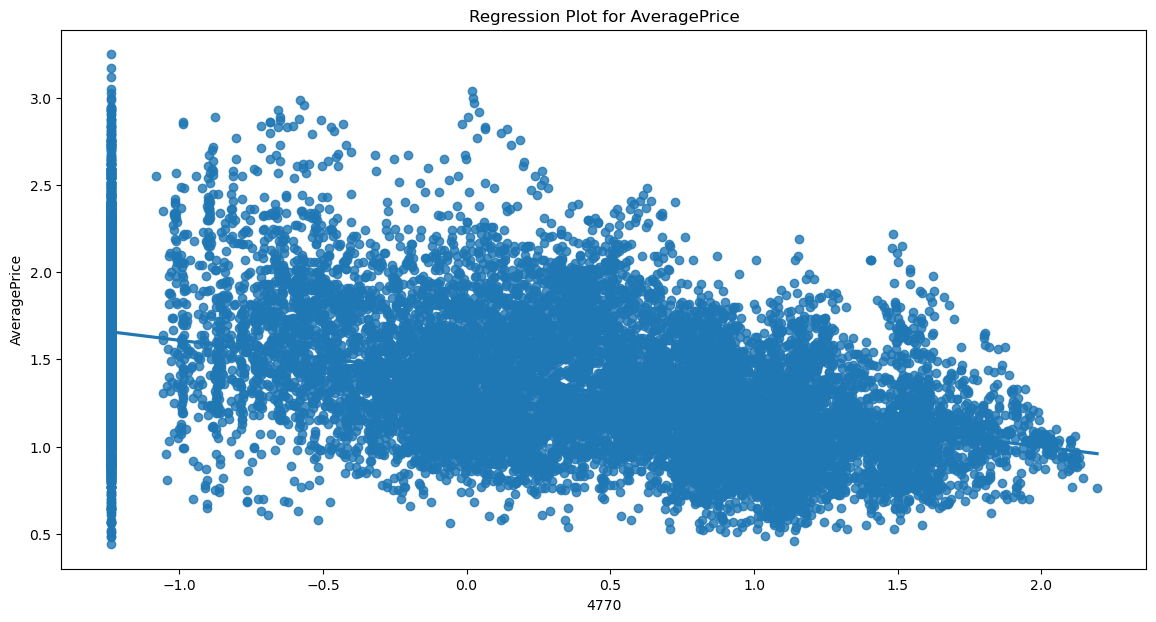

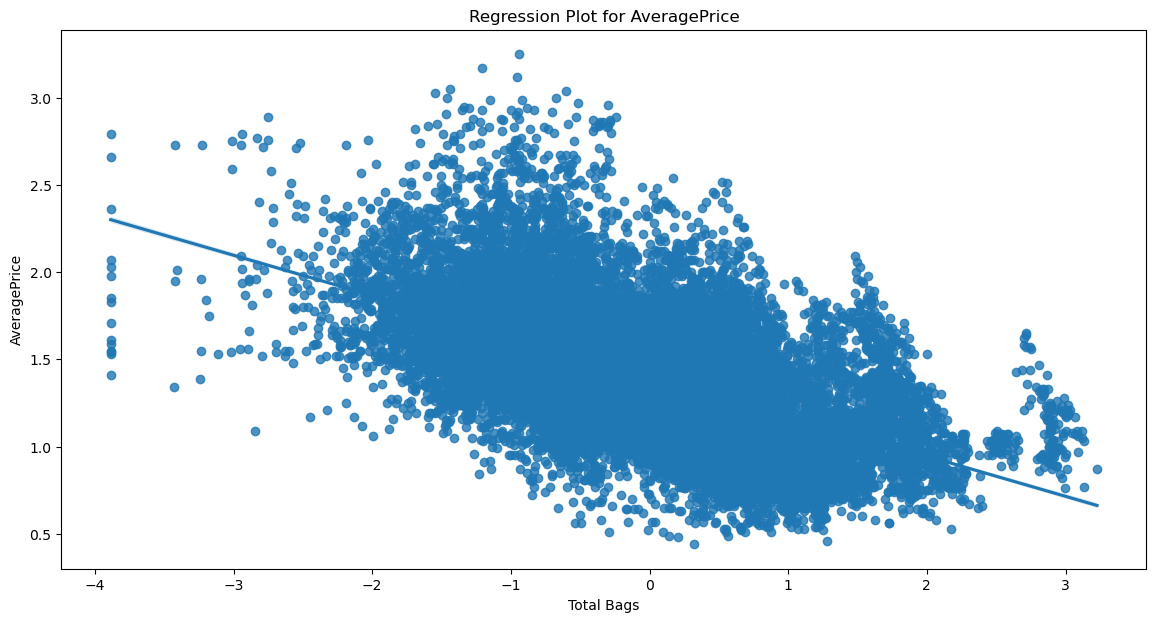

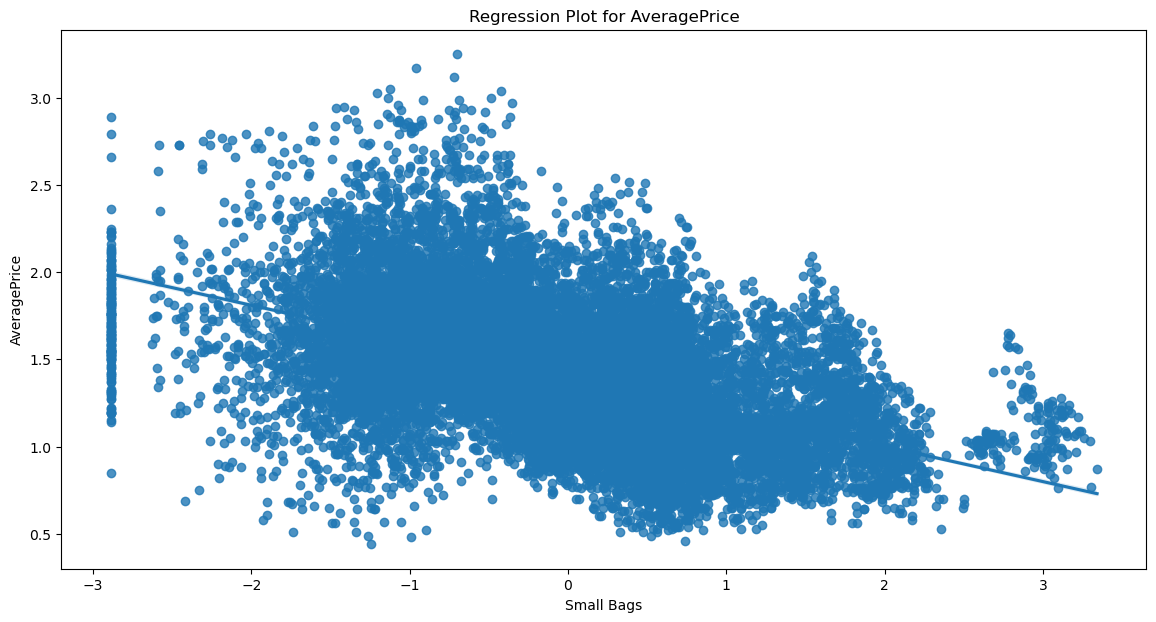

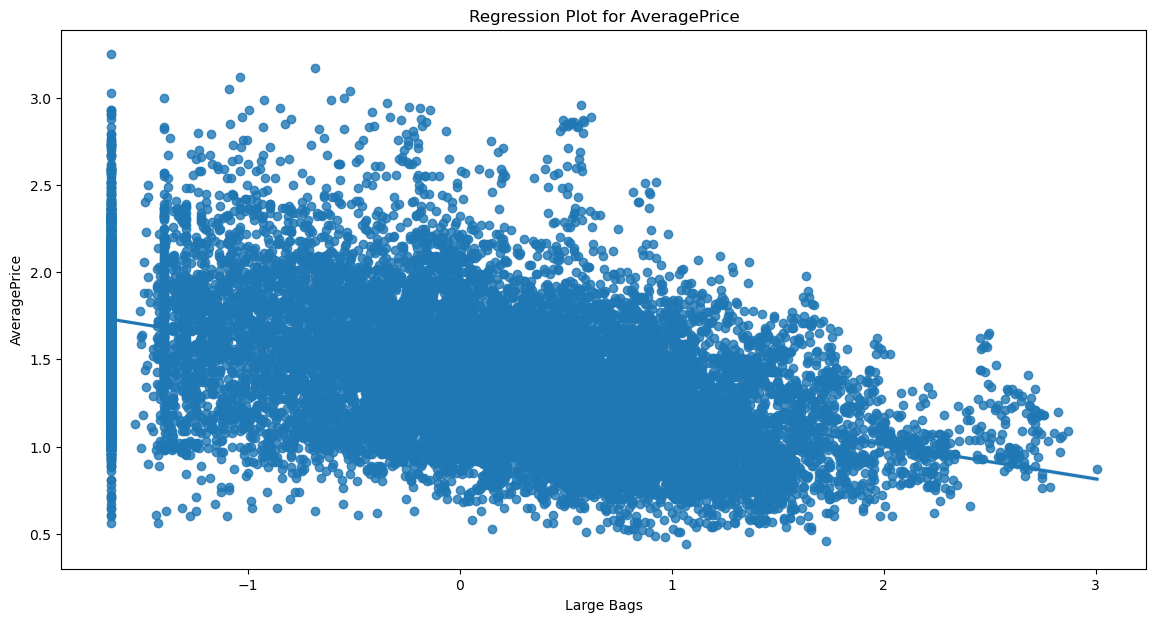

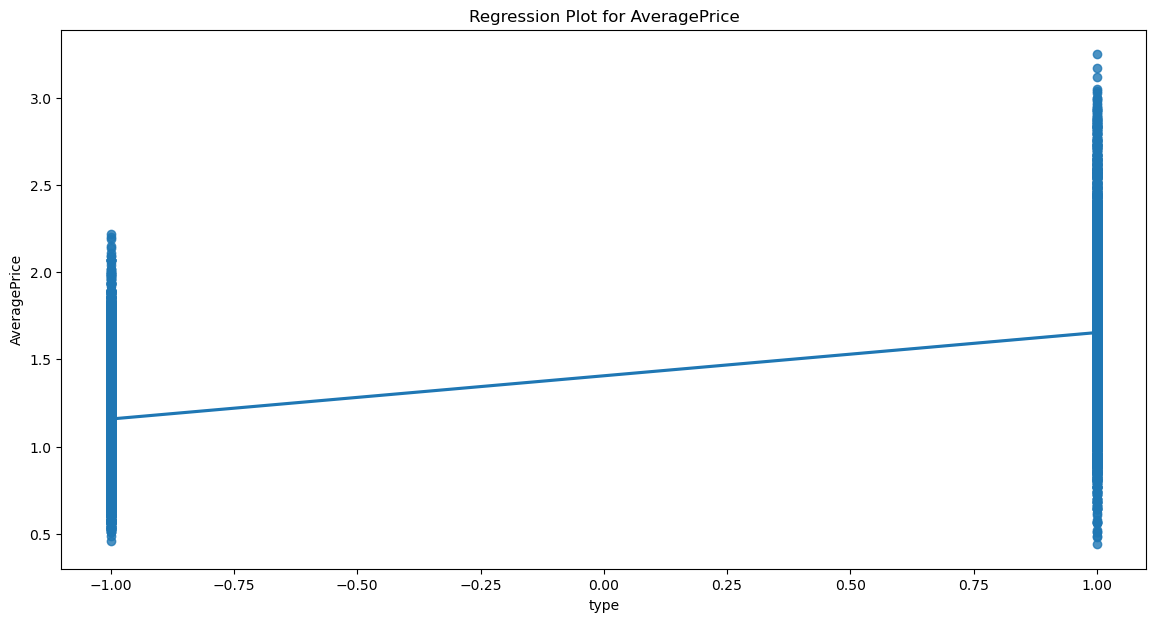

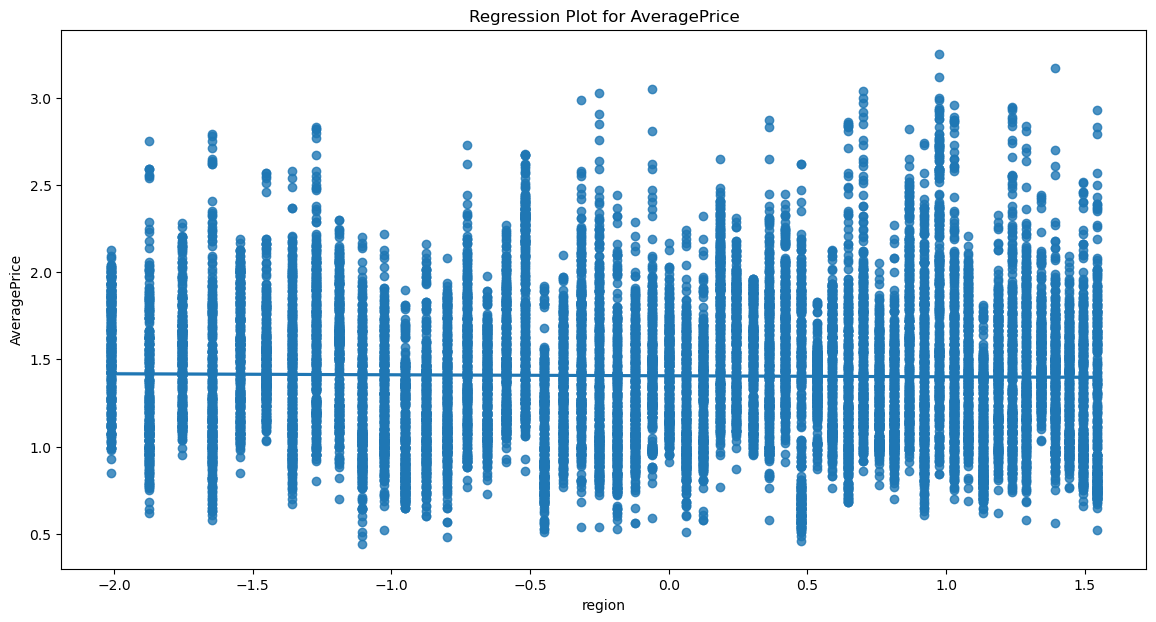

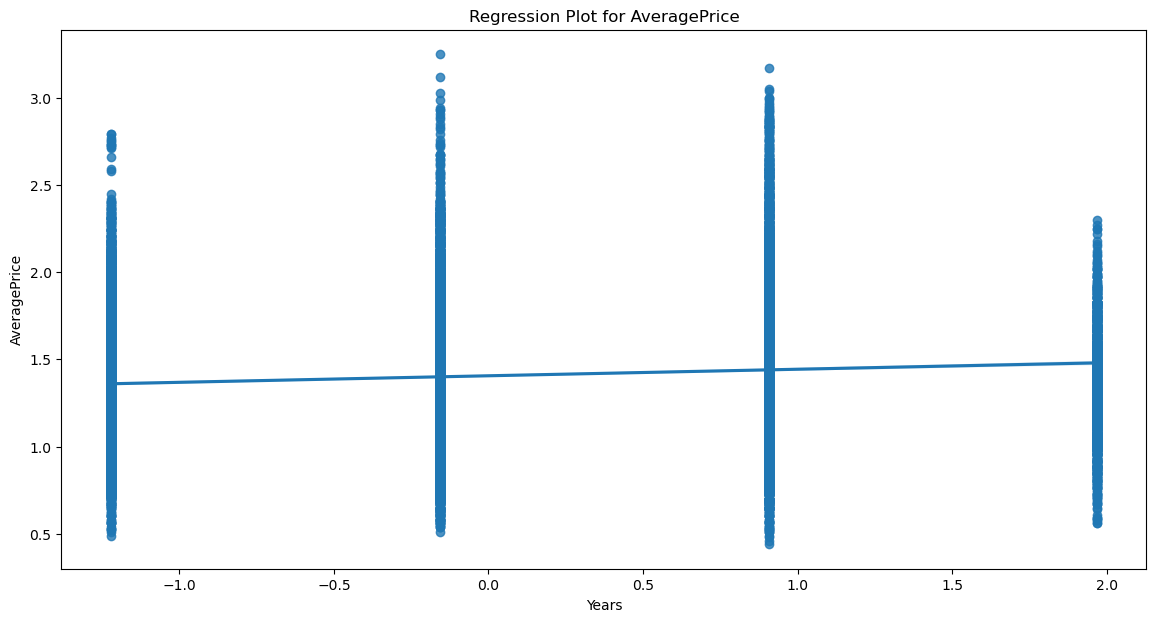

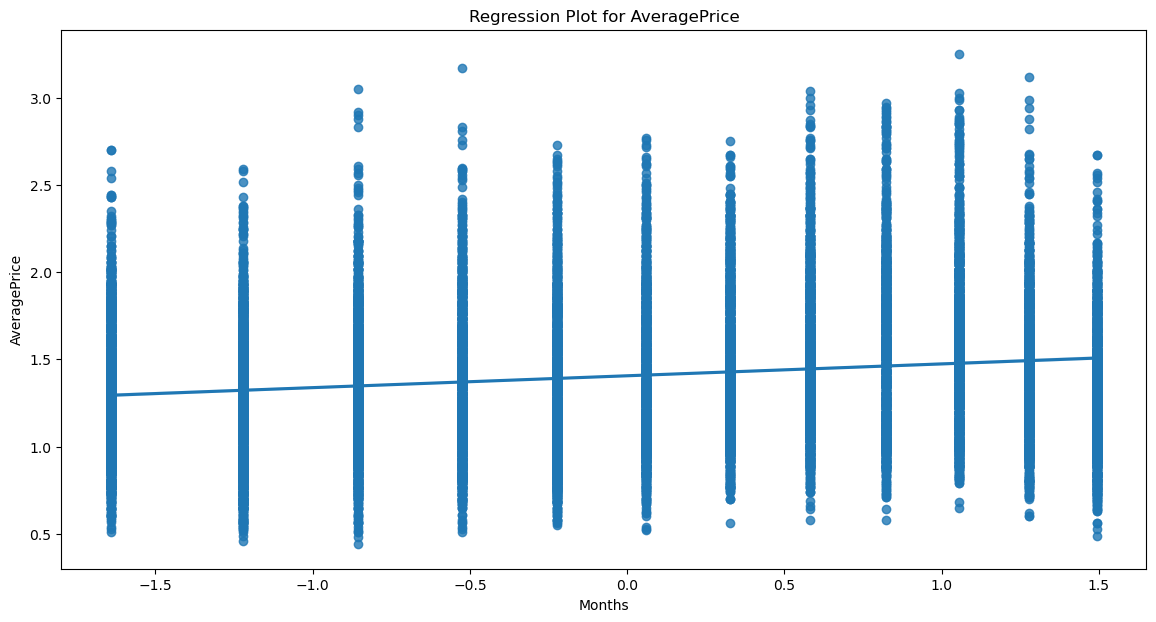

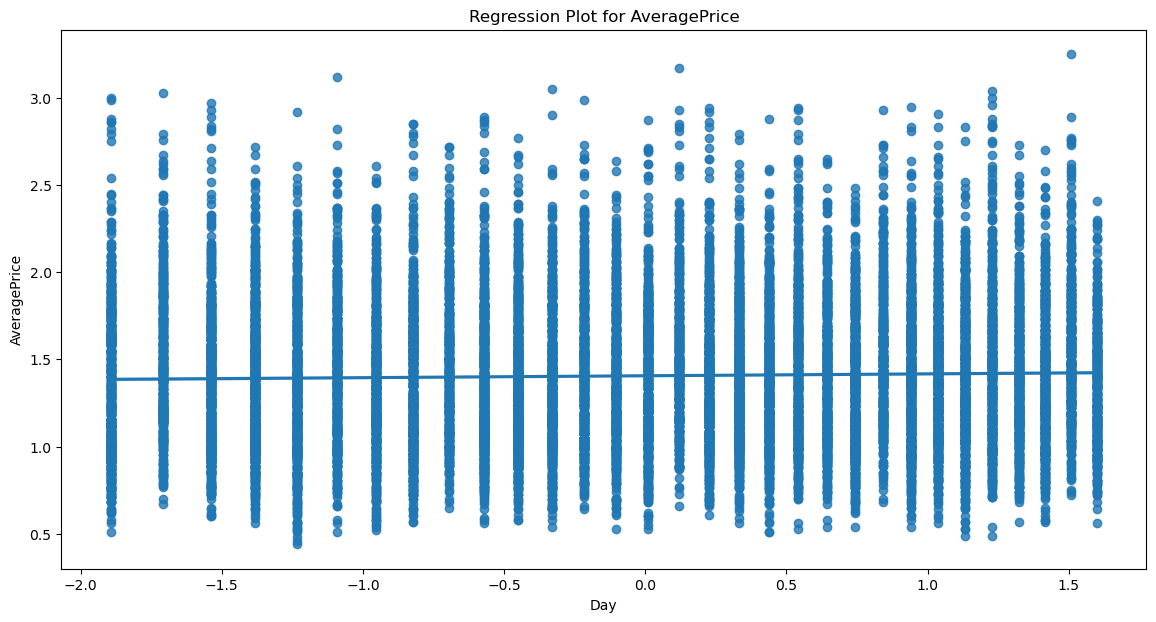

In [37]:
for i in x:
    plt.figure(figsize = (14,7))
    sns.regplot(x=x[i], y=y)
    plt.title('Regression Plot for AveragePrice')
    plt.xlabel(i, fontsize = 10)
    plt.ylabel('AveragePrice', fontsize = 10)
    plt.show()

We can see the skewness has been slightly reduced

lets Outliers with IQR method

In [38]:
# adding AveragePrice column back to Data Frame
x['AveragePrice'] = y

In [43]:
# setting the quantiles for the data set
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
iqr = q3 - q1

In [40]:
# renaming the column 4225 from integers to string as integer cannot be put in numpy methods
x['PLU4225'] = x['4225']
x = x.drop(columns = ['4225'])

In [41]:
# renaming the columns which have gap in their column name. numpy method can not take column name having gap
x['TotalBags'] = x['Total Bags']
x['SmallBags'] = x['Small Bags']
x['LargeBags'] = x['Large Bags']
x = x.drop(columns = ['Total Bags', 'Small Bags', 'Large Bags'])

In [44]:
# removing higher side outliers from PLU4225
index = np.where(x['PLU4225'] > (q3.PLU4225 + (1.5 * iqr.PLU4225)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770      type    region     Years  \
0          0     -0.086605 -0.658619 -0.247250 -0.999836 -2.011552 -1.221895   
1          1     -0.155746 -0.776870 -0.201041 -0.999836 -2.011552 -1.221895   
2          2      0.179327 -0.731947 -0.007072 -0.999836 -2.011552 -1.221895   
3          3      0.003876 -0.634200 -0.148322 -0.999836 -2.011552 -1.221895   
4          4     -0.187640 -0.685293 -0.137918 -0.999836 -2.011552 -1.221895   
...      ...           ...       ...       ...       ...       ...       ...   
18216  18244     -0.674587 -0.467366 -1.238310  1.000164  1.543838  1.968548   
18217  18245     -0.767550 -0.619883 -1.238310  1.000164  1.543838  1.968548   
18218  18246     -0.771505 -0.619831  0.401546  1.000164  1.543838  1.968548   
18219  18247     -0.698077 -0.550282  0.401246  1.000164  1.543838  1.968548   
18220  18248     -0.663809 -0.367908  0.122919  1.000164  1.543838  1.968548   

         Months       Day  AveragePrice   PLU4225  TotalBags  SmallBags  \
0      1.494347  1.229285          1.33  0.307313  -0.524004  -0.340627   
1      1.494347  0.541005          1.35  0.231647  -0.485890  -0.306425   
2      1.494347 -0.215570          0.93  0.579503  -0.552018  -0.366303   
3      1.494347 -1.091311          1.08  0.415100  -0.695449  -0.496853   
4      1.278438  1.416727          1.28  0.224806  -0.669157  -0.477201   
...         ...       ...           ...       ...        ...        ...   
18216 -1.220706 -1.382073          1.63 -0.919470  -0.334466  -0.178839   
18217 -1.642047  1.323455          1.71 -0.665372  -0.496897  -0.325977   
18218 -1.642047  0.642842          1.87 -0.772496  -0.490952  -0.308728   
18219 -1.642047 -0.101959          1.93 -0.710543  -0.424252  -0.248932   
18220 -1.642047 -0.954854          1.62 -0.785173  -0.384961  -0.212590   

       LargeBags  
0      -0.773351  
1      -0.763435  
2      -0.750820  
3      -0.691865  
4      -0.600975  
...          ...  
18216  -0.410859  
18217  -0.481465  
18218  -0.943486  
18219  -0.908510  
18220  -1.042250  

[18221 rows x 14 columns]

In [45]:
# removing higher side outliers from TotalBags
index = np.where(x['TotalBags'] > (q3.TotalBags + (1.5 * iqr.TotalBags)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770      type    region     Years  \
0          0     -0.086605 -0.658619 -0.247250 -0.999836 -2.011552 -1.221895   
1          1     -0.155746 -0.776870 -0.201041 -0.999836 -2.011552 -1.221895   
2          2      0.179327 -0.731947 -0.007072 -0.999836 -2.011552 -1.221895   
3          3      0.003876 -0.634200 -0.148322 -0.999836 -2.011552 -1.221895   
4          4     -0.187640 -0.685293 -0.137918 -0.999836 -2.011552 -1.221895   
...      ...           ...       ...       ...       ...       ...       ...   
18116  18244     -0.674587 -0.467366 -1.238310  1.000164  1.543838  1.968548   
18117  18245     -0.767550 -0.619883 -1.238310  1.000164  1.543838  1.968548   
18118  18246     -0.771505 -0.619831  0.401546  1.000164  1.543838  1.968548   
18119  18247     -0.698077 -0.550282  0.401246  1.000164  1.543838  1.968548   
18120  18248     -0.663809 -0.367908  0.122919  1.000164  1.543838  1.968548   

         Months       Day  AveragePrice   PLU4225  TotalBags  SmallBags  \
0      1.494347  1.229285          1.33  0.307313  -0.524004  -0.340627   
1      1.494347  0.541005          1.35  0.231647  -0.485890  -0.306425   
2      1.494347 -0.215570          0.93  0.579503  -0.552018  -0.366303   
3      1.494347 -1.091311          1.08  0.415100  -0.695449  -0.496853   
4      1.278438  1.416727          1.28  0.224806  -0.669157  -0.477201   
...         ...       ...           ...       ...        ...        ...   
18116 -1.220706 -1.382073          1.63 -0.919470  -0.334466  -0.178839   
18117 -1.642047  1.323455          1.71 -0.665372  -0.496897  -0.325977   
18118 -1.642047  0.642842          1.87 -0.772496  -0.490952  -0.308728   
18119 -1.642047 -0.101959          1.93 -0.710543  -0.424252  -0.248932   
18120 -1.642047 -0.954854          1.62 -0.785173  -0.384961  -0.212590   

       LargeBags  
0      -0.773351  
1      -0.763435  
2      -0.750820  
3      -0.691865  
4      -0.600975  
...          ...  
18116  -0.410859  
18117  -0.481465  
18118  -0.943486  
18119  -0.908510  
18120  -1.042250  

[18121 rows x 14 columns]

In [46]:
# removing lower side outliers from PLU4225
index = np.where(x['TotalBags'] < (q1.TotalBags - (1.5 * iqr.TotalBags)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770      type    region     Years  \
0          0     -0.086605 -0.658619 -0.247250 -0.999836 -2.011552 -1.221895   
1          1     -0.155746 -0.776870 -0.201041 -0.999836 -2.011552 -1.221895   
2          2      0.179327 -0.731947 -0.007072 -0.999836 -2.011552 -1.221895   
3          3      0.003876 -0.634200 -0.148322 -0.999836 -2.011552 -1.221895   
4          4     -0.187640 -0.685293 -0.137918 -0.999836 -2.011552 -1.221895   
...      ...           ...       ...       ...       ...       ...       ...   
18070  18244     -0.674587 -0.467366 -1.238310  1.000164  1.543838  1.968548   
18071  18245     -0.767550 -0.619883 -1.238310  1.000164  1.543838  1.968548   
18072  18246     -0.771505 -0.619831  0.401546  1.000164  1.543838  1.968548   
18073  18247     -0.698077 -0.550282  0.401246  1.000164  1.543838  1.968548   
18074  18248     -0.663809 -0.367908  0.122919  1.000164  1.543838  1.968548   

         Months       Day  AveragePrice   PLU4225  TotalBags  SmallBags  \
0      1.494347  1.229285          1.33  0.307313  -0.524004  -0.340627   
1      1.494347  0.541005          1.35  0.231647  -0.485890  -0.306425   
2      1.494347 -0.215570          0.93  0.579503  -0.552018  -0.366303   
3      1.494347 -1.091311          1.08  0.415100  -0.695449  -0.496853   
4      1.278438  1.416727          1.28  0.224806  -0.669157  -0.477201   
...         ...       ...           ...       ...        ...        ...   
18070 -1.220706 -1.382073          1.63 -0.919470  -0.334466  -0.178839   
18071 -1.642047  1.323455          1.71 -0.665372  -0.496897  -0.325977   
18072 -1.642047  0.642842          1.87 -0.772496  -0.490952  -0.308728   
18073 -1.642047 -0.101959          1.93 -0.710543  -0.424252  -0.248932   
18074 -1.642047 -0.954854          1.62 -0.785173  -0.384961  -0.212590   

       LargeBags  
0      -0.773351  
1      -0.763435  
2      -0.750820  
3      -0.691865  
4      -0.600975  
...          ...  
18070  -0.410859  
18071  -0.481465  
18072  -0.943486  
18073  -0.908510  
18074  -1.042250  

[18075 rows x 14 columns]

In [47]:
# removing higher side outliers from SmallBags
index = np.where(x['SmallBags'] > (q3.SmallBags + (1.5 * iqr.SmallBags)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770      type    region     Years  \
0          0     -0.086605 -0.658619 -0.247250 -0.999836 -2.011552 -1.221895   
1          1     -0.155746 -0.776870 -0.201041 -0.999836 -2.011552 -1.221895   
2          2      0.179327 -0.731947 -0.007072 -0.999836 -2.011552 -1.221895   
3          3      0.003876 -0.634200 -0.148322 -0.999836 -2.011552 -1.221895   
4          4     -0.187640 -0.685293 -0.137918 -0.999836 -2.011552 -1.221895   
...      ...           ...       ...       ...       ...       ...       ...   
18038  18244     -0.674587 -0.467366 -1.238310  1.000164  1.543838  1.968548   
18039  18245     -0.767550 -0.619883 -1.238310  1.000164  1.543838  1.968548   
18040  18246     -0.771505 -0.619831  0.401546  1.000164  1.543838  1.968548   
18041  18247     -0.698077 -0.550282  0.401246  1.000164  1.543838  1.968548   
18042  18248     -0.663809 -0.367908  0.122919  1.000164  1.543838  1.968548   

         Months       Day  AveragePrice   PLU4225  TotalBags  SmallBags  \
0      1.494347  1.229285          1.33  0.307313  -0.524004  -0.340627   
1      1.494347  0.541005          1.35  0.231647  -0.485890  -0.306425   
2      1.494347 -0.215570          0.93  0.579503  -0.552018  -0.366303   
3      1.494347 -1.091311          1.08  0.415100  -0.695449  -0.496853   
4      1.278438  1.416727          1.28  0.224806  -0.669157  -0.477201   
...         ...       ...           ...       ...        ...        ...   
18038 -1.220706 -1.382073          1.63 -0.919470  -0.334466  -0.178839   
18039 -1.642047  1.323455          1.71 -0.665372  -0.496897  -0.325977   
18040 -1.642047  0.642842          1.87 -0.772496  -0.490952  -0.308728   
18041 -1.642047 -0.101959          1.93 -0.710543  -0.424252  -0.248932   
18042 -1.642047 -0.954854          1.62 -0.785173  -0.384961  -0.212590   

       LargeBags  
0      -0.773351  
1      -0.763435  
2      -0.750820  
3      -0.691865  
4      -0.600975  
...          ...  
18038  -0.410859  
18039  -0.481465  
18040  -0.943486  
18041  -0.908510  
18042  -1.042250  

[18043 rows x 14 columns]

In [48]:
# removing lower side outliers from smallBags
index = np.where(x['SmallBags'] < (q1.SmallBags - (1.5 * iqr.SmallBags)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770      type    region     Years  \
0          0     -0.086605 -0.658619 -0.247250 -0.999836 -2.011552 -1.221895   
1          1     -0.155746 -0.776870 -0.201041 -0.999836 -2.011552 -1.221895   
2          2      0.179327 -0.731947 -0.007072 -0.999836 -2.011552 -1.221895   
3          3      0.003876 -0.634200 -0.148322 -0.999836 -2.011552 -1.221895   
4          4     -0.187640 -0.685293 -0.137918 -0.999836 -2.011552 -1.221895   
...      ...           ...       ...       ...       ...       ...       ...   
17898  18244     -0.674587 -0.467366 -1.238310  1.000164  1.543838  1.968548   
17899  18245     -0.767550 -0.619883 -1.238310  1.000164  1.543838  1.968548   
17900  18246     -0.771505 -0.619831  0.401546  1.000164  1.543838  1.968548   
17901  18247     -0.698077 -0.550282  0.401246  1.000164  1.543838  1.968548   
17902  18248     -0.663809 -0.367908  0.122919  1.000164  1.543838  1.968548   

         Months       Day  AveragePrice   PLU4225  TotalBags  SmallBags  \
0      1.494347  1.229285          1.33  0.307313  -0.524004  -0.340627   
1      1.494347  0.541005          1.35  0.231647  -0.485890  -0.306425   
2      1.494347 -0.215570          0.93  0.579503  -0.552018  -0.366303   
3      1.494347 -1.091311          1.08  0.415100  -0.695449  -0.496853   
4      1.278438  1.416727          1.28  0.224806  -0.669157  -0.477201   
...         ...       ...           ...       ...        ...        ...   
17898 -1.220706 -1.382073          1.63 -0.919470  -0.334466  -0.178839   
17899 -1.642047  1.323455          1.71 -0.665372  -0.496897  -0.325977   
17900 -1.642047  0.642842          1.87 -0.772496  -0.490952  -0.308728   
17901 -1.642047 -0.101959          1.93 -0.710543  -0.424252  -0.248932   
17902 -1.642047 -0.954854          1.62 -0.785173  -0.384961  -0.212590   

       LargeBags  
0      -0.773351  
1      -0.763435  
2      -0.750820  
3      -0.691865  
4      -0.600975  
...          ...  
17898  -0.410859  
17899  -0.481465  
17900  -0.943486  
17901  -0.908510  
17902  -1.042250  

[17903 rows x 14 columns]

In [49]:
# removing higher side outliers from LargeBags
index = np.where(x['LargeBags'] > (q3.LargeBags + (1.5 * iqr.LargeBags)))
x = x.drop(x.index[index])
x.reset_index()

index  Total Volume      4046      4770      type    region     Years  \
0          0     -0.086605 -0.658619 -0.247250 -0.999836 -2.011552 -1.221895   
1          1     -0.155746 -0.776870 -0.201041 -0.999836 -2.011552 -1.221895   
2          2      0.179327 -0.731947 -0.007072 -0.999836 -2.011552 -1.221895   
3          3      0.003876 -0.634200 -0.148322 -0.999836 -2.011552 -1.221895   
4          4     -0.187640 -0.685293 -0.137918 -0.999836 -2.011552 -1.221895   
...      ...           ...       ...       ...       ...       ...       ...   
17898  18244     -0.674587 -0.467366 -1.238310  1.000164  1.543838  1.968548   
17899  18245     -0.767550 -0.619883 -1.238310  1.000164  1.543838  1.968548   
17900  18246     -0.771505 -0.619831  0.401546  1.000164  1.543838  1.968548   
17901  18247     -0.698077 -0.550282  0.401246  1.000164  1.543838  1.968548   
17902  18248     -0.663809 -0.367908  0.122919  1.000164  1.543838  1.968548   

         Months       Day  AveragePrice   PLU4225  TotalBags  SmallBags  \
0      1.494347  1.229285          1.33  0.307313  -0.524004  -0.340627   
1      1.494347  0.541005          1.35  0.231647  -0.485890  -0.306425   
2      1.494347 -0.215570          0.93  0.579503  -0.552018  -0.366303   
3      1.494347 -1.091311          1.08  0.415100  -0.695449  -0.496853   
4      1.278438  1.416727          1.28  0.224806  -0.669157  -0.477201   
...         ...       ...           ...       ...        ...        ...   
17898 -1.220706 -1.382073          1.63 -0.919470  -0.334466  -0.178839   
17899 -1.642047  1.323455          1.71 -0.665372  -0.496897  -0.325977   
17900 -1.642047  0.642842          1.87 -0.772496  -0.490952  -0.308728   
17901 -1.642047 -0.101959          1.93 -0.710543  -0.424252  -0.248932   
17902 -1.642047 -0.954854          1.62 -0.785173  -0.384961  -0.212590   

       LargeBags  
0      -0.773351  
1      -0.763435  
2      -0.750820  
3      -0.691865  
4      -0.600975  
...          ...  
17898  -0.410859  
17899  -0.481465  
17900  -0.943486  
17901  -0.908510  
17902  -1.042250  

[17903 rows x 14 columns]

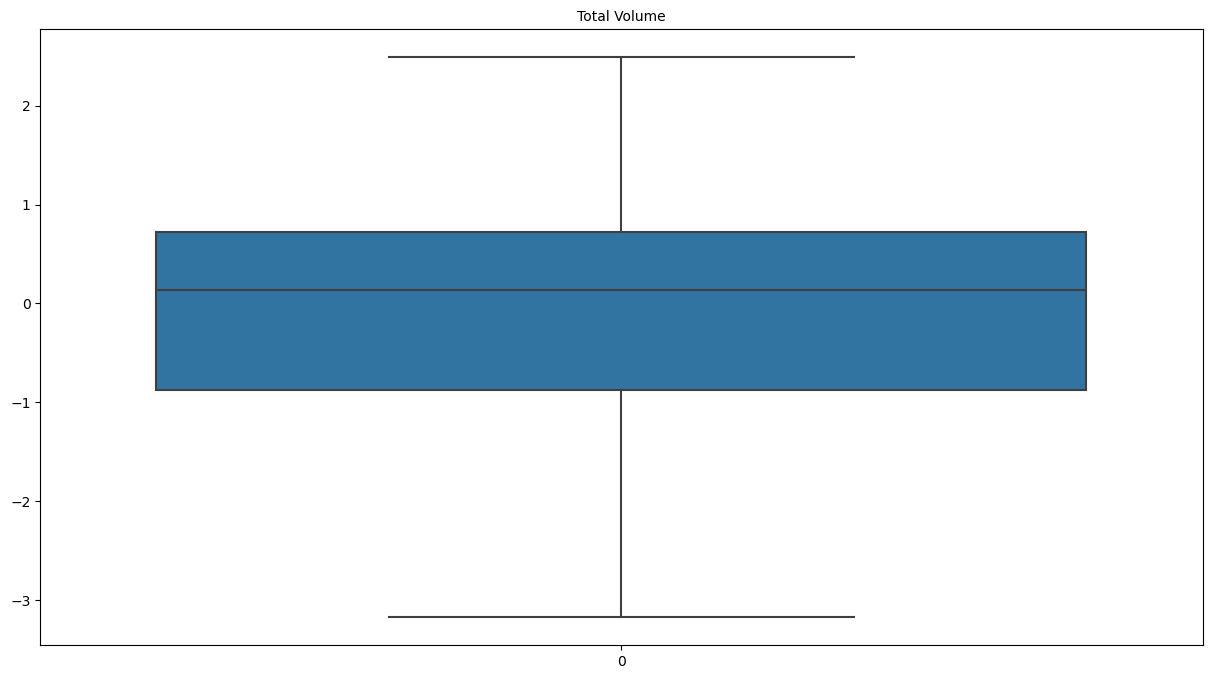

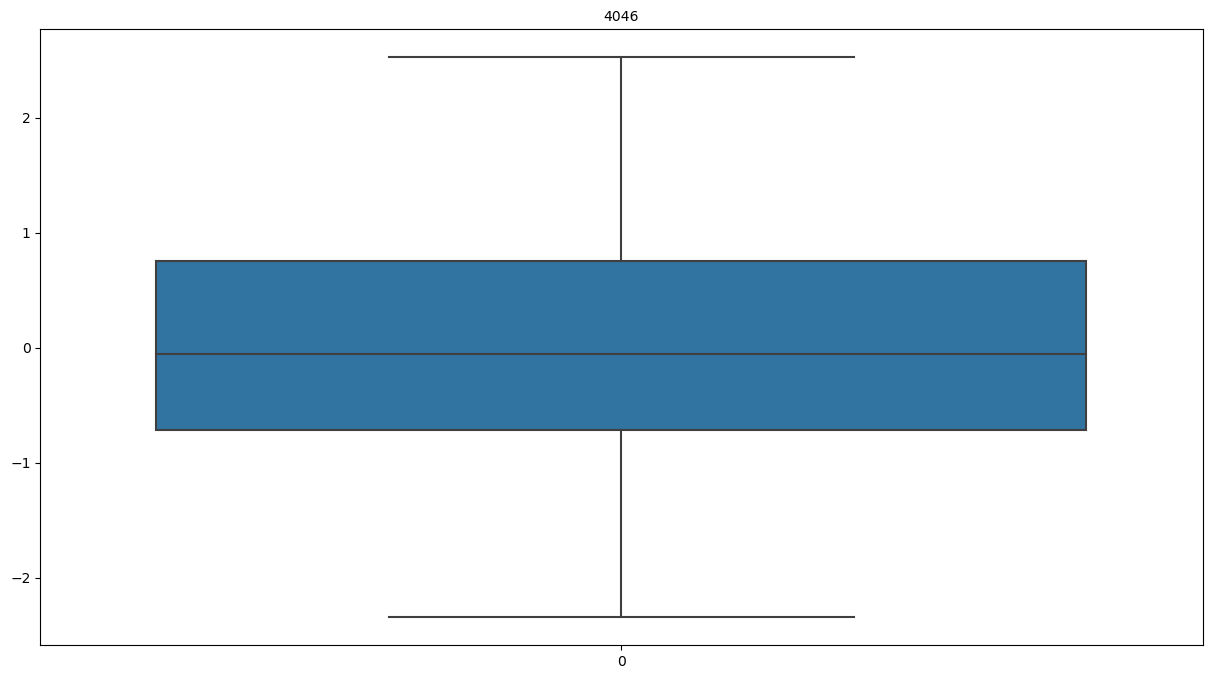

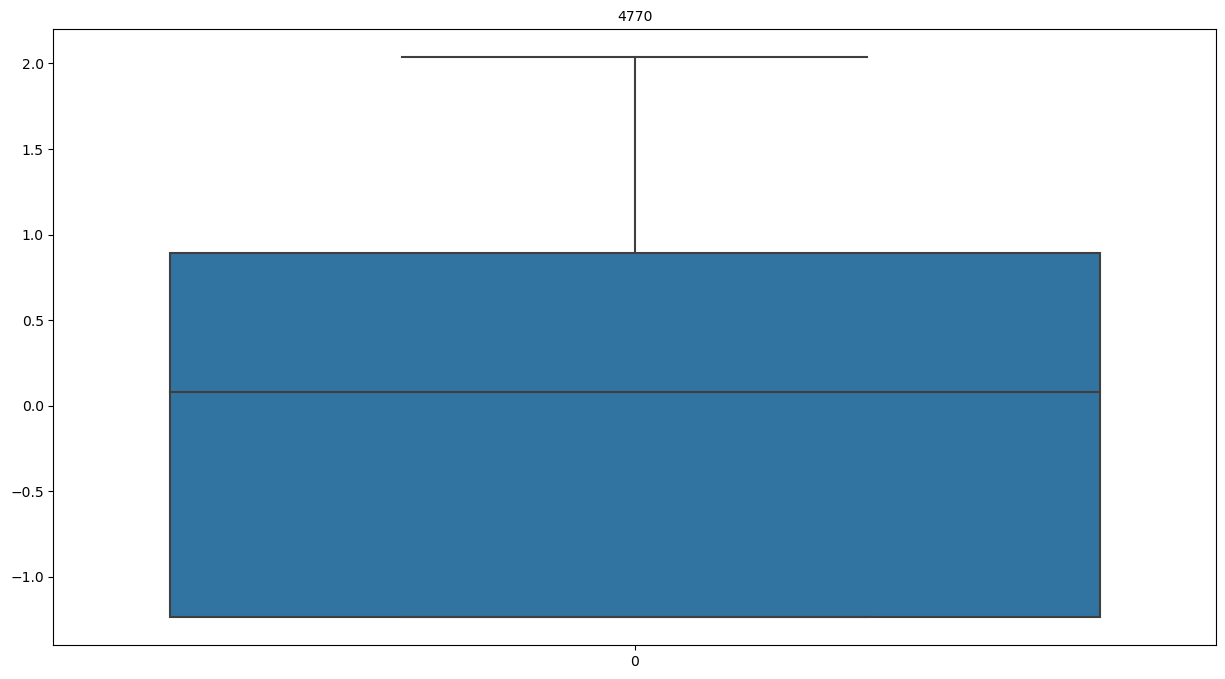

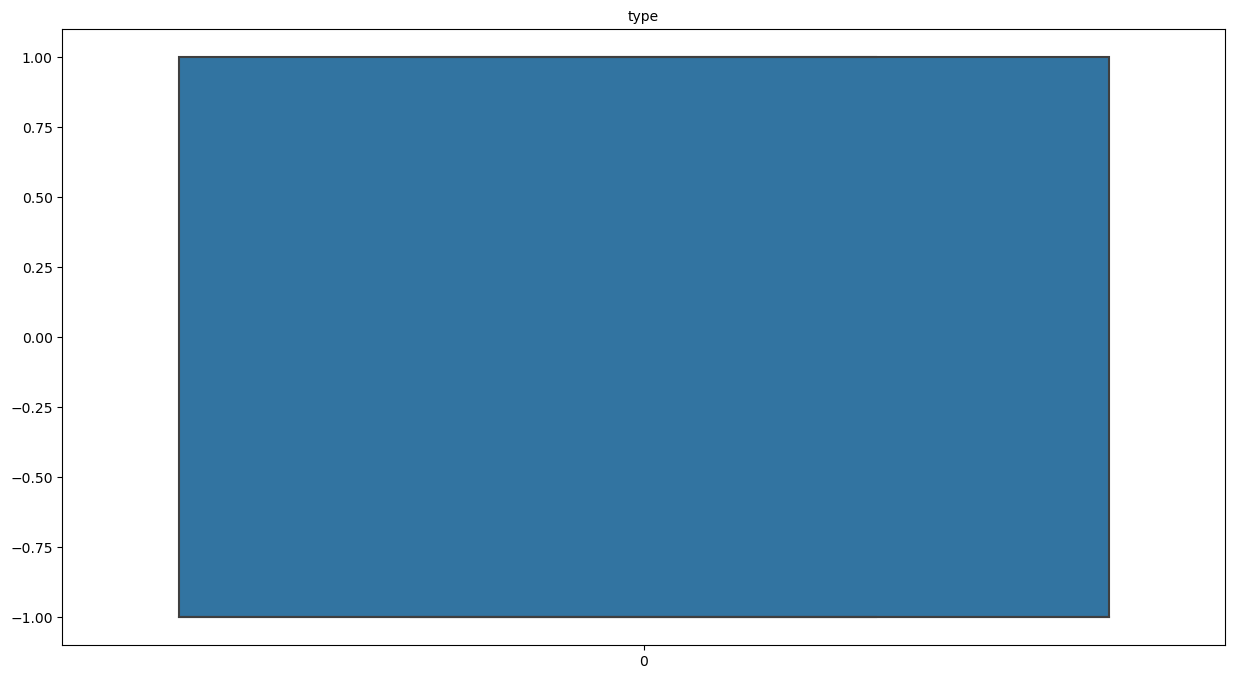

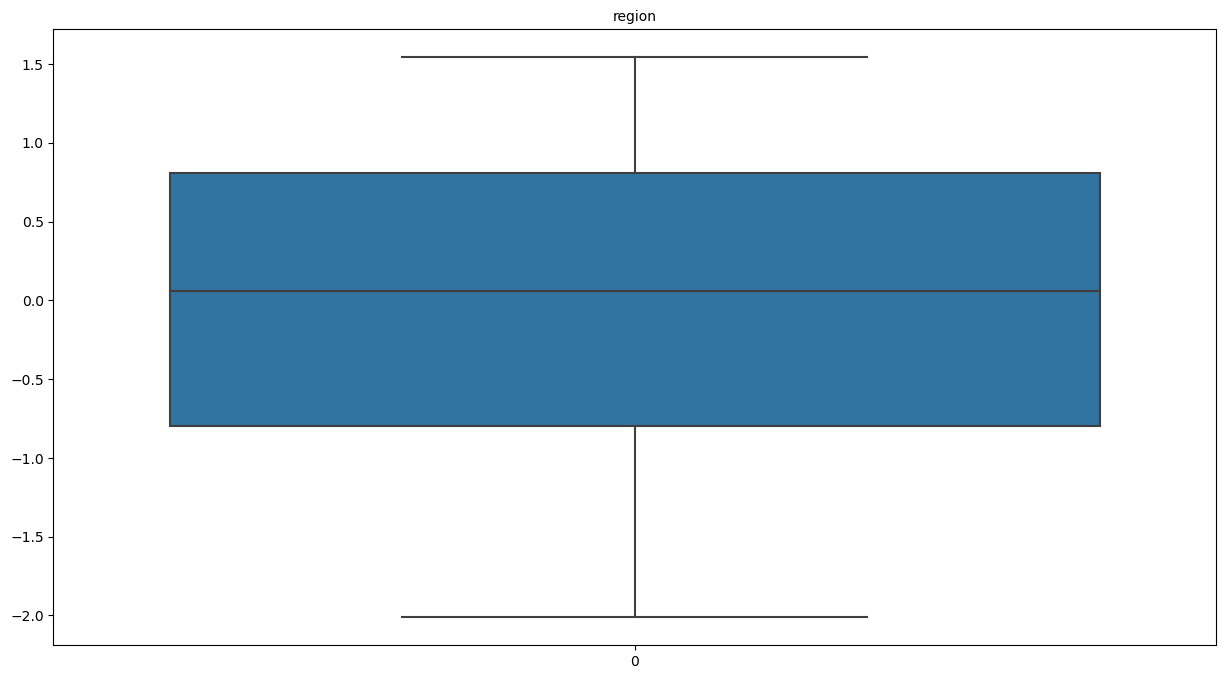

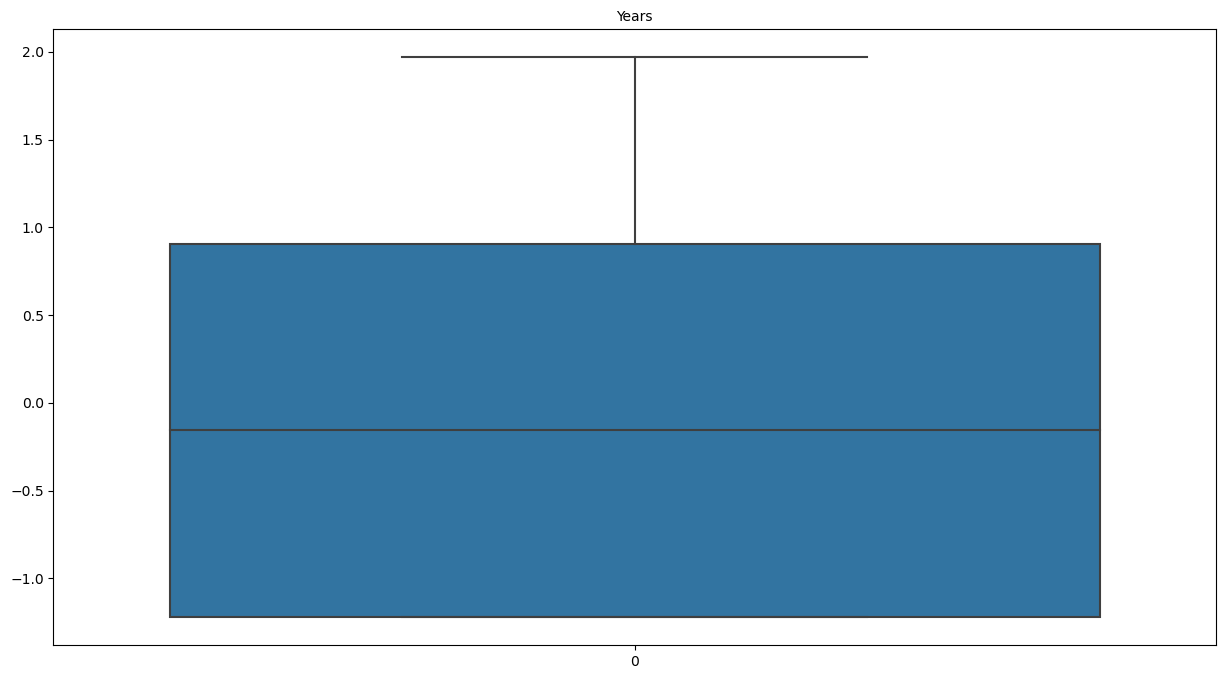

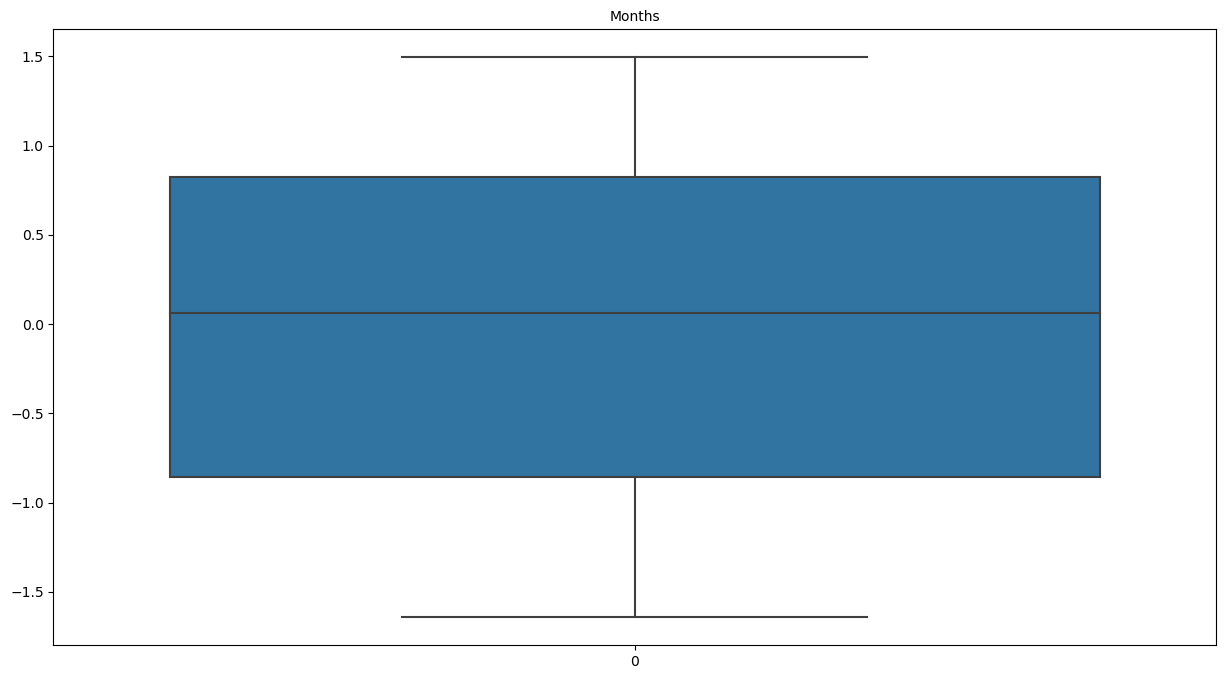

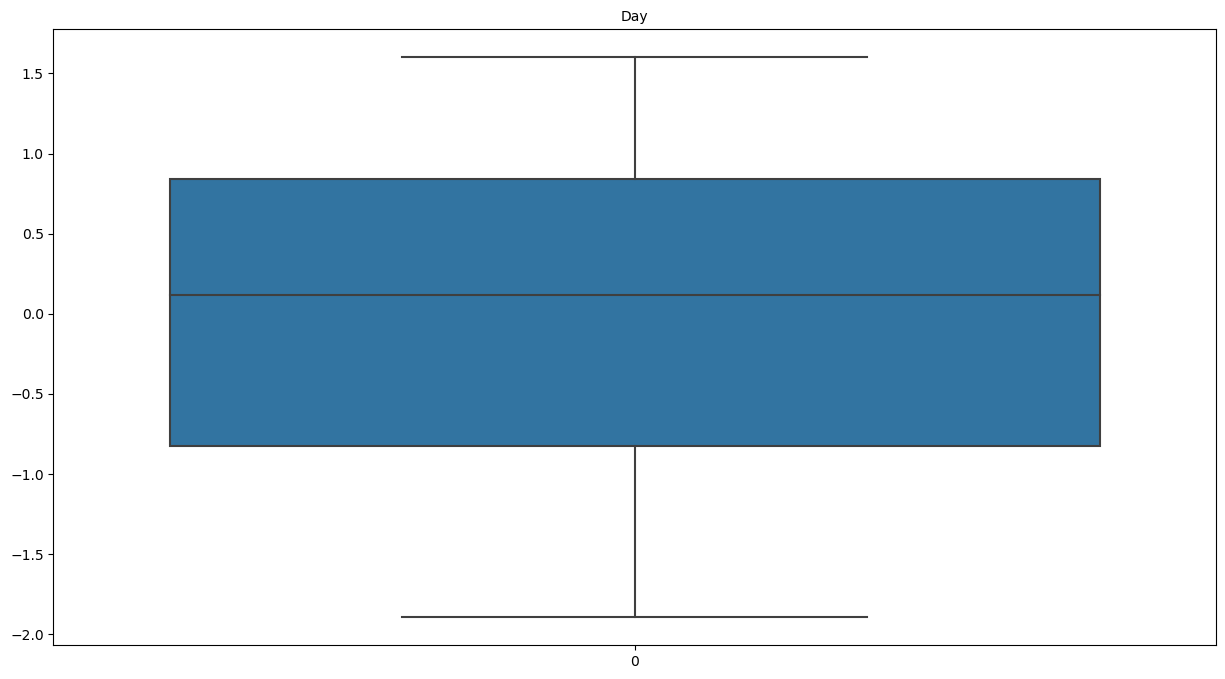

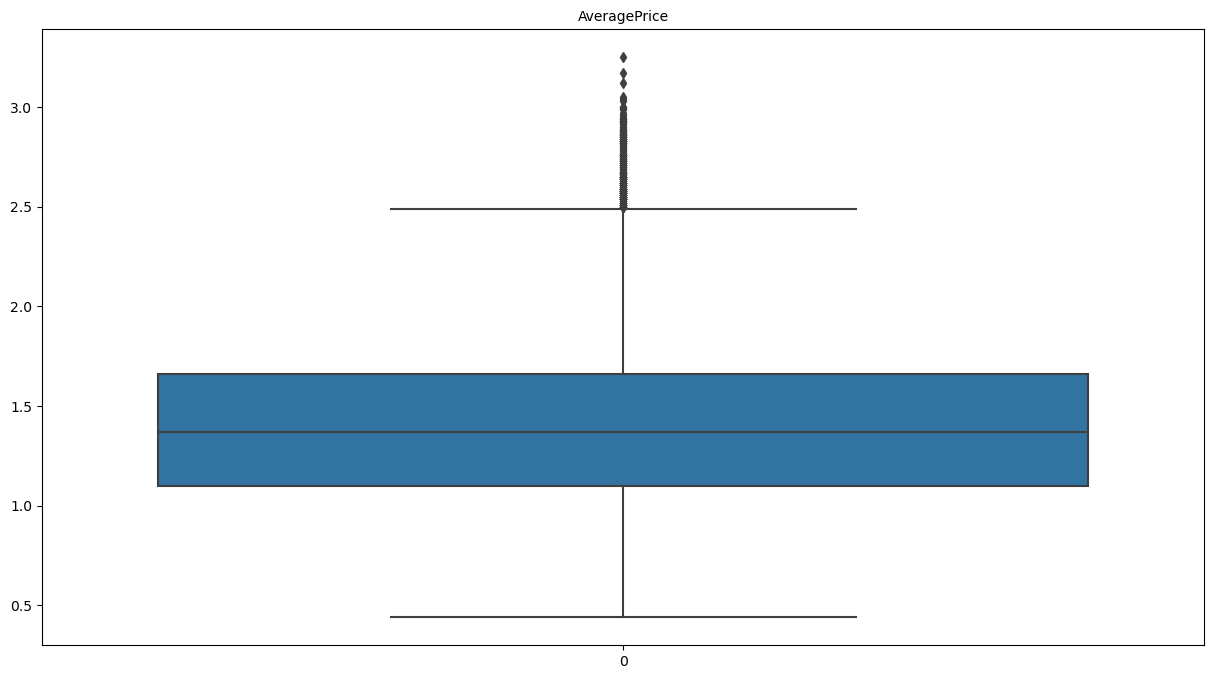

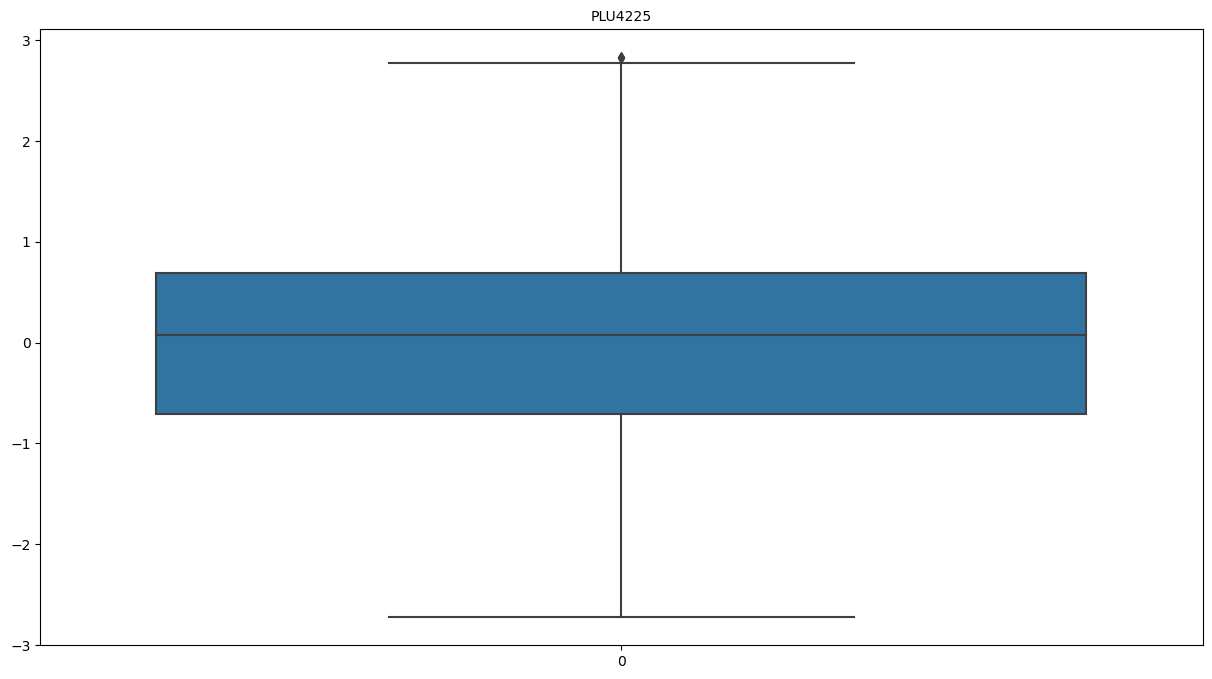

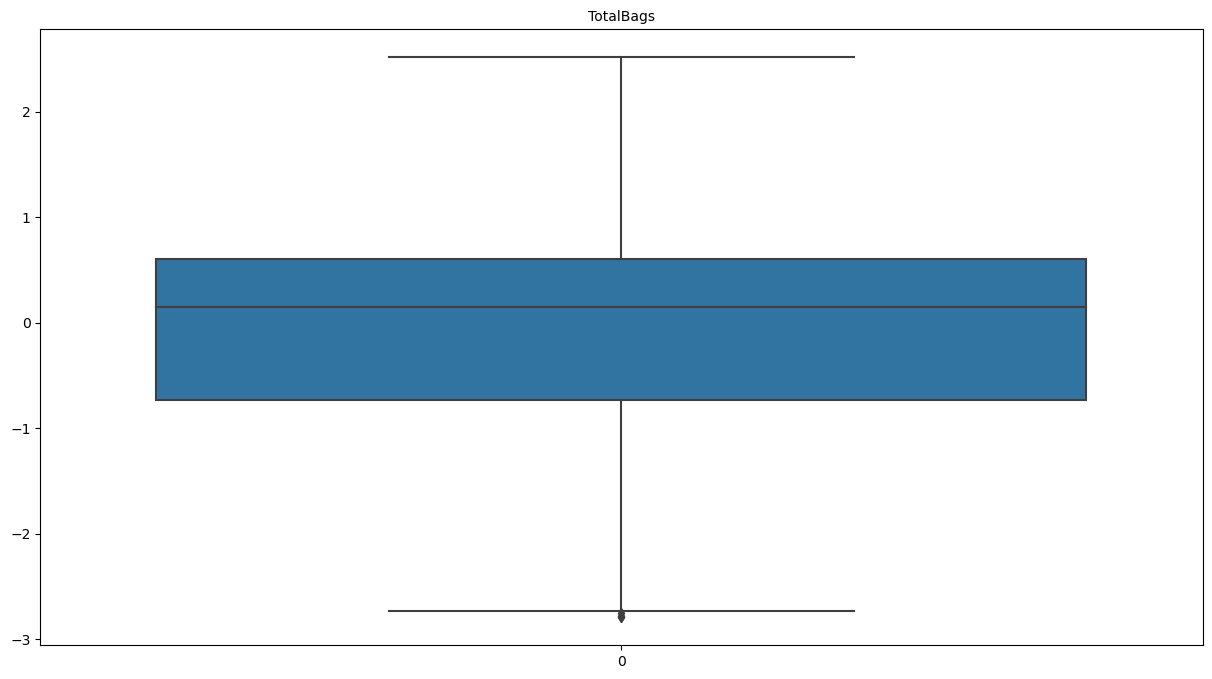

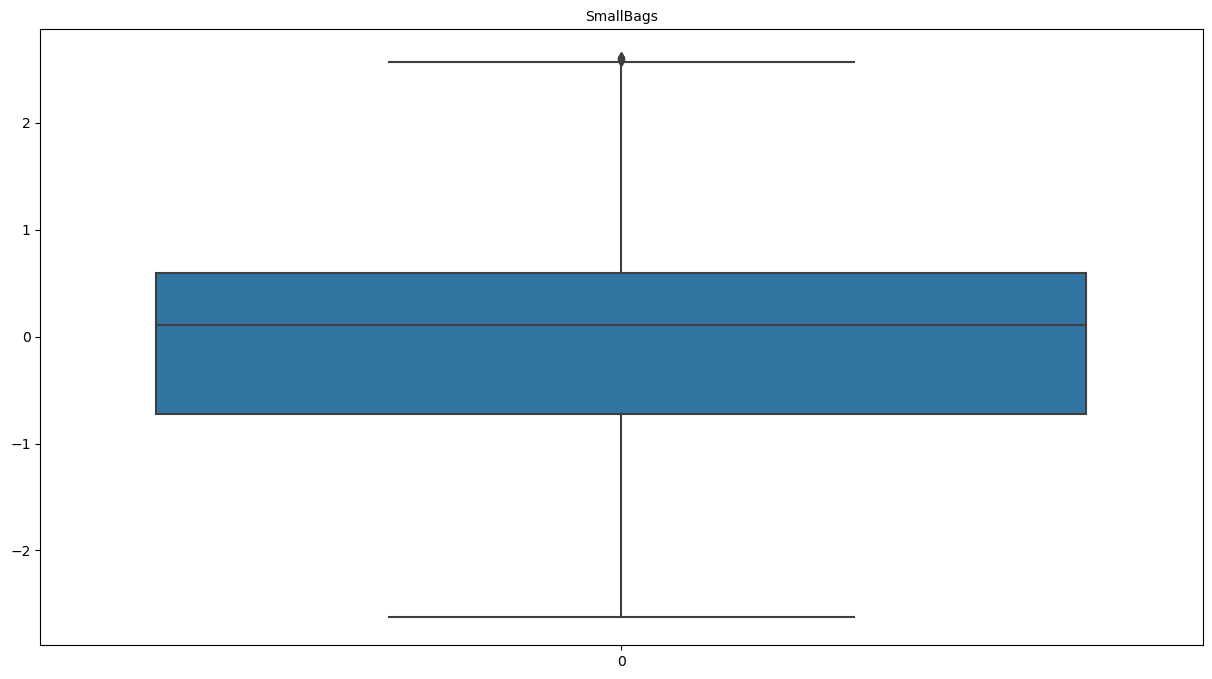

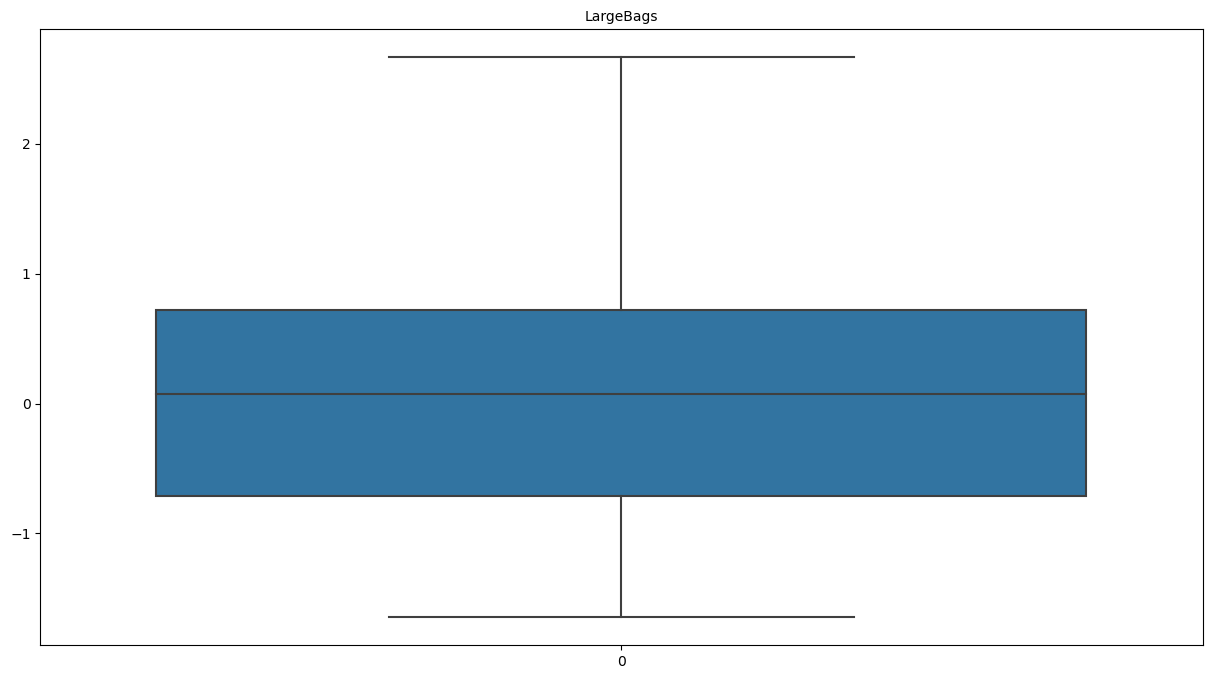

In [50]:
# for loop of boxplot to check outliers again
for i in x.columns:
    plt.figure(figsize = (15,8))
    sns.boxplot(x[i])
    plt.title(i, fontsize = 10)
    plt.show()

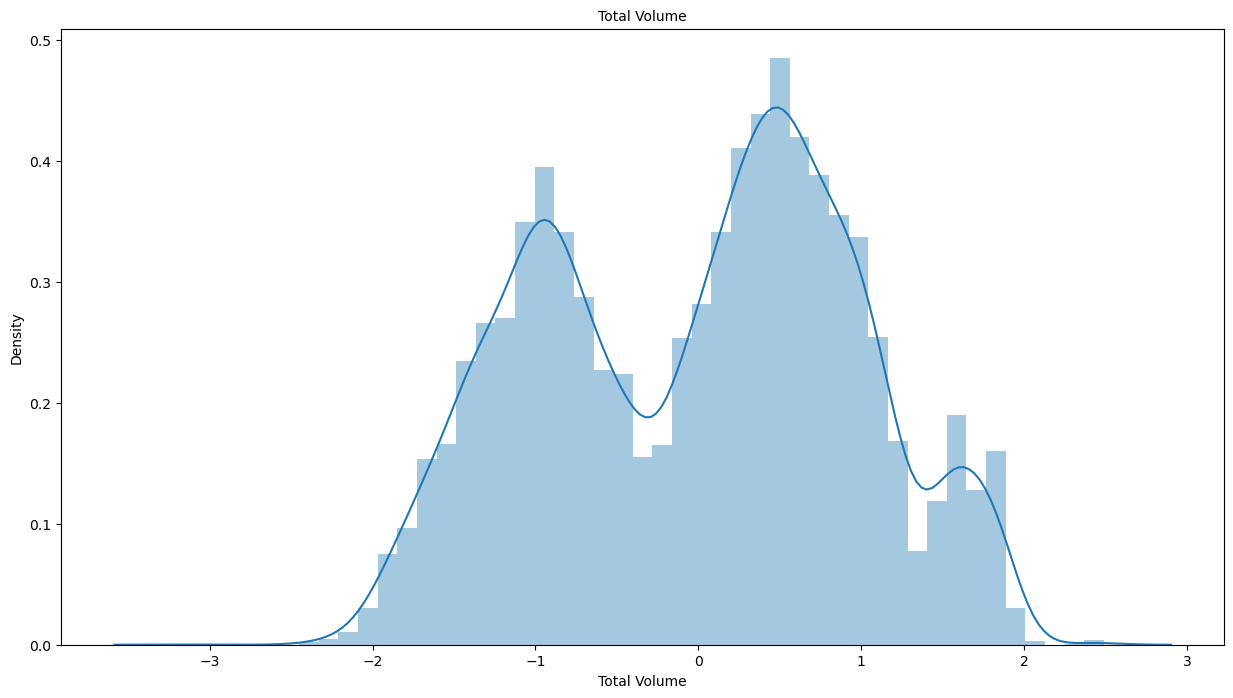

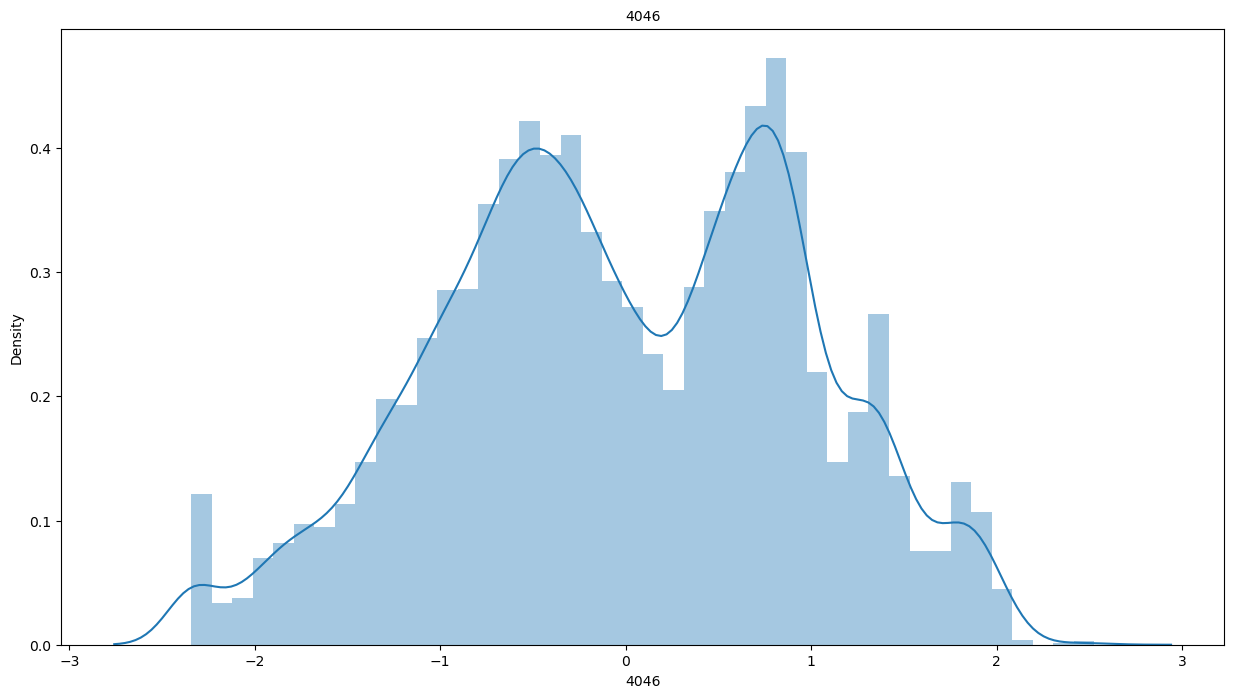

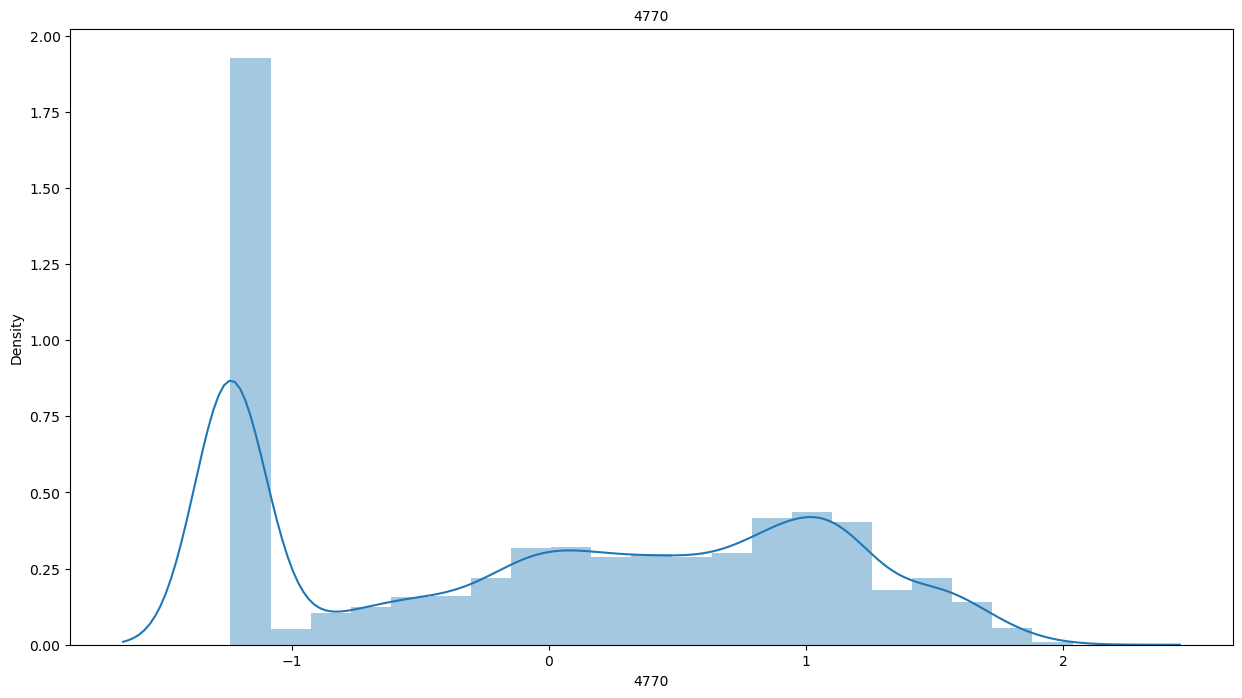

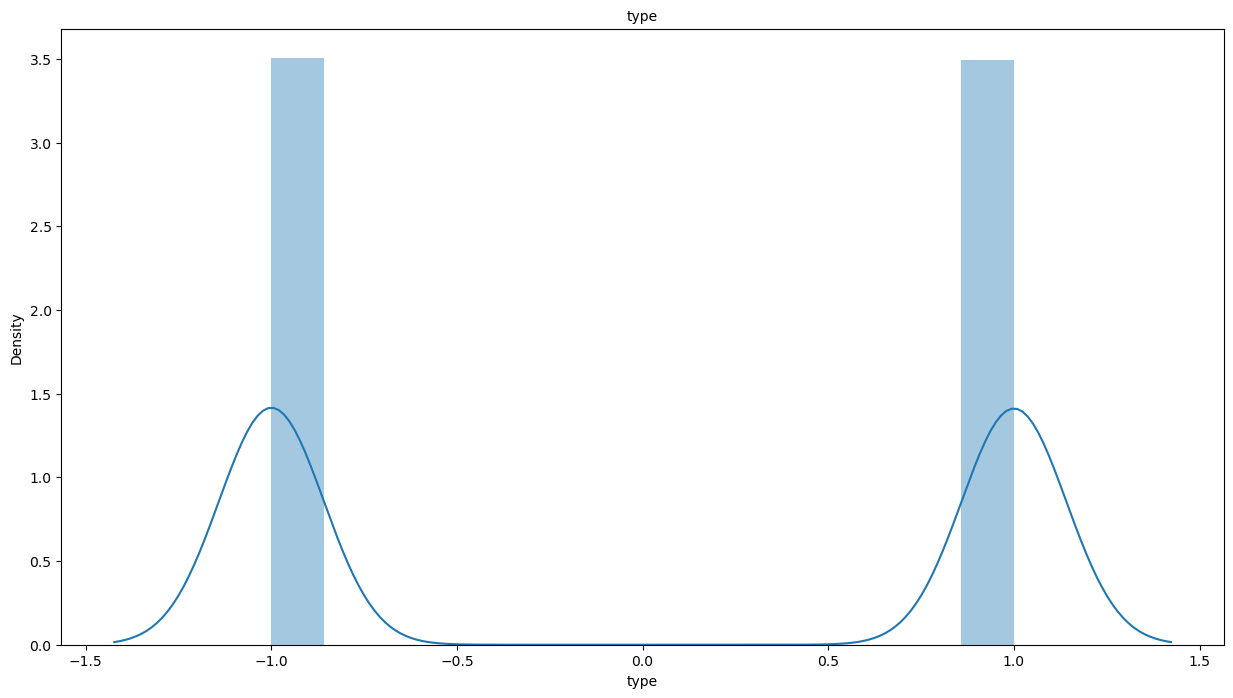

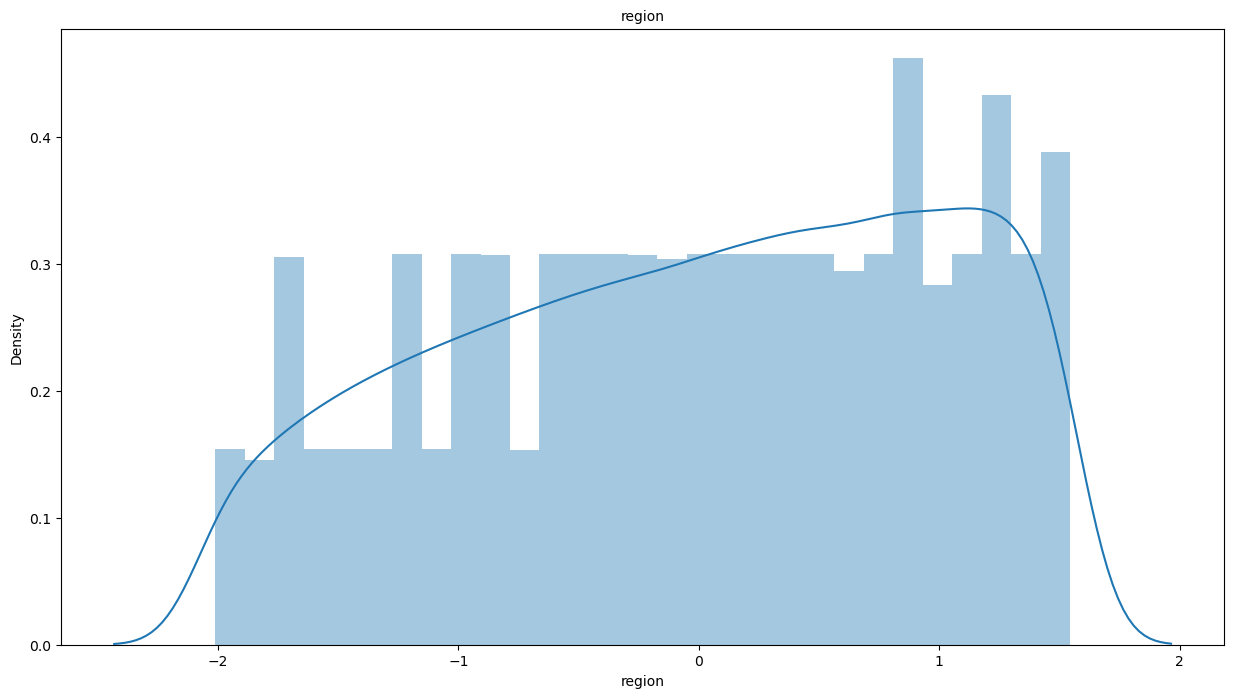

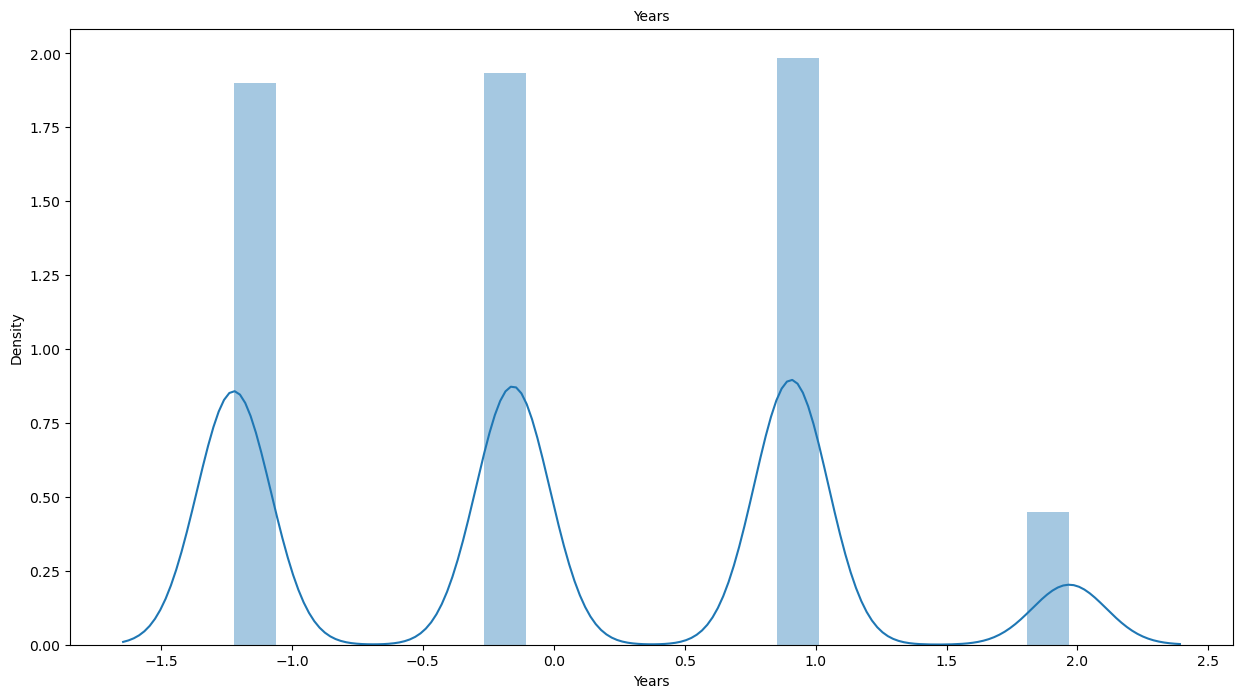

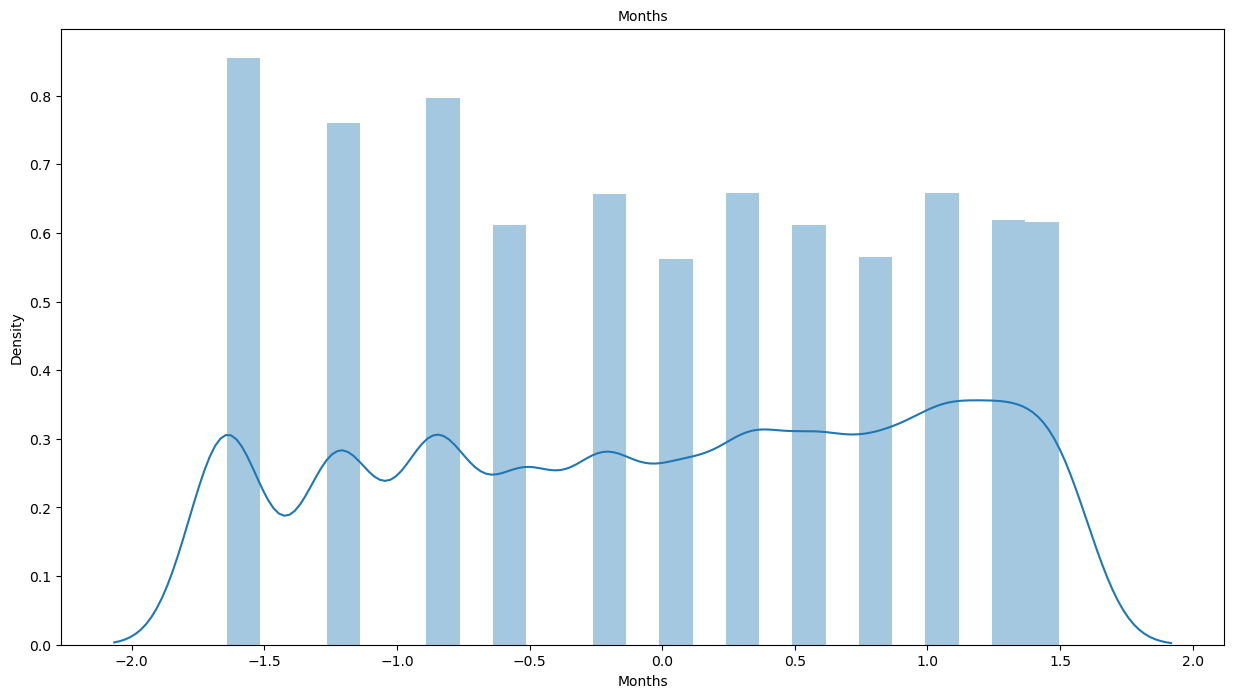

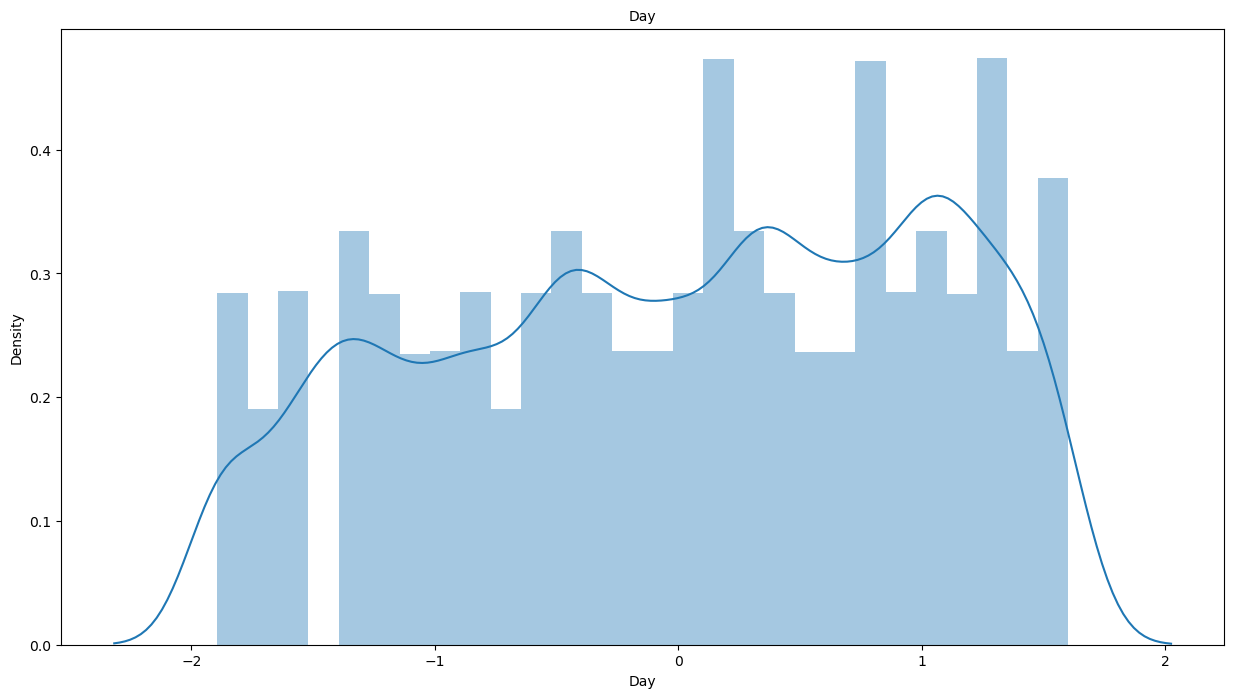

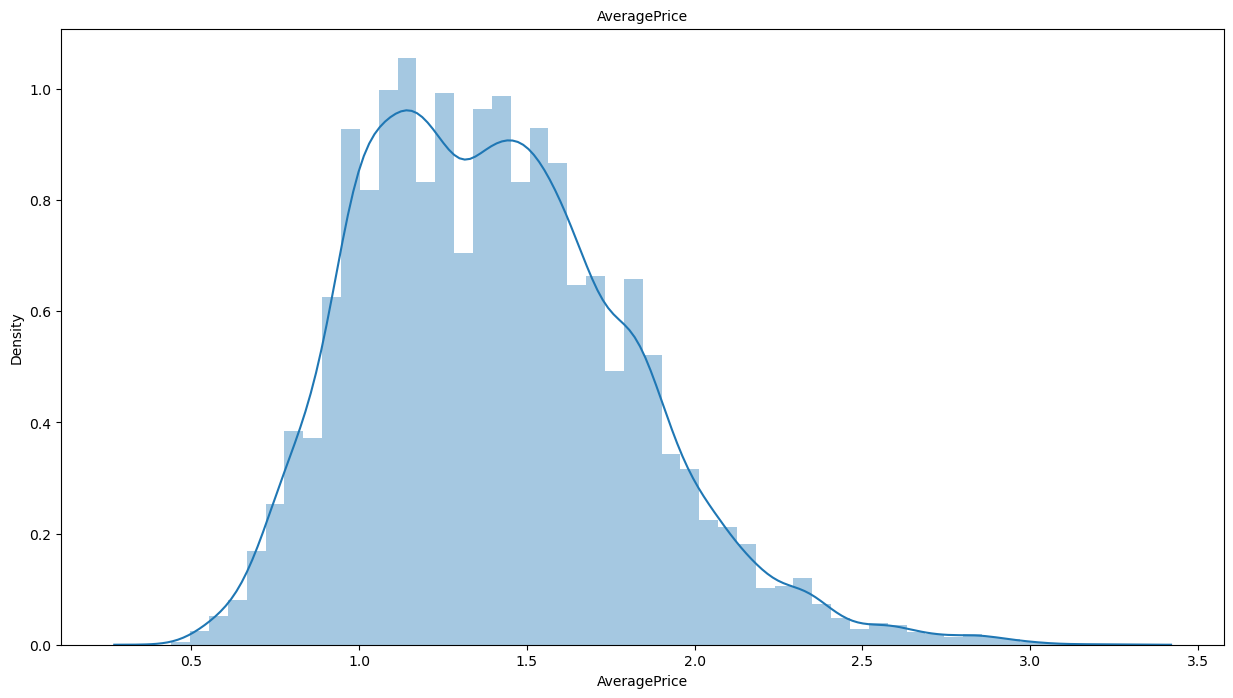

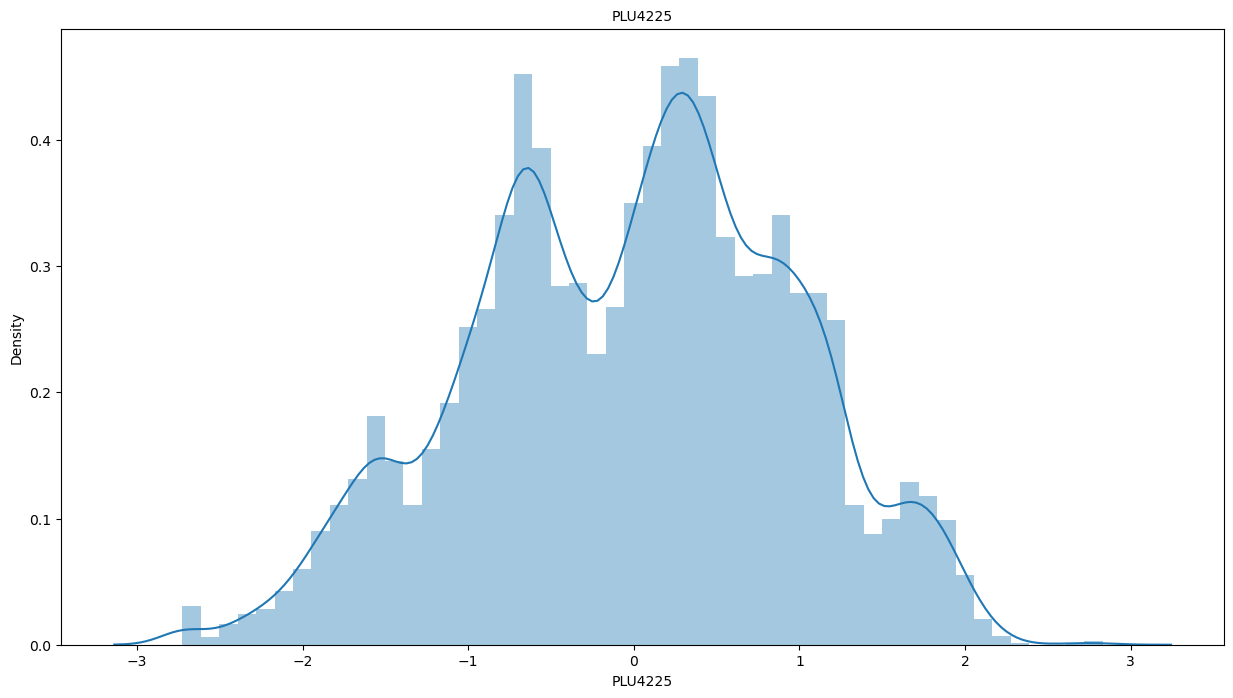

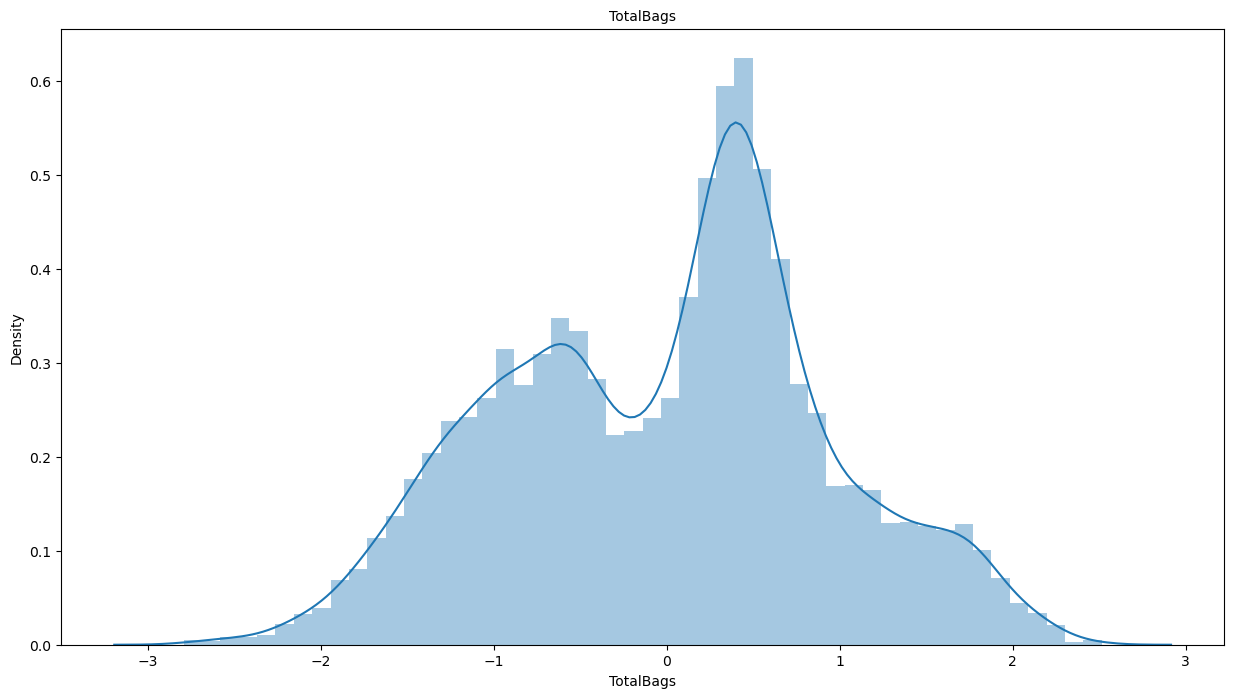

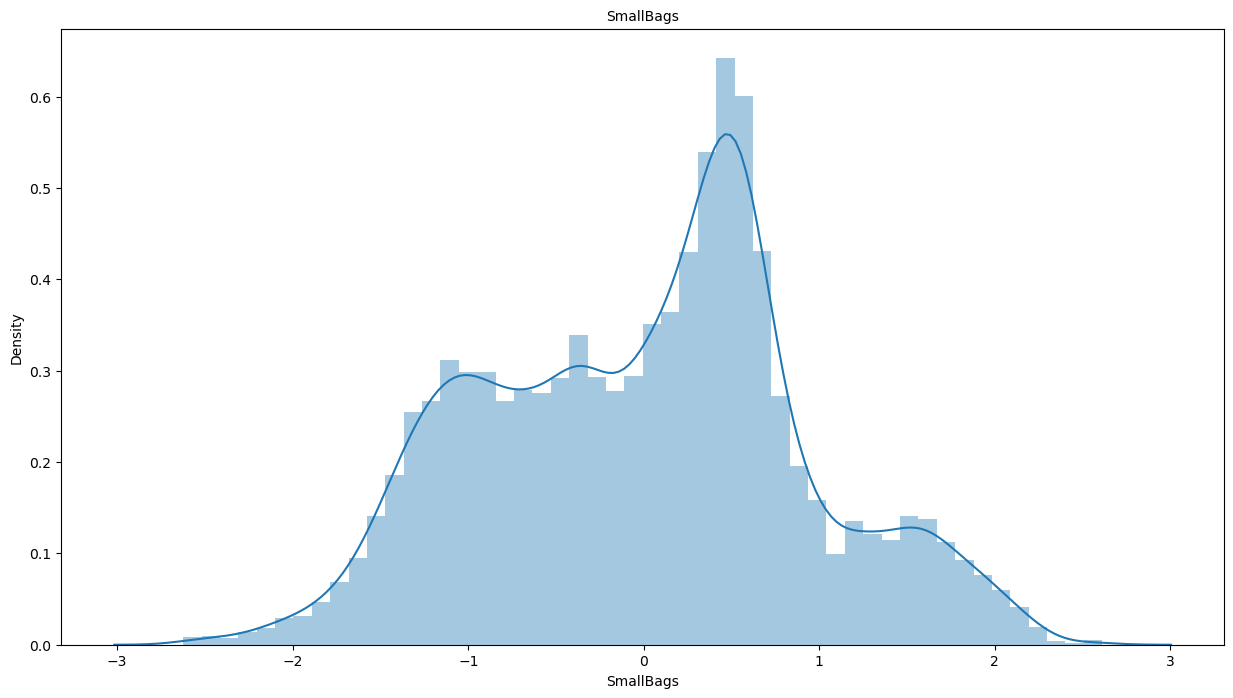

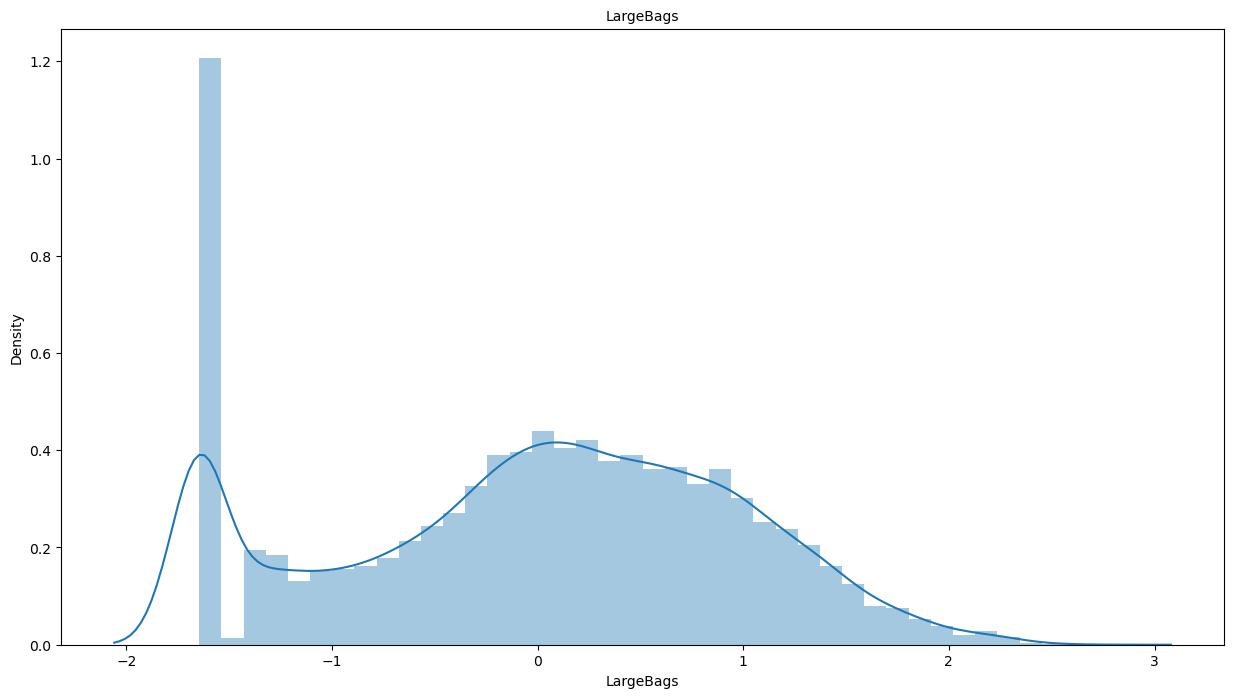

In [51]:
# for loop of distplot to check data distribution again
for i in x.columns:
    plt.figure(figsize = (15,8))
    sns.distplot(x[i])
    plt.title(i, fontsize = 10)
    plt.show()

In [52]:
# resplitting the features and target variables
y = x['AveragePrice']
x = x.drop(columns = ['AveragePrice'])

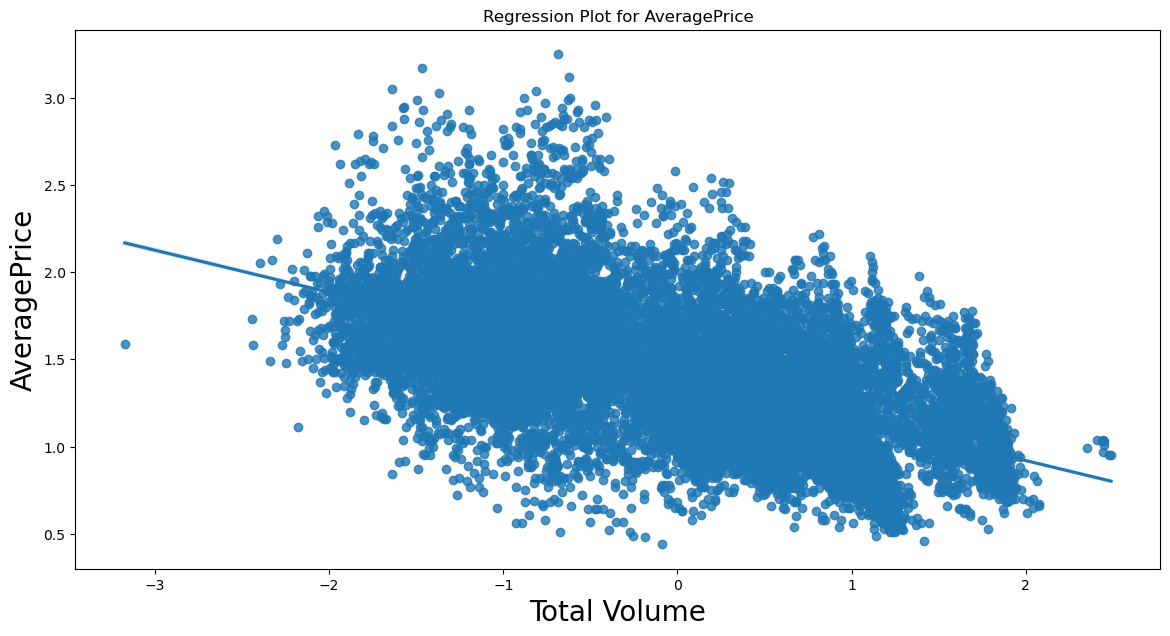

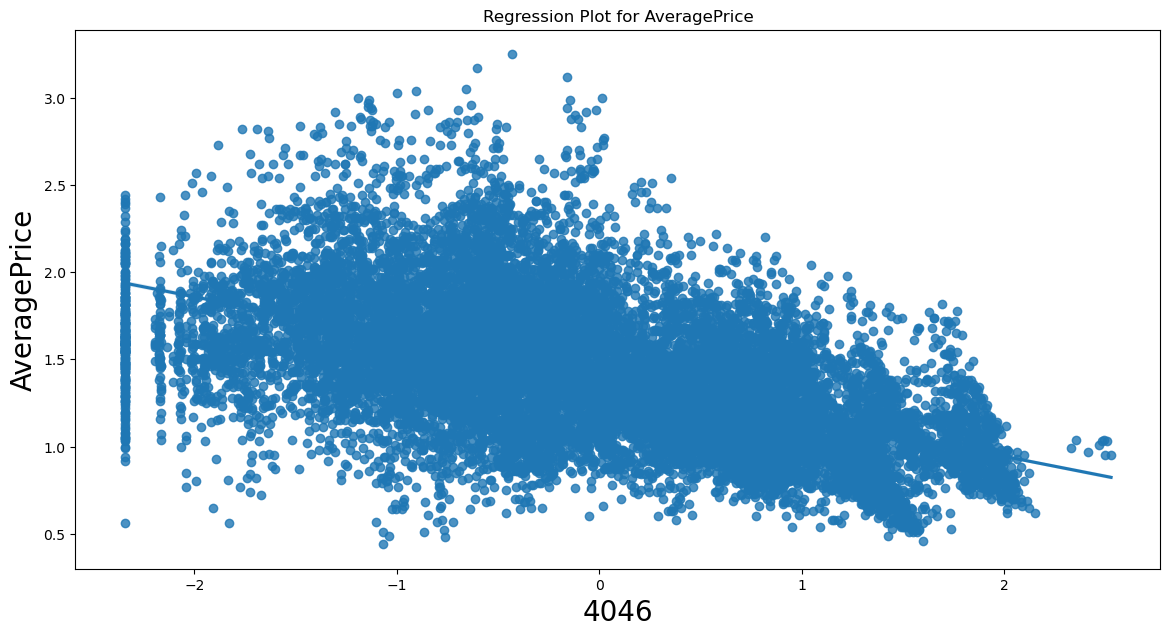

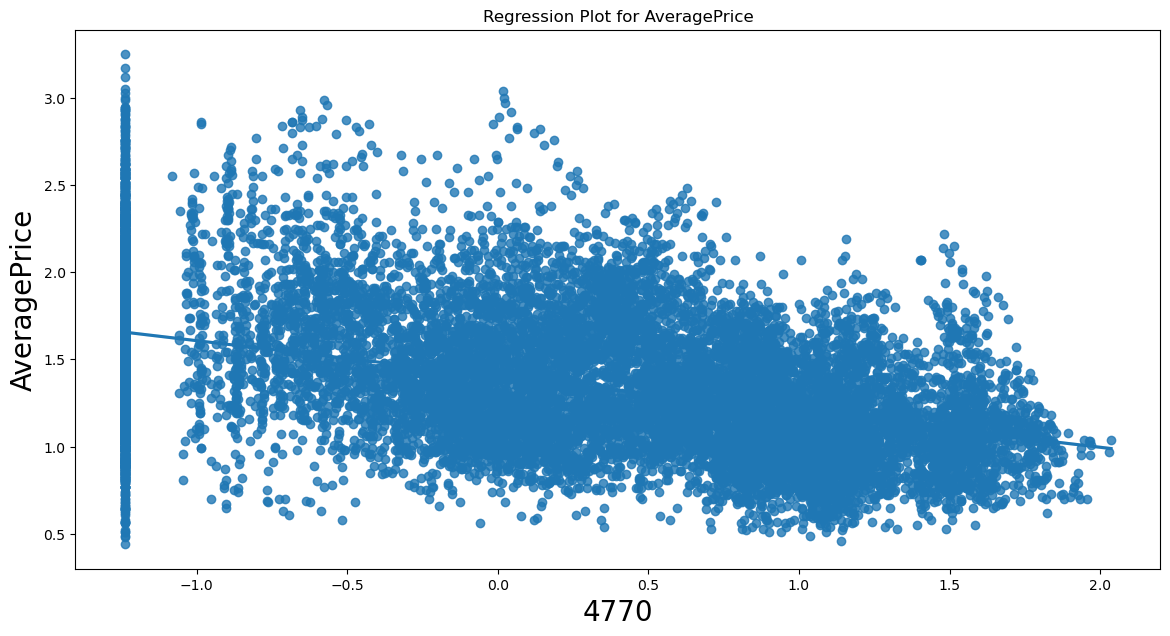

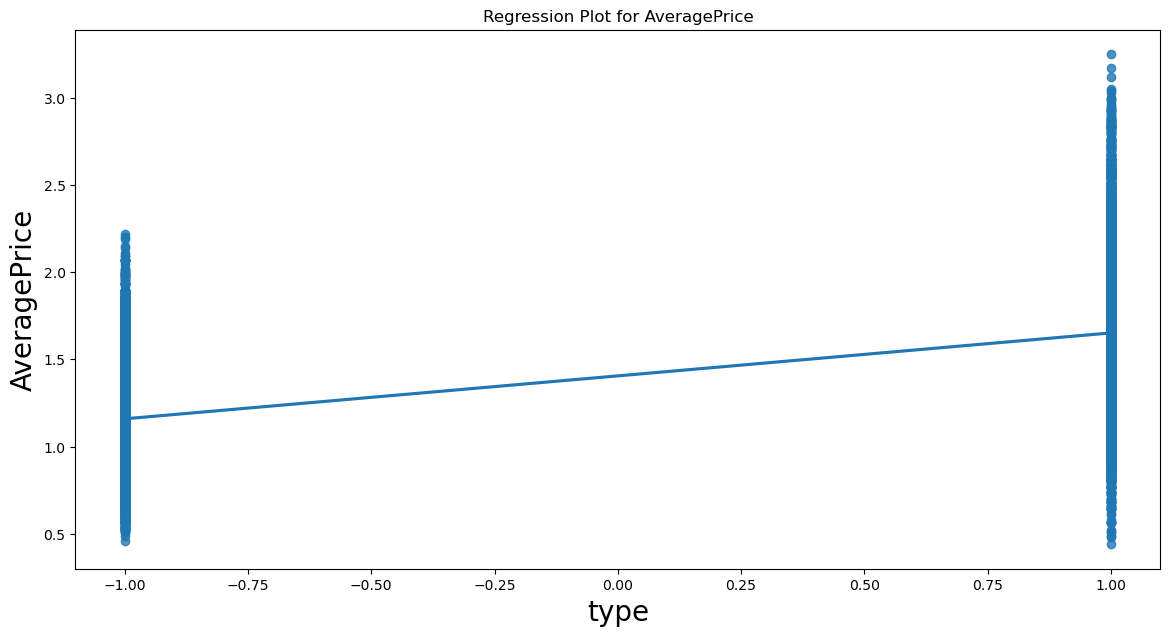

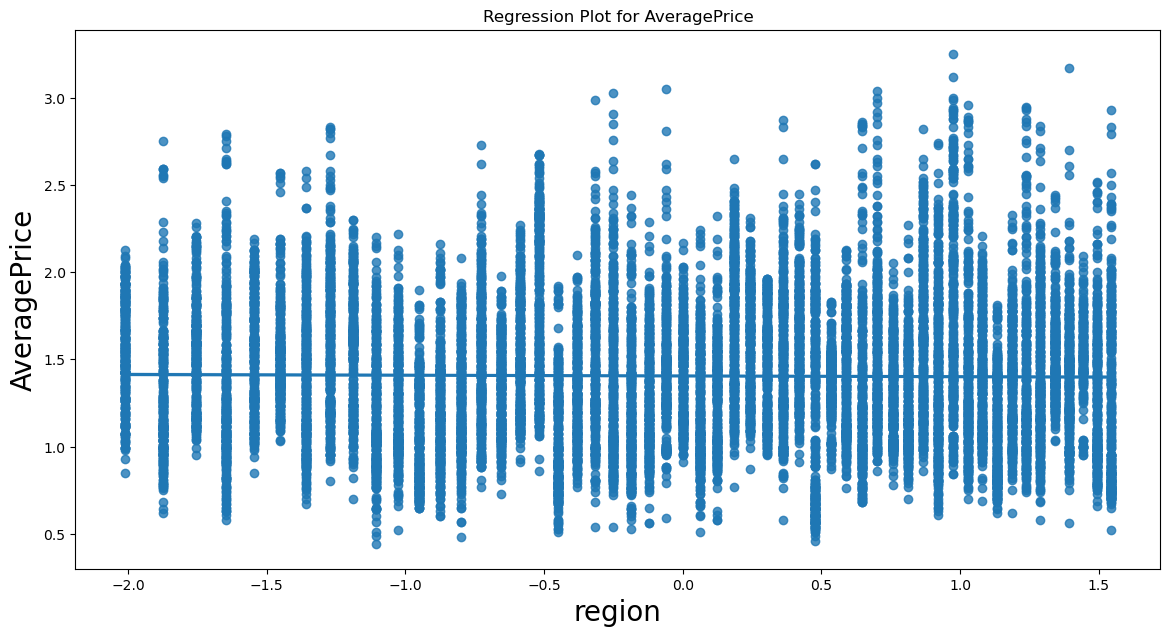

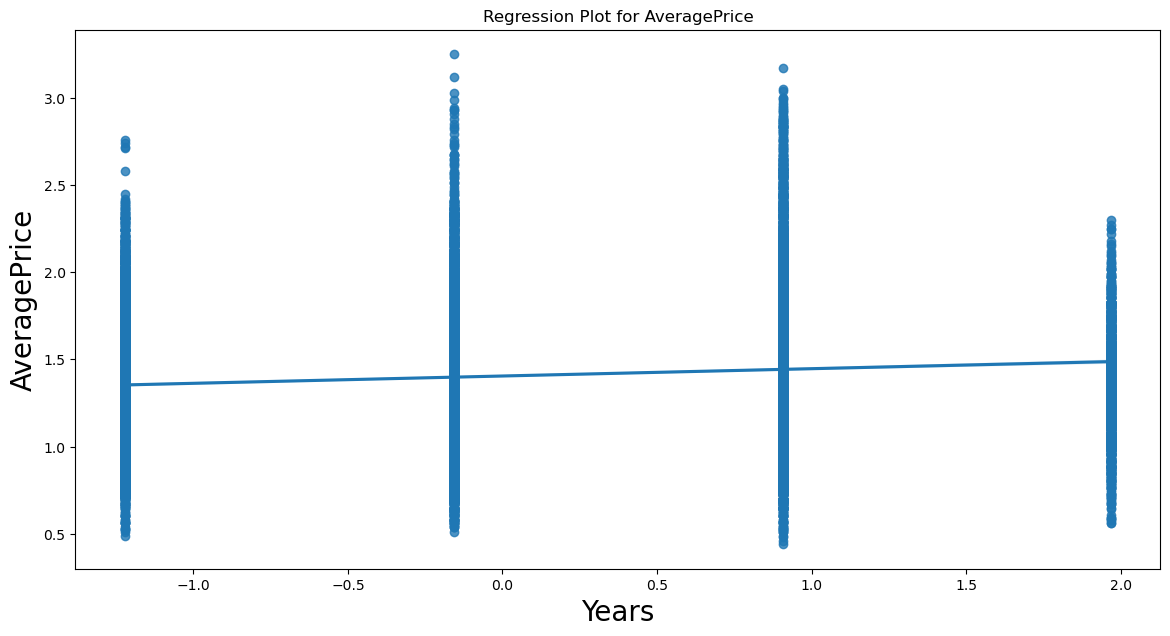

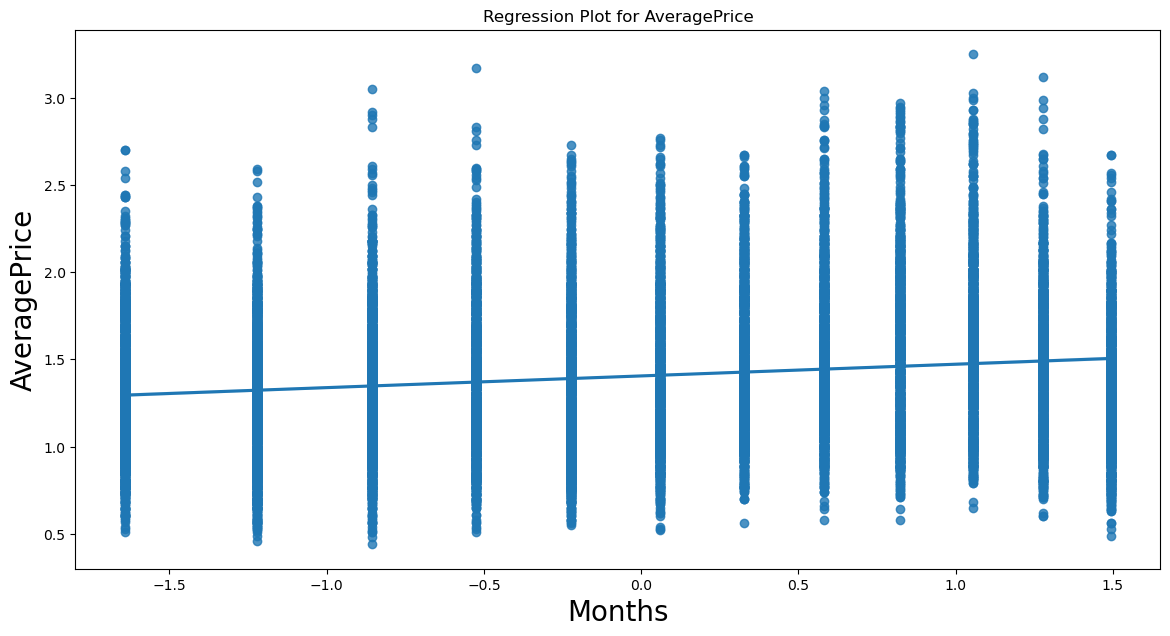

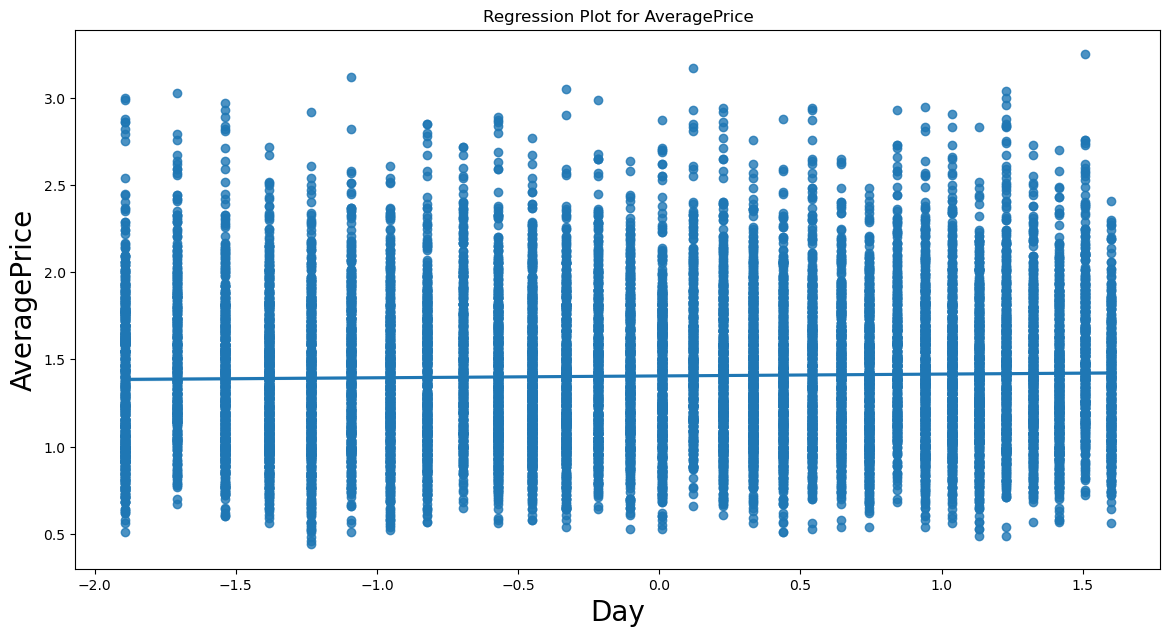

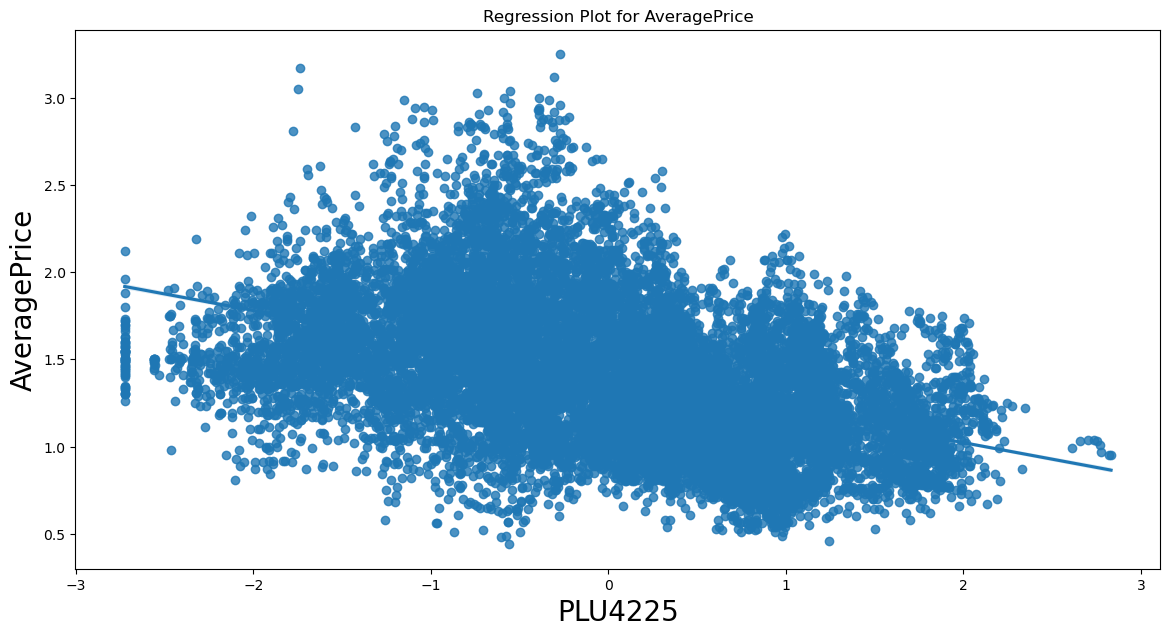

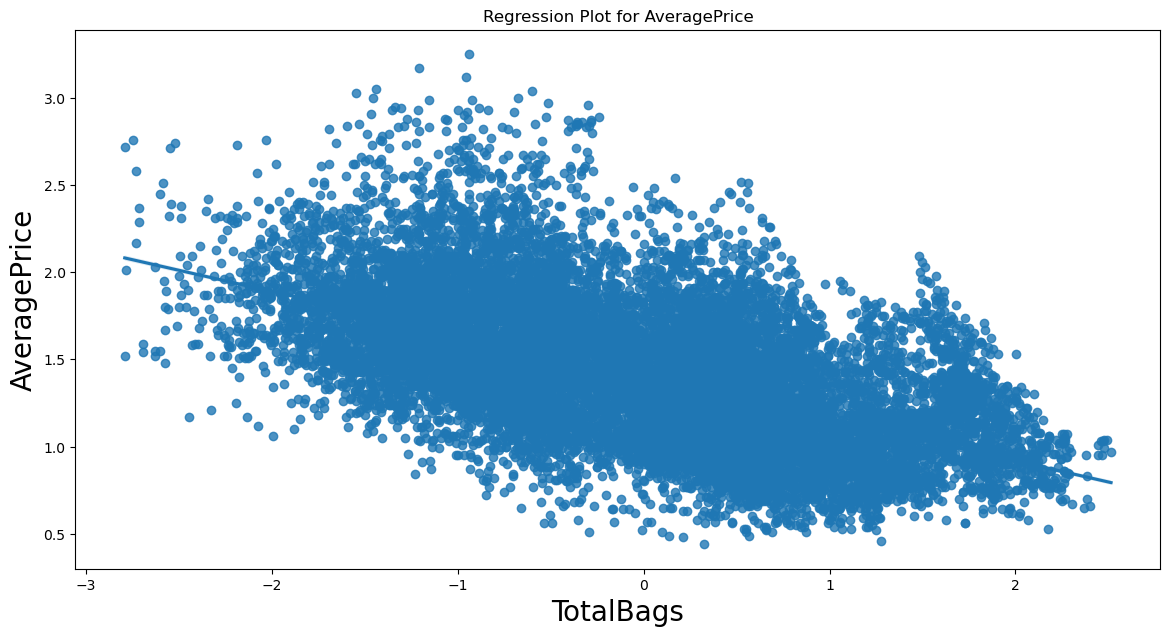

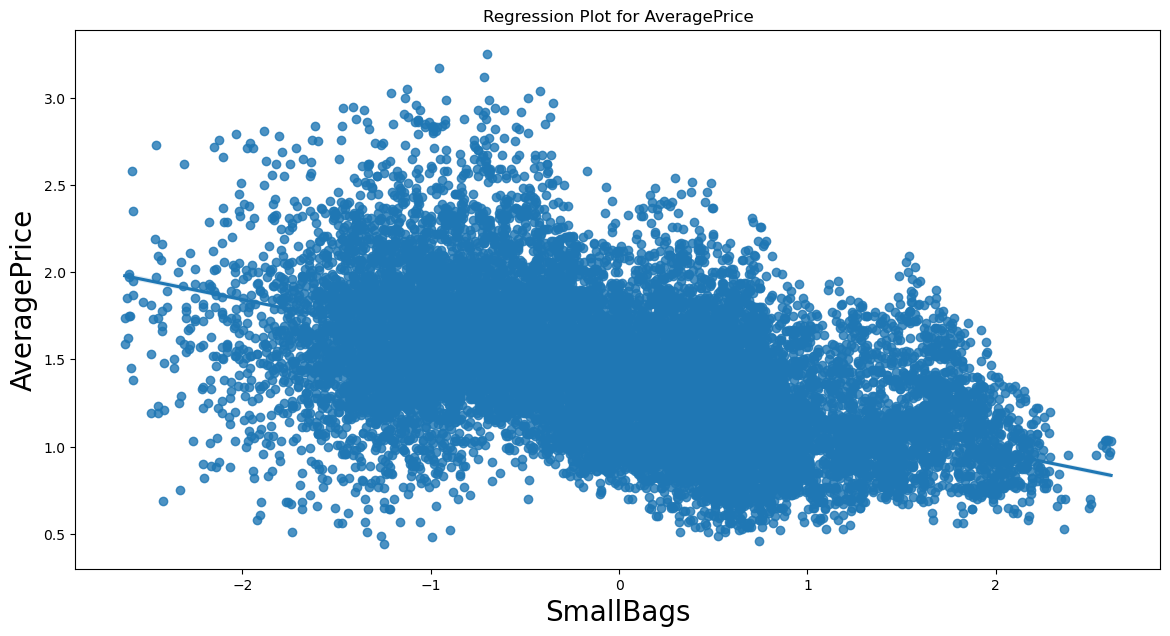

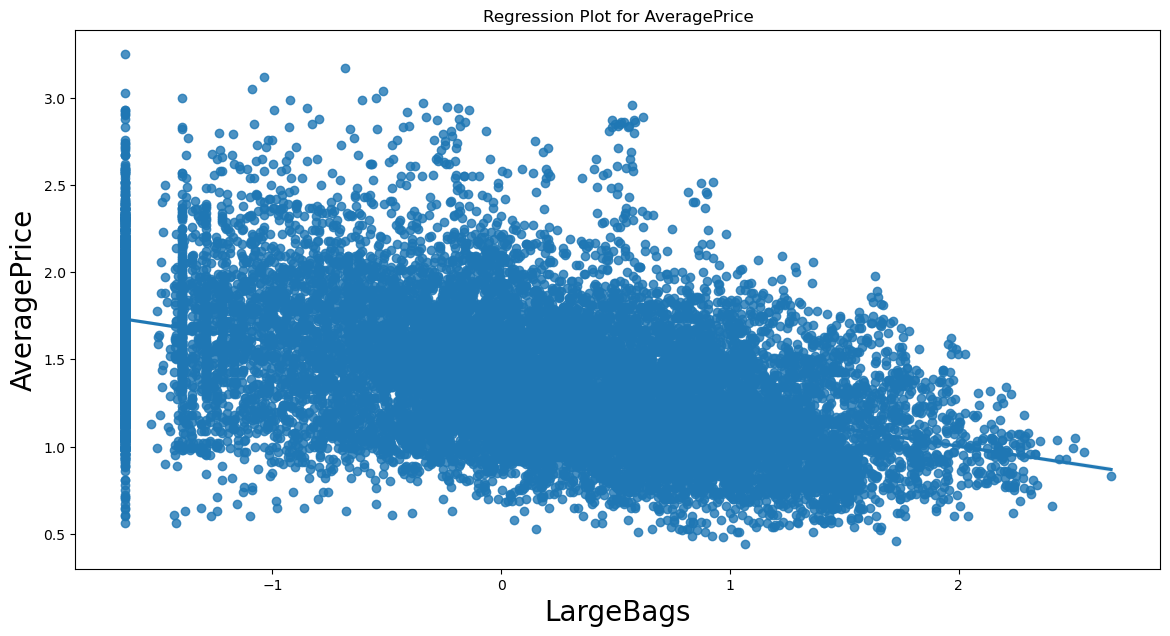

In [53]:
# for loop of regplot to check relation of features with target again
for i in x:
    plt.figure(figsize = (14,7))
    sns.regplot(x=x[i], y=y)
    plt.title('Regression Plot for AveragePrice')
    plt.xlabel(i, fontsize = 20)
    plt.ylabel('AveragePrice', fontsize = 20)
    plt.show()

now we have removed outliers and skewness from Data

Scaling

In [54]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Finding Best Random State.

In [55]:
max_accu = 0
best_rs = 0

for i in range(0,2000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    y_pred_LR = LR.predict(x_test)
    accuracy = r2_score(y_test, y_pred_LR)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Maximum accuracy is ', max_accu, 'at random state ', best_rs)

Maximum accuracy is  0.597614684146202 at random state  173


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 173)

Model

In [57]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [58]:
models = [lr, ridge, lasso, en, knn, svr, dtr, rf]

In [59]:
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    score=i.score(x_train,y_train)
    print(f'{i} had score of {round((score*100),2)}% and r2_score is {r2_score(y_test,pred)}')
    print('')    

LinearRegression() had score of 56.26% and r2_score is 0.597614684146202

Ridge() had score of 56.26% and r2_score is 0.5975977765505748

Lasso() had score of 0.0% and r2_score is -0.0005325725864915309

ElasticNet() had score of 0.0% and r2_score is -0.0005325725864915309

KNeighborsRegressor() had score of 87.42% and r2_score is 0.8007512281797977

SVR() had score of 79.99% and r2_score is 0.7892284817593013

DecisionTreeRegressor() had score of 100.0% and r2_score is 0.7636024794696071

RandomForestRegressor() had score of 98.45% and r2_score is 0.8922512767874307



All the 8 models have given the accuracy score very differently, out of which the RandomForestRegressor has given the highest accuracy that is 98.49% 

Now we have to choose the best model out of it but before that we will cross validate our models and than we will analyze the score after cross validation and based on cross validation we will decide our best model.

Cross Validation

In [60]:
# cross validation for Linear Regression
cvs1 = cross_val_score(lr,x_scaled,y,cv = 5)
print("Cross Validation Score for Linear Regression is ", cvs1.mean())

Cross Validation Score for Linear Regression is  0.2438453591234911


In [61]:
# cross validation for Ridge Regression
cvs2 = cross_val_score(ridge,x_scaled,y,cv = 5)
print("Cross Validation Score for Ridge Regression is ", cvs2.mean())

Cross Validation Score for Ridge Regression is  0.2438232609557339


In [62]:
# cross validation for Lasso Regression
cvs3 = cross_val_score(lasso,x_scaled,y,cv = 5)
print("Cross Validation Score for Lasso Regression is ", cvs3.mean())

Cross Validation Score for Lasso Regression is  -1.192570642323561


In [63]:
# cross validation for Elastic Net
cvs4 = cross_val_score(en,x_scaled,y,cv = 5)
print("Cross Validation Score for Elastic Net is ", cvs4.mean())

Cross Validation Score for Elastic Net is  -1.192570642323561


In [64]:
# cross validation for KNeighborsRegressor
cvs5 = cross_val_score(knn,x_scaled,y,cv = 5)
print("Cross Validation Score for KNeighborsRegressor is ", cvs5.mean())

Cross Validation Score for KNeighborsRegressor is  0.03285852721665779


In [65]:
# cross validation for SVR
cvs6 = cross_val_score(svr,x_scaled,y,cv = 5)
print("Cross Validation Score for SVR is ", cvs6.mean())

Cross Validation Score for SVR is  0.08533942963504723


In [66]:
# cross validation for DecisionTreeRegressor
cvs7 = cross_val_score(dtr,x_scaled,y,cv = 5)
print("Cross Validation Score for DecisionTreeRegressor is ", cvs7.mean())

Cross Validation Score for DecisionTreeRegressor is  -0.41413697859425574


In [67]:
# cross validation for RandomForestRegressor
cvs8 = cross_val_score(rf,x_scaled,y,cv = 5)
print("Cross Validation Score for RandomForestRegressor is ", cvs8.mean())

Cross Validation Score for RandomForestRegressor is  0.16242289317570185


According to the results I will pick Random Forest Model

In [89]:
file_name = 'Avocado Use case-AveragePrice Prediction.pickle'
pickle.dump(rf,open(file_name,'wb'))

In [90]:
loaded_model = pickle.load(open(file_name,'rb'))
Predictions = loaded_model.predict(x_test)

In [91]:
Actual = y_test

In [92]:
result = pd.DataFrame([Predictions, Actual], index = ['Predictions', 'Actual'])
result

0       1       2       3       4       5       6       7     \
Predictions  1.1703  1.3428  1.1787  1.1659  1.2894  1.6809  1.2416  0.8971   
Actual       1.0800  1.3700  1.1700  1.1600  1.2700  1.7400  1.0200  0.9200   

               8       9     ...    4466    4467    4468    4469    4470  \
Predictions  1.2532  2.1365  ...  1.2916  1.2381  1.5361  1.1192  1.4839   
Actual       1.2200  2.2000  ...  1.0100  1.2600  1.4600  1.0200  1.5000   

               4471    4472    4473    4474    4475  
Predictions  1.7414  1.3665  1.3115  2.0656  1.5414  
Actual       2.3400  1.9200  1.4800  2.5400  1.7600  

[2 rows x 4476 columns]